# Partie 2

# Collecte de donnees (6pts) :



In [1072]:
from bs4 import BeautifulSoup
import requests
from csv import writer
import pandas as pd
import numpy as np
from fake_useragent import UserAgent
import random
import time
from time import sleep
import re
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import zscore
from urllib.parse import urljoin

import warnings
warnings.filterwarnings('ignore')
# !pip install fake-useragent

In [2]:
# user = UserAgent().random
# session = requests.Session()
# header = {
#     'user-agent':user
# }
# url= "https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&ref_=adv_prv"
# page = session.get(url, headers = header)
# sleep_time = 28 + random.uniform(2, 4)
# time.sleep(sleep_time)

# soup = BeautifulSoup(page.content, 'html.parser')
# lists = soup.find_all('div', class_="lister-item mode-advanced")
  

In [3]:
header = ['id_film',"titre_film","duree","genres_liste","date_sortie","utilisateur_note","nbre_utilisateur_note"]
df = pd.DataFrame(columns=header) 

In [4]:
def extraire_id_film(lien): #fonction pour extraie l'id des films
  x = re.findall('[0-9]+', lien)
  return x
user = UserAgent().random
session = requests.Session()
header = {
    'user-agent':user
  } 

In [50]:
column = ['lien'] 
df_links = pd.DataFrame(columns=column) 
def scrap_links(): #fonction pour extraire les lien des page 
 url= f'https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=1&ref_=adv_prv' #premiere page
 base = 'https://www.imdb.com' 
 df_links.loc[len(df_links.index)] = url
 while True : 
  page1 = requests.get(url, headers=header)
  soup1 = BeautifulSoup(page1.content, 'html.parser')
  next_page = soup1.find_all('div', class_="desc")
  lists = soup1.find('div', class_="desc")
  if lists.find('a',class_="lister-page-next next-page").attrs['href']:
   links = lists.find('a',class_="lister-page-next next-page").attrs['href']
   if links:
        url = urljoin(base, links)
        df_links.loc[len(df_links.index)] = url
        print(url)
   else:
        break


In [51]:
scrap_links()

https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=351&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=401&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=451&ref_=a

https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=3701&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=3751&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=3801&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=3851&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=3901&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=3951&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=4001&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=4051&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=4

https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=7351&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=7401&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=7451&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=7501&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=7551&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=7601&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=7651&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=7701&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=7

https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&after=WzEyMTM5NTAsInR0OTM0NDIwNCIsMTA3NTFd&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&after=WzEyMzY2NTcsInR0OTgxNzEyMiIsMTA4MDFd&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&after=WzEyNTc4OTcsInR0NzgxMzg5NCIsMTA4NTFd&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&after=WzEyNzk4MjEsInR0Mzk3Mjc5MCIsMTA5MDFd&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&after=WzEyOTc0MjQsInR0MTA3OTQ5ODYiLDEwOTUxXQ%3D%3D&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&after=WzEzMjE0NDIsInR0MjAyNDk5MjIiLDExMDAxXQ%3D%3D&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&after=WzEzNDcxMzQsInR0NTA

AttributeError: 'NoneType' object has no attribute 'attrs'

In [56]:
df_links.values

array([['https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=1&ref_=adv_prv'],
       ['https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=51&ref_=adv_nxt'],
       ['https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=101&ref_=adv_nxt'],
       ['https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=151&ref_=adv_nxt'],
       ['https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=201&ref_=adv_nxt'],
       ['https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=251&ref_=adv_nxt'],
       ['https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=301&ref_=adv_nxt'],
       ['https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=351&ref_=adv_nxt'],
       ['ht

In [60]:
url_films = df_links['lien'].tolist() #tolist
url_films

['https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=1&ref_=adv_prv',
 'https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=51&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=101&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=151&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=201&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=251&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=301&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=351&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=feature&release_date=2018-0

In [65]:
def scrap(url):
#  user = UserAgent().random
#  session = requests.Session()
#  header = {
#     'user-agent':user
#   }   
#  url= f"https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=1&ref_=adv_prv"
 print(url)
 page = session.get(url, headers = header)
 sleep_time = 28 + random.uniform(2, 4)
 time.sleep(sleep_time)
 soup = BeautifulSoup(page.content, 'html.parser')
 lists = soup.find_all('div', class_="lister-item mode-advanced")    
 for list in lists: #les tags qui contiennent les informations
     getter = list.find('div', class_="lister-item-content")
     getter1 = getter.find('h3', class_="lister-item-header")
     
     title_film = getter1.find('a').text
     a_href=getter1.find("a").get("href")
     a_href = extraire_id_film(a_href)
     
     
     date_sortie = ''   
     if getter1.find('span', class_="lister-item-year text-muted unbold"):
        date_sortie = getter1.find('span', class_="lister-item-year text-muted unbold").text
        date_sortie = date_sortie.replace("(I)", "")   
     duree = ''
     genres_liste = ''
     if list.find('p',class_='text-muted'):
        getter2 = list.find('p',class_='text-muted')
        if getter2.find("span",class_="runtime"):
         duree = getter2.find("span",class_="runtime").text
     
     if getter2.find("span",class_="genre"):
        genres_liste = getter2.find("span",class_="genre").text.replace('\n', '')
     utilisateur_note = ''
     if list.find('div',class_='ratings-bar'):
      getter3 = list.find('div',class_='ratings-bar')
      if getter3.find("strong"):
        utilisateur_note = getter3.find("strong").text
        
     nbre_utilisateur_note = ''   
     if list.find('p',class_='sort-num_votes-visible'):
        getter4 = list.find('p',class_='sort-num_votes-visible')
        if getter4.find_all("span",text="Votes:"):
         nbre_utilisateur_note = getter4.find_all("span")[1].text
        
     print(a_href)
     print(title_film)
     print(duree)
     print(date_sortie)

     print(genres_liste)
     print(utilisateur_note)
     print(nbre_utilisateur_note)



     info = [a_href,title_film,duree,genres_liste,date_sortie,utilisateur_note,nbre_utilisateur_note]
     df.loc[len(df.index)] = info



    

In [66]:

for i in url_films:
    scrap(i)


https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=1&ref_=adv_prv
['1825683']
Black Panther
134 min
(2018)
Action, Adventure, Sci-Fi            
7.3
762,887
['1477834']
Aquaman
143 min
(2018)
Action, Adventure, Fantasy            
6.8
473,132
['4154756']
Avengers: Infinity War
149 min
(2018)
Action, Adventure, Sci-Fi            
8.4
1,071,259
['5463162']
Deadpool 2
119 min
(2018)
Action, Adventure, Comedy            
7.7
580,007
['7784604']
Hereditary
127 min
(2018)
Drama, Horror, Mystery            
7.3
315,231
['2709692']
The Grinch
85 min
(2018)
Animation, Comedy, Family            
6.3
70,958
['1034415']
Suspiria
152 min
 (2018)
Drama, Fantasy, Horror            
6.7
79,216
['4560436']
Mile 22
94 min
(2018)
Action, Thriller            
6.1
80,336
['4633694']
Spider-Man: Into the Spider-Verse
117 min
(2018)
Animation, Action, Adventure            
8.4
523,577
['6966692']
Green Book
130 min
(2018)
Biography, Comedy, Drama            
8.2
48

['3846674']
To All the Boys I've Loved Before
99 min
(2018)
Comedy, Drama, Romance            
7.0
108,558
['1318517']
The Man Who Killed Don Quixote
132 min
(2018)
Adventure, Comedy, Drama            
6.3
20,187
['8574252']
Manyeo
125 min
(2018)
Action, Mystery, Sci-Fi            
7.1
12,674
['1289403']
The Guernsey Literary and Potato Peel Pie Society
124 min
(2018)
Drama, Romance, War            
7.3
47,233
['5220122']
Hotel Transylvania 3: Summer Vacation
97 min
(2018)
Animation, Adventure, Comedy            
6.3
74,994
['1137450']
Death Wish
107 min
(2018)
Action, Crime, Drama            
6.3
72,756
['3892172']
Leave No Trace
109 min
(2018)
Adventure, Drama            
7.1
60,286
['5989218']
Life Itself
117 min
(2018)
Drama, Romance            
6.8
22,276
['6237612']
Accident Man
105 min
(2018)
Action, Crime, Thriller            
6.2
10,746
['6306064']
Adrift
96 min
 (2018)
Action, Adventure, Biography            
6.6
57,381
['5580266']
The Hate U Give
133 min
(2018)
Crime, Drama 

['6857166']
Book Club
104 min
 (2018)
Comedy, Drama, Romance            
6.1
28,583
['7137380']
Destroyer
121 min
(2018)
Action, Crime, Drama            
6.2
29,987
['3317234']
Game Over, Man!
101 min
(2018)
Action, Comedy            
5.4
30,835
['8119752']
Gon-ji-am
95 min
(2018)
Horror            
6.4
10,215
['2296777']
Sherlock Gnomes
86 min
(2018)
Animation, Adventure, Comedy            
5.2
12,756
['6952960']
The Kindergarten Teacher
96 min
(2018)
Drama, Thriller            
6.7
16,432
['9495224']
Black Mirror: Bandersnatch
90 min
(2018)
Drama, Fantasy, Mystery            
7.1
127,261
['6905696']
Slaughterhouse Rulez
104 min
(2018)
Action, Comedy, Fantasy            
5.3
15,172
['6043142']
Skin
118 min
(V) (2018)
Biography, Crime, Drama            
6.9
19,077
['3203528']
Bad Samaritan
110 min
(2018)
Crime, Horror, Thriller            
6.4
23,843
['6829180']
Welcome Home
97 min
 (2018)
Thriller            
5.2
7,942
['6269368']
The Clovehitch Killer
109 min
(2018)
Crime, Drama, Mys

['3458510']
Dude
97 min
(2018)
Comedy, Drama            
5.1
7,195
['6902696']
Gloria Bell
102 min
(2018)
Comedy, Drama, Music            
6.3
11,940
['5592796']
Driven
113 min
 (2018)
Biography, Drama, Thriller            
6.4
7,131
['4951982']
Kursk
117 min
(2018)
Action, Adventure, Drama            
6.6
19,327
['6143850']
Distorted
86 min
 (2018)
Crime, Mystery, Thriller            
4.6
9,035
['6769280']
Time Freak
104 min
(2018)
Comedy, Drama, Romance            
5.8
9,089
['3451984']
Another Time
89 min
(2018)
Adventure, Comedy, Romance            
4.5
966
['5688868']
Primal Rage
106 min
(2018)
Action, Adventure, Horror            
4.9
3,730
['6821012']
The Week Of
116 min
(2018)
Comedy            
5.2
22,377
['8439854']
Lust Stories
120 min
(2018)
Drama, Romance            
6.4
11,093
['7424200']
Teen Titans Go! To the Movies
84 min
(2018)
Animation, Action, Adventure            
6.7
19,799
['6768578']
Dogman
103 min
(2018)
Crime, Drama, Thriller            
7.2
27,234
['5092380'

['7515456']
Hurricane
107 min
(II) (2018)
Action, Drama, War            
5.9
5,041
['2404639']
The Happy Prince
105 min
(2018)
Biography, Drama            
6.2
5,356
['5688996']
Alex Strangelove
99 min
(2018)
Comedy, Drama, Romance            
6.3
18,157
['5670152']
Traffik
96 min
(2018)
Thriller            
5.9
20,395
['6386748']
Pájaros de verano
125 min
(2018)
Crime, Drama            
7.5
12,300
['6749318']
Speed Kills
102 min
(2018)
Action, Crime, Drama            
4.3
3,574
['9177882']
Constantine: City of Demons
90 min
(2018)
Animation, Action, Fantasy            
7.3
7,670
['6483364']
Teen Spirit
93 min
(2018)
Drama, Music            
6.1
9,109
['7531138']
Only You
119 min
(2018)
Drama, Romance            
6.7
3,003
['6688022']
After Everything
95 min
(2018)
Comedy, Drama, Romance            
6.4
1,684
['8155182']
Leprechaun Returns
92 min
(2018)
Comedy, Fantasy, Horror            
5.0
4,653
['7033192']
Pond Life
100 min
(II) (2018)
Drama            
6.0
376
['6251024']
Office U

['6495094']
Little Women
112 min
(2018)
Drama, Family            
5.3
1,321
['6119856']
Irreplaceable You
96 min
(2018)
Comedy, Drama, Romance            
6.4
9,808
['2690226']
The Chaperone
108 min
(2018)
Drama            
6.6
1,665
['7468616']
The Boat
88 min
(2018)
Horror, Mystery, Thriller            
5.7
4,112
['2069797']
Delirium
96 min
 (2018)
Horror, Thriller            
5.7
7,746
['6547170']
Reprisal
89 min
 (2018)
Action, Drama, Thriller            
4.3
7,677
['6512428']
Indivisible
119 min
(II) (2018)
Drama, War            
5.8
1,265
['7938092']
Neo-eui kyeol-hoon-sik
110 min
(2018)
Comedy, Romance            
7.0
3,013
['7220754']
Hevi reissu
92 min
(2018)
Comedy, Music            
7.0
9,414
['1662546']
Daddy's Girl
81 min
(II) (2018)
Crime, Horror, Thriller            
4.7
619
['8723216']
Eerie
101 min
(2018)
Horror, Mystery, Thriller            
4.7
2,453
['5322168']
Snapshots
95 min
(2018)
Drama            
7.0
2,138
['7689052']
Daphne & Velma
72 min
(2018)
Action, Comed

['7624934']
Zoo
95 min
 (2018)
Comedy, Drama, Horror            
5.5
1,914
['6933454']
Puzzle
103 min
(II) (2018)
Drama            
6.7
8,032
['7293920']
The Fare
82 min
 (2018)
Mystery, Romance, Thriller            
6.2
2,843
['6509058']
Nancy
85 min
(2018)
Drama, Mystery, Thriller            
6.2
3,189
['6874254']
Out of Blue
109 min
(2018)
Crime, Drama, Mystery            
4.8
2,013
['7534150']
Premières vacances
102 min
(2018)
Comedy            
5.9
1,682
['7374952']
El Chicano
144 min
(2018)
Action, Crime, Drama            
5.4
1,435
['7975674']
Reborn
77 min
 (2018)
Horror            
4.3
724
['5700182']
Starfish
101 min
(2018)
Drama, Sci-Fi, Thriller            
5.2
4,256
['2787302']
Message Man
91 min
(2018)
Action, Crime, Thriller            
5.9
5,611
['7430654']
The Wrong Daughter
89 min
(2018)
Crime, Thriller            
5.0
512
['3709552']
The Last Witness
97 min
(2018)
History, Thriller            
5.6
1,886
['9357432']
Raid on Passion Planet
101 min
(2018)
Sci-Fi        

['7946836']
Dong wu shi jie
132 min
(2018)
Action, Fantasy, Sci-Fi            
6.4
4,593
['7104984']
La sombra de la ley
126 min
(2018)
Crime, History, Thriller            
6.3
4,017
['6142496']
6 Balloons
74 min
(2018)
Drama            
5.9
4,245
['7952000']
Acusada
108 min
(2018)
Crime, Drama, Thriller            
6.0
2,350
['8329290']
The Golem
95 min
(2018)
Drama, Horror            
5.5
6,431
['5378092']
Vykradena pryntsesa: Ruslan i Lyudmyla
85 min
(2018)
Animation, Comedy, Family            
6.0
2,578
['8188872']
Varathan
130 min
(2018)
Action, Drama, Thriller            
7.5
4,176
['2243900']
Trouble Is My Business
116 min
(2018)
Action, Adventure, Crime            
6.1
4,182
['9675282']
Virndavani Vairagya
91 min
(2018)
Drama            
6.6
25
['3711510']
El aviso
92 min
(2018)
Adventure, Crime, Drama            
5.9
6,459
['5176580']
Wild Nights with Emily
84 min
(2018)
Comedy, History            
6.2
1,326
['7534068']
En liberté!
108 min
(2018)
Comedy, Crime, Drama          

['8539280']
La Befana vien di notte
98 min
(2018)
Adventure, Comedy, Family            
4.8
790
['6744044']
Candy Jar
92 min
(2018)
Comedy            
5.8
5,220
['1690967']
Come Sunday
106 min
(2018)
Biography, Drama            
6.0
2,356
['8128618']
Linhas de Sangue
132 min
(2018)
Action, Comedy, Thriller            
3.4
309
['5994166']
First Light
90 min
 (2018)
Drama, Sci-Fi, Thriller            
5.6
3,846
['5215088']
A.I. Rising
85 min
(2018)
Drama, Romance, Sci-Fi            
5.1
12,679
['3201736']
Run the Race
101 min
(2018)
Drama, Sport            
6.0
1,588
['6527586']
Frères ennemis
111 min
(2018)
Drama, Thriller            
6.4
2,723
['6146590']
F.R.E.D.I.
89 min
(2018)
Adventure, Family, Sci-Fi            
5.0
1,056
['2179231']
The Bromley Boys
106 min
(2018)
Comedy            
6.4
5,712
['6793280']
The Devil's Doorway
76 min
(2018)
Horror            
5.3
3,524
['5702446']
God Bless the Broken Road
111 min
(2018)
Drama, Family, Romance            
5.7
1,113
['4278346']
Chuck

['7201846']
Edmond
110 min
(2018)
Comedy, Drama, History            
7.3
3,107
['8318702']
D-Railed
80 min
(2018)
Action, Adventure, Horror            
3.8
1,910
['6241872']
Ruben Brandt, a gyujto
96 min
(2018)
Animation, Action, Crime            
7.4
7,781
['5973658']
Winter Ridge
86 min
(2018)
Crime, Drama, Mystery            
4.3
1,112
['7335892']
Dying for the Crown
89 min
(2018)
Thriller            
4.7
291
['7941892']
Gekijôban Shingeki no Kyojin Season 2: Kakusei no hôkô
120 min
(2018)
Animation, Action, Fantasy            
8.4
5,415
['7459182']
Ola de crímenes
98 min
(2018)
Comedy, Crime, Thriller            
5.2
1,602
['9866700']
Paranormal Investigation
92 min
(2018)
Horror, Thriller            
3.7
1,720
['5657280']
Viking Destiny
91 min
(2018)
Action, Adventure, Fantasy            
4.3
1,147
['5893906']
Diminuendo
106 min
(II) (2018)
Romance, Sci-Fi            
4.7
192
['6450428']
The Hurt
92 min
(2018)
Thriller            
3.0
244
['8987922']
Dachra
114 min
(2018)
Horror  

https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=1051&ref_=adv_nxt
['8073604']
Evil Bong 777
59 min
(2018)
Action, Comedy, Horror            
3.6
267
['6485776']
Goldeun seulleombeo
108 min
(2018)
Action, Crime, Drama            
5.9
915
['6179746']
The Gateway
90 min
(2018)
Sci-Fi            
5.5
5,467
['9249158']
You 5 ge jie jie de wo jiu zhu ding yao dan shen le a
96 min
(2018)
Comedy            
4.8
141
['7073522']
Un peuple et son roi
121 min
(2018)
Drama, History            
5.8
1,389
['6098380']
Isabelle
81 min
 (2018)
Horror, Thriller            
4.2
1,301
['6972140']
Blackmail
138 min
 (2018)
Comedy, Thriller            
7.1
10,869
['7179784']
Irumbu Thirai
160 min
(2018)
Action, Crime, Thriller            
7.6
5,008
['5160614']
The Dark Red
101 min
(2018)
Mystery, Thriller            
5.1
960
['2139869']
Family Games
72 min
(2018)
Comedy, Drama            
4.0
179
['5605556']
Nothing Like the Sun
98 min
(2018)
Drama, History     

['4454078']
Supercon
100 min
(2018)
Action, Comedy            
3.6
957
['7555774']
En guerre
113 min
(2018)
Drama            
6.9
1,881
['7853242']
Love Per Square Foot
133 min
(2018)
Comedy, Romance            
7.2
8,503
['2463842']
Blockbuster
85 min
(2018)
Comedy            
5.5
453
['7658384']
La quietud
117 min
(2018)
Drama, Thriller            
6.2
1,000
['5224356']
Dead Sexy
83 min
(2018)
Comedy            
3.9
2,527
['7670504']
Valley of the Lanterns
97 min
(2018)
Animation            
4.8
130
['8865562']
Mok-gyeok-ja
111 min
(2018)
Crime, Thriller            
6.5
2,123
['9279666']
Through Night and Day
100 min
(2018)
Comedy, Romance            
7.1
274
['5691084']
Dirt
102 min
 (2018)
Action, Drama, Sport            
6.2
1,380
['9695156']
27 Steps of May
112 min
(2018)
Drama            
8.0
522
['3111516']
The Convent
81 min
(2018)
Fantasy, Horror            
4.1
1,500
['8698956']
Lupt
110 min
(2018)
Horror, Thriller            
5.6
8,623
['8296592']
Sofia
80 min
(2018)
Drama 

['8331988']
La camarista
102 min
(2018)
Drama            
7.0
1,859
['6539470']
The Barn
90 min
(2018)
Crime, Horror, Mystery            
3.3
214
['7458714']
Mehbooba
152 min
(2018)
Action, Drama, Romance            
4.9
327
['4930564']
In Love with Ally Barker
107 min
(2018)
Thriller            
7.9
19
['9334162']
Shrek Retold
90 min
(2018)
Animation, Adventure, Comedy            
7.4
1,360
['7878846']
O Doutrinador
108 min
(2018)
Action, Crime, Drama            
6.3
1,221
['4180532']
Black Pumpkin
91 min
(2018)
Horror            
4.2
436
['6089458']
M/M
81 min
(2018)
Drama, Mystery, Thriller            
4.8
287
['6284256']
Knuckleball
89 min
(II) (2018)
Thriller            
5.7
1,544
['7286492']
Pimped
90 min
(2018)
Crime, Drama, Thriller            
5.0
847
['14748334']
My Mother's Friend
120 min
(2018)
Romance            
7.5
14
['6398496']
Spell
87 min
 (2018)
Comedy, Drama, Thriller            
5.9
640
['8837018']
Kraben rahu
105 min
(2018)
Drama            
6.8
946
['9036926']
B

['8461958']
Une colonie
102 min
(2018)
Drama            
7.1
1,025
['8581366']
Load Wedding
135 min
(2018)
Adventure, Comedy, Drama            
7.2
914
['8529070']
Pinky Memsaab
124 min
(2018)
Drama, Family            
6.3
547
['7897478']
Be Vaghte Sham
113 min
(2018)
Action, Drama, Thriller            
5.4
2,499
['2201211']
A Boy Called Sailboat
92 min
(2018)
Comedy, Drama, Family            
6.7
1,399
['7695014']
Saheb Biwi Aur Gangster 3
140 min
(2018)
Action, Crime, Drama            
4.3
805
['7779590']
Euforia
115 min
(2018)
Drama            
6.5
1,348
['2677064']
Vishwaroopam 2
145 min
(2018)
Action, Thriller            
5.8
2,669
['8825268']
Facia Üçlü
99 min
(2018)
Comedy            
1.9
1,163
['6065246']
Kinky
93 min
(2018)
Drama, Romance            
3.0
294
['8593538']
Ask Bu Mu?
100 min
(2018)
Comedy, Drama, Romance            
4.1
588
['8197998']
Börü
80 min
(2018)
Action, Thriller, War            
6.7
4,304
['6170804']
The Assassin's Code
95 min
(2018)
Crime, Thriller     

['7925066']
Tinta Bruta
117 min
(2018)
Drama            
6.7
1,079
['8305116']
Ayka
100 min
(2018)
Drama            
7.1
1,932
['6545212']
Leera the Soulmate
104 min
(2018)
Sci-Fi            
5.5
2,149
['8595708']
Pulang
120 min
(2018)
Adventure, Drama, Romance            
6.7
602
['6010806']
Unexpected Race
92 min
(2018)
Drama            
4.8
78
['6341668']
Icebox
88 min
(2018)
Drama            
6.1
778
['7476810']
Dead Pigs
122 min
(2018)
Comedy, Drama, Family            
6.8
1,489
['9395384']
One Great Love
115 min
(2018)
Drama, Romance            
6.8
85
['8032912']
Parwaaz Hai Junoon
130 min
(2018)
Action, Romance, War            
7.5
1,650
['6301452']
Matriarch
91 min
 (2018)
Horror, Thriller            
5.3
4,811
['5589362']
One Last Night
77 min
(2018)
Comedy, Romance            
5.3
978
['5645932']
Beautifully Broken
108 min
(2018)
Drama            
5.7
438
['7220640']
Oma maa
108 min
(2018)
Drama, History, Romance            
6.6
747
['6580564']
102 Not Out
102 min
(2018)
Com

['6502956']
Yucatán
129 min
 (2018)
Adventure, Comedy, Romance            
5.6
2,199
['7108976']
Jo-seon-myeong-tamjeong: Heupyeolgoemaui bimil
120 min
(2018)
Action, Comedy, Crime            
6.1
500
['8335880']
Loro 2
100 min
(2018)
Biography            
7.0
2,837
['7372728']
Women of Mafia
138 min
(2018)
Action, Crime, Drama            
4.8
1,615
['7164084']
Unintended
92 min
 (2018)
Drama, Thriller            
5.5
336
['8851198']
Funny Girl
164 min
(2018)
Comedy, Drama, Musical            
7.2
150
['5300736']
Crepitus
83 min
(2018)
Horror            
2.9
168
['8017136']
Tony
124 min
 (2018)
Thriller            
7.5
1,313
['5946668']
4/20 Massacre
84 min
(2018)
Action, Horror            
3.7
731
['6164210']
Best Mom
83 min
(2018)
Comedy            
6.8
35
['7943248']
Marilyn
79 min
(2018)
Drama            
6.5
402
['7538958']
Animal
112 min
(II) (2018)
Drama, Thriller            
6.2
1,461
['6413868']
The Lost Viking
107 min
(2018)
Action, Adventure, History            
3.8
368
['68

['8832114']
Göktasi
103 min
(2018)
Comedy            
2.4
881
['8744094']
Gogol. Strashnaya mest
107 min
(2018)
Adventure, Mystery, Thriller            
6.1
1,085
['8529186']
Xi hong shi shou fu
118 min
(2018)
Comedy            
6.1
2,226
['3580692']
Diverted Eden
110 min
(2018)
Action, Crime, Drama            
4.0
734
['7263664']
Brothers' Nest
102 min
(2018)
Comedy, Thriller            
6.4
1,494
['8179218']
Alex & Me
76 min
(2018)
Family, Sport            
5.5
592
['6164854']
Eruption: LA
86 min
(2018)
Action, Adventure, Sci-Fi            
3.5
358
['7429708']
The Pig
104 min
(2018)
Comedy, Crime, Drama            
6.1
2,054
['9460580']
Hon Papa Da Con Gái
113 min
(2018)
Comedy, Drama, Fantasy            
6.7
140
['7216918']
Les estivants
127 min
(2018)
Comedy, Drama            
5.3
563
['4827420']
Human Affairs
80 min
(2018)
Drama, Romance            
4.8
102
['8462858']
Podbrosy
95 min
(2018)
Crime, Drama            
6.2
582
['9290410']
O Que Resta
96 min
(2018)
Drama            
5

['5974780']
Lost Fare
90 min
(2018)
Crime, Drama, Fantasy            
4.7
355
['8581198']
Jane and Emma
90 min
(2018)
Drama            
6.4
204
['7906262']
Bride of Scarecrow
89 min
(2018)
Horror            
2.5
303
['7583568']
La Negrada
104 min
(2018)
Drama            
6.7
163
['6992946']
Mon tissu préféré
96 min
(2018)
Drama            
5.9
490
['6578228']
Curse of the Witch's Doll
99 min
(2018)
Horror, Mystery            
3.2
463
['7571992']
Nyitva
95 min
(2018)
Comedy, Drama, Romance            
6.4
1,544
['8753660']
Exterminadores do Além Contra a Loira do Banheiro
108 min
(2018)
Comedy, Horror            
5.5
1,604
['7995888']
Benim Adim Osman
106 min
(2018)
Comedy            
3.4
55
['8696440']
Sibel
95 min
(2018)
Drama, Thriller            
6.8
2,706
['6214468']
The Russian Bride
101 min
(2018)
Horror, Thriller            
5.3
4,925
['7915554']
Bomb, yek asheghaneh
96 min
(2018)
Drama, Romance, War            
6.5
3,114
['7690762']
El pacto
106 min
(2018)
Horror, Mystery, Thri

['9020648']
One Crazy Christmas
85 min
(2018)
Comedy            
6.3
108
['4773054']
The Last Fiction
100 min
(2018)
Animation, Action, Drama            
6.9
1,762
['9147564']
Kan-yû
74 min
(2018)
Horror            
5.9
20
['8549902']
Oolong Courtyard
103 min
(2018)
Comedy            
4.6
119
['2654536']
Tomorrow
92 min
 (2018)
Drama            
7.9
337
['6627630']
Cycle
96 min
(II) (2018)
Comedy            
8.1
543
['8852558']
Mitron
119 min
(2018)
Comedy            
6.9
2,559
['9593792']
Ghost Wife

(2018)
Comedy, Drama, Horror            
5.0
143
['6995612']
Gaston Lagaffe
85 min
(2018)
Adventure, Comedy            
4.4
1,004
['9032124']
L'uomo che comprò la luna
105 min
(2018)
Comedy            
6.5
498
['7205630']
I Feel Good
103 min
(2018)
Comedy, Drama            
6.0
1,333
['6107562']
Concrete Kids
82 min
(2018)
Adventure, Family, Sport            
6.2
131
['8593814']
The Boys Are Back - Bandstand: The Broadway Musical
130 min
(2018)
Musical            
9.0
126
['8061070']
Cici

['8470494']
Kindness Matters
102 min
(2018)
Family            
6.7
122
['3881916']
We

 (2018)
Adventure, Biography, Drama            
5.5
64
['5468022']
Digimon Adventure tri. 6: Bokura no mirai
98 min
(2018)
Animation, Action, Adventure            
7.1
823
['6465308']
Les aventures de Spirou et Fantasio
89 min
(2018)
Adventure, Comedy            
3.9
518
['7169514']
Dilili à Paris
95 min
(2018)
Animation, Adventure, Family            
6.8
1,097
['6967162']
A Murder of Innocence
103 min
(2018)
Crime            
3.6
119
['4569374']
Woodland
87 min
(IV) (2018)
Thriller            
5.3
985
['9844256']
Code Geass: Lelouch of the Rebellion III - Emperor
120 min
(2018)
Animation, Action, Sci-Fi            
7.6
442
['13409986']
Don't Say Sorry

(2018)
Romance            
9.5
15
['8669070']
Si Doel: The Movie
85 min
(2018)
Drama, Romance            
6.8
419
['2949654']
Aasma
105 min
(2018)
Action, Crime, Drama            
7.3
16
['7654890']
Les vieux fourneaux
89 min
(2018)
Comedy, Drama     

['9799088']
The Girl on the Train

(2018)
Horror, Mystery, Thriller            
7.6
45
['7858400']
The Good Journey
90 min
(2018)
Drama            
6.8
100
['6808064']
Kuttanpillayude Sivarathri
120 min
(2018)
Comedy, Drama, Mystery            
6.5
564
['5072612']
Six Children and One Grandfather
105 min
(2018)
Comedy, Family            
4.3
244
['8273258']
Lilli
91 min
(2018)
Thriller            
5.7
285
['7717990']
Alem-i Cin
93 min
(2018)
Horror            
3.8
260
['7126776']
Stillwater
92 min
(2018)
Mystery, Thriller            
5.1
659
['5480520']
Vargur
95 min
(2018)
Crime, Drama, Thriller            
6.1
494
['7533756']
Månelyst i Flåklypa
80 min
(2018)
Animation, Family            
6.5
673
https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=2451&ref_=adv_nxt
['8947034']
SGaawaay K'uuna
101 min
(2018)
Drama, History            
6.6
336
['6723102']
Broken Mirrors
104 min
(2018)
Drama            
6.8
174
['6395680']
Covenant
85 min
(2018

['4941032']
Oxalis

(2018)
Sci-Fi, Thriller            
3.7
132
['9124840']
Organik Ask
100 min
(2018)
Comedy, Romance            
4.2
153
['7543072']
Love Shot
80 min
(2018)
Comedy, Crime, Romance            
5.6
601
['6175802']
Asphaltgorillas
103 min
(2018)
Action, Comedy, Crime            
5.6
658
['8702008']
El bosque negro
98 min
(2018)
Horror            
5.8
361
['5613786']
Wetware
104 min
(2018)
Sci-Fi            
5.4
67
['6835498']
Khrustal
95 min
(2018)
Drama            
7.0
1,760
['5541186']
Trust
92 min
 (2018)
Drama            
6.0
124
['8041922']
Watch If You Dare
71 min
(2018)
Comedy, Horror            
3.7
1,890
['5922786']
Nightshot
91 min
(2018)
Drama, Horror            
5.3
294
['10422832']
Ephemeral Eternity
77 min
(2018)
Romance            
4.1
11
['6157294']
Entre dos aguas
136 min
(2018)
Adventure, Drama            
6.5
764
['4694546']
The Tempter
97 min
(2018)
Horror            
2.7
130
['4897124']
The Margarita Man
95 min
(2018)
Comedy, Drama, Romance          

['6931170']
Joh-eun-nal
122 min
(2018)
Drama, History, Mystery            
6.6
189
['8805486']
El-Badlah
100 min
(2018)
Action, Comedy, Drama            
5.3
1,780
['8792898']
L'amour flou
97 min
(2018)
Comedy            
6.3
536
['4960466']
Dark Highlands
85 min
(2018)
Horror            
4.1
208
['6621408']
Wally Got Wasted
99 min
(2018)
Comedy            
4.1
340
['6149944']
It's Just a Game
70 min
(2018)
Horror            
4.4
118
['7386668']
A.R.C.H.I.E. 2
82 min
(2018)
Family            
5.7
89
['7580076']
Cheerleader Chainsaw Chicks
80 min
(2018)
Comedy            
2.2
58
['8220706']
Daana Paani
105 min
(2018)
Family            
7.9
642
['5646604']
Spiral
90 min
 (2018)
Thriller            
4.5
98
['6840904']
Monster
90 min
(V) (2018)
Horror            
5.5
180
['6350786']
Go for Broke

(2018)
Drama, History, War            
8.0
43
['6237168']
Boogie Man
99 min
(2018)
Comedy, Music, Romance            
4.4
132
['6318714']
Coureur
96 min
(2018)
Drama, Sport            
6.3
602
['7

['5725976']
Roobha
91 min
(2018)
Drama            
7.4
68
['6536668']
Summer of '67
83 min
(2018)
Drama, History, Romance            
5.0
190
['7795376']
Svinhery
90 min
(2018)
Comedy            
5.4
391
['8215408']
Lorik
95 min
(2018)
Comedy, Drama, Family            
7.5
71
['8490860']
Once More
131 min
(2018)
Drama, Family, Thriller            
5.0
8
['7470850']
Landet af glas
86 min
(2018)
Family, Fantasy            
5.9
201
['5136864']
Don't Leave Me
76 min
(2018)
Drama            
3.2
34
['8390886']
Squad Goals
106 min
 (2018)
Comedy            
7.2
62
['7632930']
Trener
138 min
(2018)
Drama, Sport            
6.4
1,385
['8619856']
Invisible Tattoo
104 min
(2018)
Action            
6.0
34
['7979510']
Kabir Azabi
93 min
(2018)
Horror            
3.7
354
['7963804']
Pantham
122 min
(2018)
Action            
6.0
448
['8787116']
Huang Fei Hong: Nan bei ying xiong
104 min
(2018)
Action            
5.2
449
['4560926']
Birdland
89 min
 (2018)
Crime, Mystery            
3.3
182
['5566946

['6650364']
Carbon
146 min
 (2018)
Adventure, Thriller            
6.8
1,314
['7246942']
Hâdo koa
124 min
(2018)
Comedy, Drama            
6.0
304
['8822390']
Çift'lik Bank: Tosun Firarda
95 min
(2018)
Comedy            
1.9
111
['6987858']
Sanitatum
100 min
(2018)
Drama            
6.5
44
['8264546']
1991
101 min
 (2018)
Comedy            
7.1
1,136
['9228632']
Oyaji ga aishita otoko-tachi
61 min
(2018)
Drama            
6.7
33
['9346816']
Scorpion
94 min
(II) (2018)
Action, Drama, Thriller            
5.2
51
['8471480']
Return of Wu Kong

(2018)
Adventure, Fantasy            
5.9
27
['8787284']
Wach
75 min
(2018)
Drama            
6.6
257
['5150228']
All Between Us
80 min
(2018)
Comedy            
3.5
95
['6231824']
Devil's Cove
81 min
(2018)
Thriller            
5.1
69
['7841664']
Holly Day
77 min
(2018)
Drama            
6.1
70
['6148864']
Fang
74 min
(2018)
Horror            
4.3
99
['8776902']
Bizum Usaklar
97 min
(2018)
Comedy            
1.6
30
['8362502']
The Great Buddha Arri

['7315526']
Devil's Tree: Rooted Evil
74 min
(2018)
Horror, Thriller            
4.4
2,318
['7141030']
La finale
85 min
(2018)
Comedy            
5.8
512
['7419218']
The Trigonal: Fight for Justice
122 min
(2018)
Action, Drama, Thriller            
3.7
138
['8900172']
Chelovek, kotoryy udivil vsekh
105 min
(2018)
Drama            
6.6
892
['5607810']
Brand New Old Love
97 min
(2018)
Comedy, Drama, Romance            
4.8
204
['8006426']
Foto na pamyat
80 min
(2018)
Horror, Thriller            
3.6
703
['12739166']
The Coming of the Martians

(2018)
Sci-Fi            


['6256452']
Les distàncies
99 min
(2018)
Drama            
6.2
995
['13980078']
Pure the movie series
144 min
(2018)
Drama            
7.5
7
['8590992']
Paper Boy
125 min
(2018)
Romance            
6.3
337
['8510206']
The Other Story
112 min
(2018)
Drama            
6.6
383
['6154834']
Lashtam Pashtam
108 min
(2018)
Drama            
6.4
90
['7763400']
The Portuguese Kid
105 min
(2018)
Comedy            
6.0
48
['7136436

['7470414']
Neerali
128 min
(2018)
Action, Adventure, Drama            
5.5
2,336
['9670284']
King Danylo
100 min
(2018)
Action, Adventure, History            
4.4
186
['7253216']
Guy
101 min
 (2018)
Comedy, Drama, Music            
6.7
820
['5254728']
Ugly Sweater Party
81 min
(2018)
Comedy, Horror            
5.4
96
['8386182']
National Theatre Live: Macbeth
210 min
(2018)
Drama            
7.3
99
['10358574']
Oh! Squints III
122 min
(2018)
Comedy, Drama, Family            


['8033428']
Uma
149 min
 (2018)
Drama            
7.3
1,296
['6950594']
Pâfekuto wârudo
102 min
(2018)
Drama, Romance            
5.8
149
['7091504']
Duverný neprítel
108 min
(2018)
Mystery, Sci-Fi, Thriller            
5.5
238
['7379494']
It's A Party
78 min
(2018)
Comedy            
5.9
63
['4443974']
Aux
83 min
(2018)
Action, Horror, Thriller            
4.2
387
['7442044']
Zwaar verliefd!
86 min
(2018)
Comedy            
5.9
888
['7529350']
Van Gogi
103 min
(2018)
Drama            
6.4
377
['6113666']
Thinki

['8667266']
Daniel fait face
59 min
(2018)
Drama            
6.5
64
['8767778']
Nevermind
110 min
 (2018)
Drama            
5.7
107
['6085642']
The Go-Getters
83 min
(2018)
Adventure, Comedy            
5.5
211
['7790712']
Smoke
50 min
 (2018)
Crime            
5.4
27
['8697718']
Happy End
85 min
(2018)
Comedy            
5.4
47
['8347414']
Black Gold
49 min
(2018)
Western            
8.2
35
['7881954']
Grazinti Nepriklausomybe
70 min
(2018)
Comedy            
6.4
631
['7028470']
Herrliche Zeiten
110 min
(2018)
Comedy, Drama            
6.3
564
['9005462']
Lo que siento por ti
90 min
(2018)
Comedy, Drama            
7.5
75
['7268388']
Uso happyaku
105 min
(2018)
Comedy, Crime            
6.2
172
['6902722']
Happiness Adjacent
96 min
(2018)
Comedy, Drama, Romance            
5.5
311
['5784434']
Jin Huang Cheng
113 min
(2018)
History            
6.7
46
['5933840']
Dorst
95 min
(2018)
Comedy, Drama            
6.1
152
['8303588']
Kaatrin Mozhi
148 min
(2018)
Comedy, Drama            
7.4


['9389870']
Adventures of Jojo
124 min
(2018)
Adventure, Drama            
6.1
75
['6813554']
Plain Fiction
85 min
(2018)
Thriller            


['4859240']
Not a Stranger
86 min
(2018)
Drama, Family            
6.5
101
['7472330']
Morning, Noon & Night
101 min
(2018)
Comedy            
4.1
52
['8930424']
Saremo giovani e bellissimi
92 min
(2018)
Drama            
6.1
128
['7305634']
Mr. Jholay

(2018)
Drama, Romance            
7.6
64
['9176224']
Victory 2
150 min
(2018)
Drama            
6.4
61
['8590936']
Aib #Cyberbully
75 min
(2018)
Horror            
5.7
34
['8611016']
Tafanos
85 min
(2018)
Comedy, Horror            
3.3
265
['5565914']
Niente di serio
84 min
(2018)
Comedy            
6.0
30
['6028556']
Point Defiance
100 min
(2018)
Thriller            
5.7
121
['9787140']
The 400 Bravers
122 min
(2018)
Action            
5.8
6
['9663382']
The Age of Adulting
102 min
(2018)
Drama            
7.0
12
['9855990']
Nightmare Tenant
90 min
(2018)
Thriller            
5.1
250
['9273800'

['7521856']
Ten Years Thailand
95 min
(2018)
Drama            
6.3
299
['6704988']
Incredible Violence
92 min
(2018)
Comedy, Horror            
4.3
274
['8531618']
Hajwala 2
115 min
(2018)
Action, Comedy            
4.0
94
['7746590']
A Portuguesa
136 min
(2018)
Drama, History            
6.5
407
['9664198']
Meili
82 min
(2018)
Drama            
6.0
51
['8994170']
Sakral
90 min
(2018)
Horror            
6.0
73
['8495908']
Dito lang ako
90 min
(2018)
Drama, Romance            
5.9
7
['8016648']
Ente Mezhuthiri Athazhangal
148 min
(2018)
Drama, Romance            
6.9
757
['9105556']
Lara - Aribelle si mana destinului
103 min
(2018)
Adventure            
3.3
74
['8671762']
Jackpot
150 min
(II) (2018)
Comedy, Romance            
7.4
30
['7935980']
Ningyo no nemuru ie
120 min
(2018)
Drama            
6.4
311
['8332772']
Hanalei Bay
97 min
(2018)
Drama            
6.3
89
['8509342']
27 Guns

(2018)
Action, Adventure, Biography            
7.3
21
['8552406']
The Hoard
99 min
(2018)
Comedy, H

['9336816']
¡Asu Mare! 3
100 min
(2018)
Comedy            
4.6
155
['4968782']
Rondo
90 min
(2018)
Thriller            
4.5
203
['9165634']
Hanum & Rangga: Faith & The City
90 min
(2018)
Drama, Romance            
1.2
3,542
['9063470']
Juug Gone Wrong
103 min
(2018)
Drama            
4.8
70
['7236434']
One Bedroom
83 min
(2018)
Comedy            
5.4
69
['7110510']
Les affamés
95 min
(2018)
Comedy            
4.1
135
['6591616']
Veljeni vartija
98 min
(2018)
Biography, Drama, Music            
4.1
1,058
['10995278']
First Impression 130 Junmai: Birth of A Beautiful Pure Pretty Girl
151 min
(2018)
Action            


['3115846']
To Tokyo
75 min
(2018)
Drama, Fantasy, Horror            
4.2
95
['18926926']
Purpose of Reunion 3
80 min
(2018)
Romance            


['3747548']
Blue Grace
105 min
(2018)
Drama            
9.0
6
['11058056']
Laboratory
95 min
(2018)
Drama            
5.2
61
['8047172']
Eka
110 min
(2018)
Drama, Thriller            
7.2
33
https://www.imdb.com/search/title/?ti

['7618272']
Gentleman's Club

(2018)
Comedy            


['8777368']
Good Cop Bad Cop
108 min
(2018)
Action            
2.6
22
['9829092']
Inocencia
121 min
(2018)
Drama            
7.5
36
['4823494']
Detrás de la Montaña
94 min
(2018)
Drama, Thriller            
6.4
143
['9336300']
Starwars: Goretech
90 min
(2018)
Action, Comedy, Sci-Fi            
5.3
32
['4940526']
Technicolour Daydream
90 min
(2018)
Drama            
6.5
55
['9381742']
Hellbound

(II) (2018)
Thriller            
9.3
10
['7694546']
Beowulf
80 min
(2018)
Action, Drama, Fantasy            
5.8
9
['8717938']
Sometimes Our Friends Come Over (and sometimes we're all alone)
90 min
(2018)
Drama            
5.7
13
['5932706']
A Voz do Silêncio
98 min
(2018)
Drama            
6.8
74
['7842682']
Magic Lantern
93 min
(2018)
Drama            
6.2
80
['9525696']
Jôyoku kaidan: Noroi no akajuban

(2018)



['8045586']
Camp Hideaway Massacre
87 min
(2018)
Horror            
4.5
53
['8318556']
141 A.D. Mission in Dacia
83 min
(201

Comedy, Crime            
6.3
504
['7978752']
The Bestowal
90 min
(2018)
Drama, Romance, Sci-Fi            
5.7
78
['9293976']
My Tyrano: Together, Forever
108 min
(2018)
Animation, Romance            
6.3
22
['8898442']
El Kwaissen

(2018)
Comedy            
5.1
591
['7602876']
Assassin Behind the Glass
100 min
(2018)
Action, Drama, Mystery            
6.0
18
['7941612']
Marcianos Contra Mexicanos
90 min
(2018)
Animation, Adventure, Comedy            
4.0
183
['6588064']
Strategy and Pursuit
92 min
(2018)
Drama, Romance, Thriller            
7.3
266
['6771402']
Certoviny
96 min
(2018)
Comedy, Family, Fantasy            
5.4
92
['3362670']
Sink
85 min
(III) (2018)
Drama            
7.0
60
['5884434']
Salton Sea
80 min
(2018)
Drama            
5.4
925
['9408490']
Lai dian kuang xiang
90 min
(2018)
Drama            
5.5
362
['8396262']
Sultan: The Saviour
163 min
(2018)
Thriller            
5.2
453
['7625712']
Pocketman and Cargoboy
87 min
(2018)
Adventure, Comedy, Sci-Fi            
2.3

['6295112']
This Is My Year
97 min
(2018)
Drama            
5.7
82
['8377736']
Texas
88 min
(2018)
Action, Adventure, Comedy            
3.4
1,042
['6565458']
Good Morning
86 min
(2018)
Comedy, Drama            
5.5
166
['7850152']
NINA
86 min
(2018)
Crime, Drama, Thriller            
9.7
19
['7221072']
Wretch
89 min
(2018)
Horror            
3.7
316
['5328694']
A Son of Man
93 min
(2018)
Adventure, Drama, Family            
6.1
200
['8262226']
Polterheist
86 min
(II) (2018)
Comedy, Crime, Horror            
4.2
335
['7066382']
Les Tuche 3
95 min
(2018)
Comedy            
4.6
1,236
['9030228']
RSC: Troilus and Cressida
210 min
(2018)
Drama            
7.4
36
['7122382']
RSC Live: Twelfth Night
173 min
(2018)
Comedy            
7.7
30
['3729034']
Time Will Tell
79 min
(2018)
Drama, Sci-Fi, Thriller            
4.7
149
['5653626']
Appu & Gappu International Super Detectives
75 min
(2018)
Animation, Action, Adventure            
6.2
9
['7209510']
Glossary of Broken Dreams
99 min
(2018)
An

['7109344']
Natsværmer
85 min
(2018)
Drama            
6.7
30
['8245498']
Bloody Nun
77 min
(2018)
Horror            
2.3
112
['8731042']
A Family Tour
107 min
(2018)
Drama            
6.5
415
['7484128']
Damru
155 min
(2018)
Action, Drama            
7.4
86
['5514344']
Ensamma i rymden
84 min
(2018)
Family, Sci-Fi            
4.7
204
['6923834']
Chalbaaz
152 min
(2018)
Comedy, Drama            
6.7
670
['8708782']
Bende Kal
90 min
(2018)
Comedy            
3.2
65
['7100886']
Last Man

(2018)
Adventure, Thriller            
8.1
15
['6525872']
Biblia Koshodô no Jiken Techô
121 min
(2018)
Drama, Mystery            
5.5
133
['3297042']
Acapulco Sunset
75 min
(2018)
Crime, Thriller            


['7561860']
Kannadakkagi Ondannu Otti

(2018)
Thriller            
6.4
118
['10387748']
Meet Your Tooth Fairy

(2018)
Animation, Fantasy            


['9327584']
À tous ceux qui ne me lisent pas
107 min
(2018)
Drama            
6.9
97
['7237148']
L'amour
95 min
(2018)
Crime, Drama, Mystery        

['7960908']
Casanovagen
67 min
(2018)
Biography, Drama            
5.6
60
['7547800']
Når jeg faller
97 min
(2018)
Drama            
6.8
140
['4650624']
Every 21 Seconds
120 min
(2018)
Drama            
4.6
174
['8727860']
Hello Carbot the Movie: The Cretaceous Period
84 min
(2018)
Animation, Adventure, Sci-Fi            
6.7
14
['5497610']
Five Piece
89 min
(2018)
Drama            
8.1
11
['4473488']
Saint Nicholas
70 min
(2018)
Crime, Drama, Thriller            
5.5
65
['6445278']
Las grietas de Jara
94 min
(2018)
Drama, Mystery, Thriller            
5.8
397
['9343826']
Ananthu V/S Nusrath
149 min
(2018)
Comedy, Drama, Family            
8.6
1,087
['9094002']
Cin Tepesi
81 min
(2018)
Horror            
2.4
156
['7817046']
Gangland: The Musical

(2018)
Drama, Musical            
5.1
23
['6889830']
The Ferryman
75 min
(2018)
Drama, Horror, Thriller            
3.3
64
['7473032']
Zhong Ying jie 1 hao
120 min
(2018)
History            
6.0
165
['5478700']
Dagenham
108 min
(2018)
Thriller

['9010228']
Konna yofuke ni banana kayo: Kanashiki jitsuwa
120 min
(2018)
Comedy            
6.4
287
['16429984']
Monster Python
64 min
(2018)
Horror            
4.2
19
['8495626']
3 Vakte Kadar
90 min
(2018)
Comedy            
2.1
313
['8589792']
Un giorno all'improvviso
88 min
(2018)
Drama            
6.2
301
['8802088']
Sesat: Yang Sudah Pergi Jangan Dipanggil Lagi
90 min
(2018)
Horror            
5.4
112
['8447162']
Wretched Things
80 min
(2018)
Drama            
6.5
48
['7473034']
Sex Madness Revealed
67 min
(2018)
Comedy, Fantasy, Horror            
5.9
47
['8637970']
Mujer Saliendo del Mar
80 min
(2018)
Drama            
6.1
40
['8377564']
The Bachelor 3
107 min
(2018)
Action, Comedy            
4.2
459
['7165346']
Sequestro Relâmpago
85 min
(2018)
Crime, Drama, Thriller            
5.0
250
['9143604']
The World Is Full of Secrets
98 min
(2018)
Drama, Horror            
4.3
157
['7000942']
Na rayone
97 min
(2018)
Biography, Drama, Thriller            
2.8
431
['2459244']
The Pre

['8423160']
Degenerates
102 min
(2018)
Comedy, Drama, Mystery            
6.2
14
['7859722']
The Yousers

(2018)
Thriller            
3.5
42
['5941336']
Sudsy Slim Rides Again
119 min
(2018)
Action, Comedy, Western            
5.9
59
['6863270']
Reaching Distance
90 min
(2018)
Drama, Mystery, Thriller            
7.2
52
['9321408']
Yo, imposible
97 min
(2018)
Drama            
6.4
157
['6298418']
Magpie

(II) (2018)
Drama            
7.4
18
['10499426']
Pocoyó en cines: tu primera película
49 min
(2018)
Family            
5.5
15
['7644306']
Nove de novembro
84 min
(2018)
Drama            
6.0
69
['15135176']
Magnet
143 min
(II) (2018)
Drama            


['4114302']
Phir Se...
118 min
(2018)
Romance            
5.3
228
['6888282']
Theater of Horror
71 min
(2018)
Horror            
3.0
45
['7707988']
Kazokuiro
120 min
(2018)
Drama, Family            
7.1
222
['7182050']
Bhaag Bawre Aandhi Aayi

(2018)
Drama            


['7019912']
Aan Devathai
134 min
(2018)
Action, Drama            


['9460600']
The Kiss Addict
108 min
(2018)
Sci-Fi            
5.8
9
['9564742']
The Empire of Winds
54 min
(2018)
Adventure            


['6774126']
Diwanji Moola Grand Prix
124 min
(2018)
Comedy, Sport, Thriller            
4.7
270
['7754222']
Hibiki: Shôsetsuka ni naru hôhô
105 min
(2018)
Drama            
6.5
471
['6340698']
Hitsuji to hagane no mori
134 min
(2018)
Drama, Music            
6.2
199
['6703900']
Holy Spirit
97 min
(2018)
Comedy, Mystery, Thriller            
6.5
70
['7180776']
Hey, Mr. Postman!
90 min
(2018)
Comedy            
6.5
112
['8490276']
Zelya
90 min
(2018)
Drama            
7.5
14
['7991628']
Mali
90 min
(2018)
Crime, Drama            
6.2
287
['10326264']
Anthaku Minchi

(2018)
Horror            
5.1
36
['6219954']
The Roar
83 min
(2018)
Drama            
7.0
8
['4794022']
Udanchhoo
123 min
(2018)
Comedy            
3.6
50
['8458716']
Saddu

(2018)
Horror            


['7239146']
Todas as Canções de Amor
92 min
(2018)
Romance            
6.7
225
['5258324'

['9460500']
Viraj

(2018)
Drama            
6.6
473
['9049546']
Kelo

(2018)
Drama            


['7371662']
The Lost Café
76 min
(2018)
Drama            
7.0
29
['7132672']
Saviors
85 min
(2018)
Crime, Drama, Thriller            
5.2
112
['7227412']
Rich Kids
96 min
(2018)
Drama            
6.0
127
['8714584']
Servamp: Alice in the Garden
58 min
(2018)
Animation, Fantasy            
7.4
51
['6096212']
Alifa
109 min
(2018)
Drama            
8.1
39
['8447664']
Kinsman
107 min
(2018)
Comedy, Drama, Romance            


['8157250']
Elefthero thema
146 min
(2018)
Drama            
5.0
50
['6608720']
Kurtlar ve Çakallar
110 min
(2018)
Drama, History            
6.8
21
['7981006']
The Game
128 min
(II) (2018)
Thriller            


['6470464']
Momentum
59 min
 (2018)
Thriller            


['18341594']
Orunsewa

(2018)
Romance, Fantasy            


['8515442']
iBOT
62 min
(2018)
Action, Sci-Fi, Thriller            
7.1
22
['5277088']
Bhawani Mandi Tesan

(2018)
Comedy            
7.4
8
['8

['8439750']
School Diary
108 min
(2018)
Action, Thriller            


['6914558']
Live
72 min
 (2018)
Drama            
7.5
15
['7428166']
Keloglan
85 min
(2018)
Comedy, Fantasy            
3.9
260
['7105008']
Miau
90 min
(2018)
Comedy            
3.8
79
['7734238']
Makrifat Cinta
108 min
(2018)
Biography, Drama, Romance            
3.9
58
['5644498']
At the End of the Tunnel
86 min
(2018)
Comedy, Horror            
8.0
82
['8589056']
Sad Beauty
92 min
(2018)
Drama            
6.6
14
['8649636']
Ulysse & Mona
82 min
(2018)
Comedy, Drama            
5.8
189
['7019806']
Owatta hito
125 min
(2018)
Comedy            
6.5
159
['9339958']
Sirdys
110 min
(2018)
Drama, Romance            
7.7
664
['2551330']
Unkillable
120 min
(2018)
Action            
5.0
11
['9204410']
Gol & Gincu Vol. 2
106 min
(2018)
Comedy, Drama            
6.1
55
['5993468']
The Sky Princess
81 min
(2018)
Animation            
3.9
68
['6797218']
Gek van Oranje
100 min
(2018)
Comedy, Romance            
5.7
241
['531590

['7442160']
Diamanti
103 min
(2018)
Crime, Drama, Thriller            
6.2
184
['6078288']
Compton's Finest
105 min
(2018)
Action            
6.4
21
['9248472']
Blood Alley - Chillicothe Makes a Movie
72 min
(2018)
Horror            
6.9
11
['7790040']
Dead by Christmas
59 min
(2018)
Horror            
3.0
78
['8980390']
Petmalu
90 min
(2018)
Comedy            
8.0
17
['9170528']
Ba bu ban xi nu ai le
91 min
(2018)
Drama            
5.0
25
['8267154']
Dulhan Chahi Pakistan Se 2
163 min
(2018)
Action, Drama, Romance            
7.7
6
['7142712']
Grüner wird's nicht, sagte der Gärtner und flog davon
116 min
(2018)
Adventure, Comedy, Drama            
6.8
339
['9286896']
Kya Masti Kya Dhoom

(2018)
Comedy            


['5711628']
Uma
96 min
(II) (2018)
Drama, Romance            
5.5
32
['8917774']
Make Me Up
84 min
(2018)
Comedy, Fantasy, Horror            
6.0
101
['5901370']
Waking the Wild Colonial
106 min
(2018)
Drama            


['9033134']
Arwah Tumbal Nyai the Trilogy: Part Arwa

['7822522']
Howrah Bridge
129 min
 (2018)

4.0
17
['9014850']
Sol Searching
100 min
(2018)
Comedy, Drama            
5.3
6
['8856172']
S He
95 min
(2018)
Animation            
6.9
133
['7654674']
Veera
109 min
(2018)
Action            
5.0
74
['6181262']
Double Blind

 (2018)
Crime            
4.3
27
['8575408']
Amur senza fin
91 min
(2018)
Comedy            
6.4
95
['6517038']
Last Life
82 min
(2018)
Drama            


['7010460']
Just Drifting Along
76 min
(2018)
Comedy            
6.3
54
['4844720']
Bhay
124 min
(2018)
Thriller            
4.9
17
['9136292']
Luang Pee Jazz 5G
114 min
(2018)
Comedy            
3.5
27
['7860284']
Punjab Singh
150 min
(2018)
Drama            
6.6
25
['8348286']
Rosa Leigh
72 min
(2018)
Horror            
3.8
84
['6801580']
A Wish for Giants
78 min
(2018)
Action, Drama, Fantasy            
8.0
83
['7856424']
Il bene mio
94 min
(2018)
Drama            
6.4
201
['7194318']
Internal Affairs

(2018)
Comedy, Crime            


['6554578']
Thrashers

(2018)

['6361212']
Pharisee
118 min
(2018)
Horror            
4.6
48
['7981224']
Life: Amidral
104 min
(2018)
Drama            
9.5
88
['4566320']
Soren
108 min
(2018)
Drama, Romance            
4.8
42
['8550276']
Foster Sin

(2018)
Crime, Drama            
9.5
26
['8541440']
Ji wu
96 min
(2018)
Horror, Mystery            
5.0
146
['7737928']
No Shade
104 min
(2018)
Comedy, Drama, Romance            
6.7
43
['8673950']
Nai Nabhannu La 5

(2018)
Drama, Romance            
6.5
47
['8743140']
Unmaad

(2018)
Drama            
7.9
10
['9011228']
L 38
80 min
(2018)
Crime            
4.8
16
['8244298']
Poslednee ispytanie
135 min
(2018)
Action, Drama, Romance            
4.5
3,340
['8474974']
The Gift
118 min
(III) (2018)
Drama            
7.4
74
['18072320']
K9
92 min
(2018)
Action            


['8031656']
Marcus et Corinna

(2018)
Comedy            


['7549644']
Maniac Farmer
71 min
(2018)
Comedy, Horror, Thriller            
3.6
104
['5063368']
If I Die

(2018)
Horror            
3.6
63
['72514

['10107882']
Double Twisting Double Back
100 min
(2018)
Drama            


['8365390']
Mr. Bangladesh
150 min
(2018)
Thriller            
7.7
101
['7282298']
Somerset
120 min
(2018)
Sci-Fi            


['7024660']
Salam Pakistan
120 min
(2018)
Comedy, Mystery, Romance            
7.5
40
['9876944']
The Passion of Love
80 min
(2018)
Drama, Romance            


['8206646']
Eclipse: The Rise of Ink
81 min
(2018)
Action, Adventure, Sci-Fi            
3.9
46
['7884086']
Pareshaan Parinda
112 min
(2018)
Action, Romance            
5.9
13
['8917920']
Shock Waves: Diary of My Mind
70 min
(2018)
Drama            
6.9
90
['8389530']
Taking a Little Time to Feel Sorry for Myself
76 min
(2018)
Comedy, Drama            
7.3
34
['7951272']
Thobama
158 min
(2018)
Comedy            
5.5
100
['8293906']
Amare amaro
89 min
(2018)
Drama            
6.7
43
['5611404']
Elements of Matter
97 min
(2018)
Comedy, Family, Romance            
4.0
78
['10556516']
Dashuria S'mjafton

(2018)
Action            
4

95 min
(2018)
Comedy            
2.7
39
['9872052']
Eight
88 min
(V) (2018)
Thriller            
8.5
9
['8949410']
Somos Calentura: We Are The Heat
104 min
(2018)
Drama            
6.3
166
['8500038']
Bêtes blondes
101 min
(2018)
Comedy, Drama            
5.8
109
['5270688']
Proxy Kill
83 min
(2018)
Crime, Drama, Thriller            
4.5
65
['7539144']
Hell Phone


Comedy, Horror            
7.4
6
['8309068']
Shynyraw

(2018)
Drama            
7.8
35
['10915948']
Em Gái Mua
98 min
(2018)
Drama, Romance            
5.3
20
['8396246']
Monkey Baat
102 min
(2018)
Comedy            
5.1
8
['3455206']
The Blind Owl: Boofe Koor
90 min
(2018)



['7924042']
Hot Knives
77 min
(2018)
Comedy            
7.2
13
['8886110']
L'ordre des médecins
93 min
(2018)
Drama            
6.3
275
['8658676']
The Maid in London
140 min
(2018)
Drama            
7.3
18
['5497852']
El año de la plaga
96 min
(2018)
Adventure, Comedy, Fantasy            
4.4
157
['8393918']
Non è vero ma ci credo
103 min
(2018)
Comed

['8461390']
The Nikaidos' Fall
106 min
(2018)
Drama            
6.2
57
['9230436']
Pearl
61 min
(II) (2018)
Thriller            
5.1
16
['7680734']
La isla rota
98 min
(2018)
Drama            
7.1
35
['6554890']
Licentious

(2018)
Drama            


['6710888']
Terror Talk
89 min
(2018)
Horror            
3.3
123
['6772586']
Parallel Parking
74 min
(2018)
Drama            
9.3
25
['19872388']
Honey Bunny as Super Team X
48 min
(2018)
Animation, Action, Comedy            


['4857496']
Chacrinha: O Velho Guerreiro
114 min
(2018)
Biography, Comedy, Drama            
6.7
379
['7730856']
Figuras
85 min
(2018)
Drama            
7.2
17
['8056916']
The Goodbye Girl
54 min
(2018)
Drama            
6.8
68
['12881030']
Roja Maaligai
103 min
(2018)
Drama            


['15699244']
June
106 min
(X) (2018)
Comedy, Romance            


['8309496']
Dakini
125 min
(2018)
Comedy, Thriller            
5.1
100
['8425840']
Cariños
124 min
(2018)
Drama            


['9647330']
G Saat
105 min
(2018)
Anim

80 min
(2018)
Crime            


['11724826']
Werewolf Game: Crazy Fox
97 min
(2018)
Horror, Thriller            
5.8
115
['5799948']
Shinpan
118 min
(2018)
Drama            
7.5
16
['6799254']
Miriam Miente
90 min
(2018)
Drama            
6.5
126
['6118442']
Whispering Sands
95 min
(2018)
Drama            
8.4
47
['8463258']
Yin bao dian
110 min
(2018)
Crime, Drama            
5.7
193
['8443434']
Happiness Is Coming

(2018)
Comedy            
2.6
11
['7532392']
Birds of a Feather 2
89 min
(2018)
Drama            
4.7
61
['8824878']
Sorma Neden
81 min
(2018)
Comedy            
4.5
73
['7491516']
Giants Do Fall: The Story of David
81 min
(2018)
Drama            


['7714802']
Pour vivre heureux
88 min
(2018)
Drama, Romance            
6.3
68
['9211200']
Project Dead Zone
48 min
(2018)
Horror            
8.2
7
['5011510']
Kryptonights
90 min
(2018)
Action            
5.1
10
['6327284']
All Eyes on You
89 min
(2018)
Drama, Mystery, Thriller            
5.5
33
['7382680']
MMO:IRL
90 min
(

['11011650']
Ghoonghat Mein Ghotala
156 min
(2018)
Drama            


['7175988']
Desperate Ladies Act Desperately (2018)
82 min
(2018)
Comedy            
2.8
106
['9025112']
Domingo
94 min
(2018)
Comedy, Drama            
5.7
184
['7948810']
Rebecca's Grave
90 min
(2018)
Horror            
4.7
8
['9121194']
Red Call
85 min
(2018)
Drama            
8.4
15
['7290716']
Sea Opening
117 min
(2018)
Drama            


['8490658']
Email Female

(2018)
Drama            


['6861078']
Musk
108 min
(2018)
Drama            
6.7
12
['5420406']
Grace and Gravity
80 min
(2018)
Drama            
6.2
75
['8875872']
Avengers: Reassembled
52 min
(2018)
Sci-Fi            
7.0
12
['8913848']
Staycation

(III) (2018)
Comedy, Drama            


['9140104']
Daydream Nation

(2018)
Music            


['8933672']
Pathibeku.com

(2018)
Drama            
8.4
5
['9586212']
Cigüeñas
85 min
(2018)
Drama            
5.8
11
['11011540']
Hot Bread (Issiq Non)
87 min
(2018)
Drama            
6.1
15
['8853032']
Nado

['8555576']
Shun Pong O
110 min
(2018)
Romance            
7.4
7
['10505558']
Tsukigime Otoko Tomodachi
78 min
(2018)
Drama, Romance            
5.5
43
['9454494']
Midnight Dreamers
90 min
(2018)
Fantasy, Romance            
8.0
9
['12805526']
Gravity of Love
102 min
(2018)
Romance, Comedy            
4.7
19
['8309876']
Grim City
132 min
(2018)
Thriller            


['13953018']
Desamudurs
122 min
(2018)
Comedy            
5.8
6
['9315626']
Seda
83 min
(2018)
Drama            
9.0
6
['9390294']
Vanilla, Strawberry & Chocolate

(2018)
Family            
7.7
12
['8665556']
Party
157 min
(2018)
Comedy, Drama            
8.5
9
['8665776']
Naa Love Story
122 min
(2018)
Drama            
6.8
6
['8244268']
Talan
104 min
(2018)
Drama, History            


['9031490']
Ilha
94 min
(2018)
Drama            
7.0
79
['8971508']
Excellent Doctor from Hejian

(2018)
History            


['10500444']
No. 1 Villa

(2018)
Horror            


['10066396']
Dr Prasad c/o sitara
97 min
(2018)
Comedy, Hor

['6960734']
Jinrô gêmu: Ravâzu
108 min
(2018)
Horror, Thriller            
6.1
118
['10014042']
Forced Marriage
52 min
(2018)
Comedy, Drama            


['8597286']
Reincarnation
80 min
(2018)
Action, Horror, Sci-Fi            
4.1
123
['16154896']
Special Force Return I Snow Wolf's Wrath
83 min
(2018)



['8094444']
La primera cita
104 min
(2018)
Drama            
6.2
31
['7709376']
A Hard Working Man
45 min
(2018)
Comedy, Drama            


['8486162']
Impostor Syndrome
97 min
(2018)
Comedy, Drama, Sci-Fi            


['11276644']
Cam Bay - Hoi Tho Cua Quy
92 min
(2018)
Action, Crime, Drama            


['7808216']
Nilachaley Kiriti
115 min
(2018)
Thriller            
5.8
221
['7389904']
Amor Urgente
94 min
(2018)
Comedy            
7.2
38
['7889878']
We Bought a Haunted House
45 min
(2018)
Mystery            
2.4
15
['9208732']
Knockout Blessing
102 min
(2018)
Action, Crime, Thriller            
7.7
18
['9159000']
Mate
92 min
(2018)
Drama, Romance            
6.9
21
['6071168']


100 min
(2018)
Comedy            
4.8
29
['8297042']
Gila Lu Ndro
79 min
(2018)
Comedy            
5.2
57
['6279258']
Where the Water Runs

(2018)
Drama, Sci-Fi, Thriller            
7.9
16
['6073544']
La Guérisseuse
120 min
(2018)
Drama            
6.5
12
['6763730']
Becoming Iconic
85 min
(2018)
Biography            
6.9
189
['10341190']
Chidi Balla
112 min
(2018)
Comedy, Drama, Family            
6.5
15
['9538710']
Dad is pretty
91 min
(2018)
Drama            
5.8
9
['8024790']
Rak Kam Leuat

(2018)
Drama, Thriller            


['11428618']
Boomerang
76 min
(VII) (2018)
Drama            


['2243456']
Tukkaa Fitt

(2018)
Drama            
7.3
19
['6004360']
Blue Frontier
85 min
(2018)
Drama            
6.9
23
['8188542']
Primavera
112 min
 (2018)
Drama            
9.0
24
['7467198']
The Smiler

(2018)
Horror            


['8359858']
Racket
122 min
(2018)
Drama            
7.4
21
['8372520']
Life of an Outcast
81 min
(2018)
Drama            
6.9
41
['7227806']
Palace
94 min
(2018)


['8721634']
Frankenstein's Creature
91 min
(2018)
Drama, Horror            
7.0
24
['4945910']
Pine Mountain Gladiator


Horror, Thriller            


['7441742']
In me

(2018)
Drama, Thriller            


['8382922']
The Big Day
88 min
(II) (2018)
Comedy, Romance            
7.2
19
['9293926']
Be Vaghte Khomari
93 min
(2018)
Comedy, Drama            
4.9
163
['8612254']
Yi a suo mi ma
88 min
(2018)
Action, Horror, Sci-Fi            
5.3
15
['7083208']
Barren Trees
99 min
(2018)
Crime, Drama            
5.1
83
['8806770']
Mystery of Burma: Beyond The Dotehtawady

(2018)
Action, Adventure            
6.6
115
['9070758']
Os Under Undergrounds, o Começo
106 min
(2018)
Animation, Family, Musical            
8.2
47
['5890454']
Back at the Staircase
77 min
(2018)
Comedy, Drama            
7.0
24
['8400716']
Contessa
119 min
(2018)
Action, Thriller            
5.2
27
['8894126']
Zombie Rampage 2

(2018)
Horror            
5.1
22
['8016672']
Kamuki
122 min
(2018)
Romance            
4.1
246


['14773992']
Crime: The Dark Side
147 min
(2018)
Drama            
7.6
5
['9104922']
Seethamma Bandalu Sirimallige Thottu

(2018)
Drama            


['7084614']
Nowhere Mind
105 min
(2018)
Thriller            
4.5
249
['7827808']
Awar Galb
128 min
(2018)
Comedy            
7.4
31
['7730492']
Una festa esagerata
90 min
(2018)
Comedy            
5.4
236
['7256326']
Zombie TV
75 min
(2018)
Comedy            


['8179214']
The Straight and Narrow

(II) (2018)
Drama            
8.7
7
['5487854']
Professor Thompson
69 min
(2018)
Action, Crime            


['9477338']
Di Renjie zhi youming dao
97 min
(2018)
Adventure            
6.8
10
['8258622']
Puta y amada
62 min
(2018)
Comedy, Drama            
5.6
56
['9839380']
Happy Lucky
159 min
(2018)
Comedy            


['9013006']
Locked Alone
82 min
(2018)
Crime, Drama, Horror            
3.2
42
['5820770']
Thrasher Road
86 min
(2018)
Comedy, Drama            
7.9
68
['11497444']
Kare Kasif
108 min
(2018)
Crime, Drama            
4.6
64
['7602

['2921392']
The Adventures of Kaitlyn Kitty Kat Kay

(2018)
Adventure            


['8764582']
Tomerareru ka, oretachi o
119 min
(2018)
Drama            
6.3
153
['7391442']
Eoreundogam
92 min
(2018)
Drama            
6.2
47
['6304994']
Dark Patch
100 min
(2018)
Action, Fantasy, Horror            
5.5
75
['7575520']
Dance!
90 min
(2018)
Animation, Music            


['9253604']
Quién lo impide: Si vamos 28, volvemos 28
80 min
(2018)

7.8
14
['7286940']
Dragonflies Only Live for 24 Hours
87 min
(2018)
Crime, Drama            
4.8
240
['9372344']
Desafió Urbano

(2018)
Musical            


['14255758']
Crazy Creatures

(2018)

7.0
9
['3915492']
E.A.S.: Esquadrão Antissequestro
81 min
(2018)
Action, Crime            
4.7
22
['10505436']
Vad Balaton
50 min
(2018)

7.8
19
['14925542']
Ranarangam
128 min
(2018)
Action            


['7464084']
Rosie & Moussa
90 min
(2018)
Family            
5.7
66
['9905072']
Yolanda
58 min
(2018)
Drama            


['6182278']
Angel of Vengeance

(2018)

['9184150']
Foster Home Seance
80 min
(2018)
Horror            
2.8
71
['10850588']
The First Noel

(2018)
Musical            


['3740996']
Body Defenders
105 min
(2018)
Animation, Action, Adventure            


['7838260']
Paddayi
100 min
(2018)
Crime, Drama, Family            
7.6
52
['6638292']
The Silk Road

(2018)
Crime, Drama            


['9284340']
The Devil's Camera
52 min
(2018)
Horror            
4.3
9
['7575902']
Un Regalo Esencial
107 min
(2018)
Comedy, Drama, Musical            
4.6
149
['9024674']
Ek Raadha Ek Meera

(2018)
Romance            


['7144804']
Neet Neet Neet
120 min
(2018)
Comedy            


['4416800']
Game On
98 min
(II) (2018)
Comedy, Drama            
5.1
40
['8918988']
Domination of The Becoming
132 min
(2018)
Adventure            
4.2
28
['7158042']
International Affairs

(2018)
Action            


['5867982']
The Demonic Doll
71 min
(2018)
Horror            
3.9
76
['8922582']
The Real Ghost Hunters
90 min
(2018)
Comedy, Drama            
8.3
6

['6897698']
Marauder


Action, Sci-Fi            


['9782956']
The Phineas And Ferb Show
285 min
(2018)
Comedy            


['9033670']
Mausam Ikrar Ke Do Pal Pyar Ke
130 min
(2018)
Drama            
3.7
12
['8661570']
Bijin ga konkatsu shite mitara
89 min
(2018)
Comedy, Drama, Romance            
5.5
59
['13481112']
Never Disappear
55 min
(2018)
Drama            


['8427854']
Soinujolearen semea
90 min
(2018)
Drama            
6.6
54
['12498852']
The Loft House
118 min
(2018)
Drama            
6.1
17
['7137706']
Amado

(2018)
Romance            
8.7
7
['10443324']
Nuts

(2018)

8.1
60
['8684084']
O Sol na Cabeça

(2018)
Drama            


['9214660']
Toot too ku chart
127 min
(2018)
Comedy            
3.2
28
['8086204']
Meniscus
60 min
(2018)
Drama            


['8784852']
Premigalige MMCH

(2018)
Action            


['8470356']
Cry
62 min
(II) (2018)
Horror            
4.4
40
['14637704']
Not a Game
95 min
(2018)
Drama            
7.0
7
['5965110']
Count Time: The Movie
94 min


(2018)
Action            
7.1
20
['7230876']
One Life to Give
85 min
(2018)
History            
8.2
16
['12078488']
The Arctic Expedition: A Historic Journey to Find the Truth
82 min
(2018)



['11779042']
Omog sonyeo
59 min
(2018)
Comedy, Family            
6.5
15
['7479878']
Heegondu Dina
120 min
(2018)
Drama            
8.5
13
['7207942']
Kingspin

(2018)
Crime            
8.2
18
['10724358']
Mahsusa: Yüzyillik Mühür

(2018)
Action            
4.5
11
['6548436']
Shor Sharaba

(2018)
Comedy, Romance            
4.7
9
['9204988']
Hot Tokyo Rhapsody
98 min
(2018)
Comedy            


['8040732']
Field Study
101 min
(2018)
Drama, Fantasy, Mystery            
3.5
41
['10497970']
Não Olhes

(2018)



['14496386']
Zanvoy No1

(2018)
Drama            


['7241944']
Melodrama/Random/Melbourne!
85 min
(2018)
Drama, Musical, Thriller            
6.2
9
['8814978']
Zen sul ghiaccio sottile
87 min
(2018)
Drama            
6.0
60
['7952688']
MMA

(2018)
Drama            


https://www.imdb.com/sea

['9257932']
Animal World
132 min
(2018)
Comedy, Drama            
7.2
15
['5036132']
Anburguesas Vicente

(2018)
Comedy            
8.0
11
['8936306']
Il ragazzo più felice del mondo
90 min
(2018)
Comedy            
6.6
165
['8938846']
Lady Off
70 min
(2018)
Drama            
4.0
83
['5164702']
Enredados, La confusión
95 min
(2018)
Action, Comedy            
3.1
89
['8489868']
Good Night City
157 min
(2018)
Thriller            
9.1
28
['8679962']
Transparent
95 min
(2018)
Drama            


['8705364']
Screwed Up Christmas

(2018)
Comedy, Family            
7.8
9
['8790686']
Instagramshizza

(2018)
Comedy            


['5883430']
Uddishya

(2018)
Thriller            
8.4
23
['10320120']
Lust In A Karaoke Box
100 min
(2018)
Romance            
5.5
6
['6398994']
Failing Grace
81 min
(2018)
Thriller            
6.8
9
['7171270']
Jolted 2
49 min
(2018)
Horror            


['7471026']
La Biographie Inventée
95 min
(2018)
Biography            
7.0
9
['8908008']
Tuski

(2018)
Drama        

Drama            


['11905908']
Meenak Enta

(2018)
Action, Mystery            


['13929360']
Avalin Emza Baraie Ra'na

(2018)
Drama            
6.8
13
['8093926']
Elim Sende
105 min
(2018)
Romance            


['22090012']
Dirty Spring
90 min
(2018)
Drama            


['8917952']
Étangs Noirs
71 min
(2018)
Mystery            
6.5
28
['8396230']
Jayamahal
104 min
(2018)
Horror            


['7819514']
Lalpurja
138 min
(2018)
Drama, Romance            
5.3
20
['9309046']
Sincerely, Brenda
87 min
(2018)
Drama            
7.9
71
['2331584']
Escombros
60 min
(2018)
Comedy, Mystery            
8.1
27
['6945598']
Halcón Ciego
93 min
(2018)
Thriller            
5.5
34
['11244496']
Club Penguin Shutdown: The Movie
90 min
(2018)
Action, Adventure, Comedy            


['4556616']
Hunted
90 min
(II)
Horror, Thriller            


['6618608']
Caught Up: A 2 Fold Meaning


Drama            


['8138394']
Windspiel
80 min
(2018)
Drama            
8.0
75
['8011296']
Yenda Thalaiyila Yenna Vekka

['6704346']
Rhino Horn
86 min
(2018)
Action, Crime, Thriller            
3.5
59
['7640234']
Pierdete entre los muertos
65 min
(2018)
Adventure, Drama, Horror            
5.3
47
['8614312']
Mom

 (2018)
Drama            


['9218144']
Robin Hood: The Legend Begins
90 min
(2018)
Action, Drama            
2.4
11
['8268082']
The Whistle Blower

(2018)
Drama            


['7293844']
Los Corroboradores
70 min
(2018)

7.2
60
['11906988']
Futsû wa hashiridasu
100 min
(2018)
Comedy, Drama            
6.3
100
['12557760']
Chef
98 min
(II) (2018)
Comedy, Drama, Romance            
4.5
12
['7933248']
The Player

(2018)
Action            


['9009604']
Göç Yolu (Elveda Balkanlar)

(2018)
Drama            
4.6
31
['8905222']
Mortos Famintos
100 min
(2018)
Horror            
5.0
6
['2550910']
Daily Grind
45 min
(2018)
Comedy            


['8490228']
Annadata Sukhibhava
157 min
(2018)
Drama            


['8873460']
The Shape Lives: 40 Years of Halloween
75 min
(2018)
Horror            
7.2
29
['726

['8089548']
Unserious Hero
68 min
(2018)
Comedy            
4.7
30
['7825074']
Sunrise: Love Again

(2018)
Romance            


['10739144']
8 Minutes and 19 Seconds

(2018)
Drama            
6.3
12
['10489552']
Hotel Auschwitz
75 min
(2018)
Comedy, Drama            


['4841288']
As Evil Does

(2018)
Thriller            
5.3
17
['9169512']
The Sunless Remembered
120 min
(2018)
Drama, Horror, Romance            


['8489884']
Dharasnan
143 min
(2018)
Drama            
5.5
31
['9179248']
Hangover

(2018)
Action            
6.9
365
['8228910']
Based On a True Story

(2018)
Drama            


['8156962']
Hoyto Manush Noy
92 min
(2018)
Drama            
4.9
20
['9177842']
Gamble
45 min
 (2018)
Sport            
8.7
13
['8021662']
Everyone Afraid to Be Forgotten
53 min
(2018)
Music            
8.1
32
['3820696']
A Scientist's Guide to Living and Dying
75 min
(2018)
Drama            


['9124244']
Hey!
90 min
(2018)
Comedy, Drama, Fantasy            
5.9
29
['8240654']
Internment
95 min
(2

['8072746']
Renkli Balik Yeni Dünyalar Kâsifi

(2018)
Animation            
6.8
37
['7040276']
Miss Hanoi
86 min
(2018)
Crime            
5.6
188
['9056146']
Julia y el zorro
105 min
(2018)
Drama            
6.4
43
['8289504']
Rock For Jesus: The Ultimate Comeback
130 min
(2018)
Drama            
6.3
20
['9293916']
Meye/Manush

(2018)
Drama            


['9106456']
Once upon a Night
98 min
(2018)
Horror            


['4612208']
Omega

 (2018)
Sci-Fi            


['8541044']
Full Metal Panic! 2nd Section - One Night Stand
84 min
(2018)
Action            
6.7
13
['7391444']
Pochti sreda
62 min
(2018)
Drama            


['8338754']
Vaibhav Sethia: Don't
61 min
(2018)
Comedy            
6.9
203
['9303508']
#Moscou-Royan
83 min
(2018)
Comedy            
4.3
8
['8618438']
4 Films of Horror
45 min
(2018)
Horror            


['9097734']
El Efecto Dominó

(2018)
Drama            


['10933674']
Víctima potencial
65 min
(2018)
Fantasy            
6.8
8
['9648162']
Õigus õnnele
95 min
(2018)

['8237862']
Los buenos demonios
88 min
(2018)
Drama            
5.8
23
['13944702']
Amizade

(2018)
Action            


['7665026']
Let's Make It

(2018)
Drama            


['8027680']
Caught Off Guard

(2018)
Drama            


['8490530']
Ashtavakra
113 min
(2018)
Drama            
5.7
9
['9059202']
Kuch Der Aur
65 min
(2018)
Drama            
8.7
42
['9060948']
Kesempatan Kedu(d)a
99 min
(2018)
Comedy, Drama            
6.7
16
['8835640']
Bañeros 5: Lentos y cargosos
86 min
(2018)
Comedy            
1.6
83
['6262644']
The Great Controversy Ended

(2018)
Drama, Family, Fantasy            


['7039910']
After-work beer
113 min
(2018)
Comedy, Drama            
6.4
17
['8944854']
Aaranu Njan..?
107 min
(2018)
Fantasy            


['10443766']
Haru Matsu Bokura
109 min
(2018)
Sport            
5.8
49
['6467044']
Indestructible: Afterlife
113 min
(2018)
Horror            
6.2
10
['9230326']
Dirt Road Trappn

(2018)
Crime            
8.0
5
['7606902']
Golnesa
96 min
(2018)
Crime, Drama

['8220556']
TeleviZion
60 min
(2018)
Action, Comedy, Fantasy            
7.6
42
['8728848']
Alt betyder ingenting
90 min
(2018)
Comedy            
4.8
5
['7822622']
Onaaigal Jakkiradhai
125 min
(2018)
Drama, Horror            
3.2
13
['6481184']
Nela

(2018)
Drama, Romance            
7.6
23
['8852348']
Vandana
117 min
(2018)
Drama, Horror, Thriller            


['3801032']
Diciembres
88 min
(2018)
Drama            
6.8
26
['9061142']
Treasure Union: Mystery Note
63 min
(2018)
Action, Adventure, Comedy            


['9373960']
Bloody Bits: Shorts Compilation Vol. 2

(2018)
Horror            
7.9
12
['16426178']
The Trees of the East
71 min
(2018)
Thriller            
9.8
14
['7210244']
The Final Departure

(2018)
Drama, Family            
5.7
31
['5843794']
Killing Justice
105 min
(2018)
Action            


['7897718']
OB Movie: Go To The Dark
51 min
(2018)
Action, Adventure, Comedy            


['11697700']
Wanda's Wonderful World
78 min
(2018)
Comedy, Drama, Fantasy            



4.3
19
['8382236']
Away from the shore
135 min
(2018)
Drama, Mystery            
6.5
29
['7690310']
The land of fire

(2018)
Action            


['5618010']
Bless Your Heart
76 min
(2018)
Comedy, Family            


['6141132']
Aw rah nyoosh
71 min
(2018)
Drama            
8.4
8
['7897150']
Gods of Perdition
72 min
(2018)
Horror            
7.9
14
['9803724']
Small Town Relics
102 min
(2018)
Drama            


['9434736']
Balloooon
119 min
(2018)
Comedy, Drama, Romance            


['9525650']
Hentai oyaji: Love me! Itten daa

(2018)



['9742642']
Turtle (Kachhua)

(2018)
Drama            


['7762710']
Film Fanatic

(2018)



['8753724']
Ara
90 min
(II) (2018)
Drama            
5.8
6
['6077316']
Saving Bill Murray

(2018)
Comedy            


['7477126']
Darwins Law
87 min
(2018)
Action            
6.6
42
['8093484']
San Valentino Stories
104 min
(2018)
Comedy            
5.3
16
['10449470']
Paintedskin: The Double Mask

(2018)



['8466108']
Implantes Alienígenas: Palestra com M

['9068182']
Wicked Tales
45 min
(2018)
Horror            
3.7
39
['8434576']
Exercises in Solitude: An Audio/Visual Opera in 3 Movements
54 min
(2018)
Drama, Mystery, Thriller            


['12459558']
Kim Cypher - Pizza Express Live in Concert
90 min
(2018)
Music            
9.0
9
['7794008']
Sai Mahima

(2018)



['8532808']
Vagabond
80 min
 (2018)
Drama            


['9165988']
Chief Karma
112 min
(2018)
Drama            


['8783334']
Theory
107 min
(2018)
Crime, Mystery, Thriller            


['11052142']
Ireesha, The Daughter of Elf-king

(2018)
Animation, Adventure, Drama            
6.7
19
['8250522']
Voice from an Unmarked Grave

(2018)
Drama            
9.4
5
['9574822']
Pat a Mat znovu v akci
75 min
(2018)
Animation, Family            
6.8
34
['7811862']
The Bar Mitzvah

(2018)
Family            


['8056150']
What Love Feels Like
340 min
(2018)
Drama, Music, Romance            


['5456782']
Call for Fire
102 min
(2018)
War            
7.8
14
['9349016']
Red Flowers and 

['7778420']
Close Friends
70 min
(2018)
Comedy, Drama, Romance            


['7787696']
Summer Can Wait
113 min
(2018)
Drama            


['8090070']
Common Poisonous Things

(2018)
Horror            


['8661056']
Mamang
90 min
(2018)
Drama            
7.8
22
['7480948']
The Mark

 (2018)
Mystery            


['7601708']
The Rub
62 min
(2018)
Drama            
6.8
27
['6265544']
Stolen Fairytales
90 min
(2018)
Action, Comedy            


['7339762']
Zalla

(2018)
Sci-Fi            


['8431072']
VARNAMAYA
130 min
(2018)
Horror, Mystery, Thriller            
7.4
9
['8425332']
Kung Fu Masters 3
93 min
(2018)
Animation            
4.4
16
['11182790']
Best of Broadway

(2018)
Musical            


['9215980']
Jinghuang shise zhi Gui yu
86 min
(2018)
Thriller            


['9253660']
El secadero
81 min
(2018)

4.3
7
['9130470']
Markado: Bakunawa sa duha ka-managlahing takna

(2018)
Crime            


['6781338']
The Great Physician

(2018)
Drama            


https://www.imdb.com/sea

['7167114']
Daydreamer's Reality

(2018)
Drama            


['13952124']
Ego-Nia

(2018)
Mystery            


['6749562']
Between the Walls

 (2018)
Thriller            
1.8
14
['8819182']
Immoral Love
80 min
(II) (2018)
Comedy            


['8086288']
Alien nightmare X
63 min
(2018)
Action, Horror, Sci-Fi            
5.5
38
['8852350']
Hun Ni Murhde Yaar

(2018)
Action            


['10597610']
American Detective
79 min
(2018)
Mystery            


['9113222']
Concur
62 min
(2018)
Drama            


['14465272']
Patni Nachave Bhagwan Bachave
117 min
(2018)
Comedy, Drama            


['5789986']
Hoop
46 min
(2018)
Drama            


['8396316']
Bhu Mafia

(2018)
Drama            


['3829812']
Harvey the Great
60 min
(2018)
Action, Adventure, Comedy            


['8014422']
Room 7
52 min
(2018)
Comedy            
5.9
21
['8982732']
Rajavin Paarvai Raniyin Pakkam
132 min
(2018)
Drama            


['10449102']
Two Little Pigs Braved Mysterious Island

(2018)



['8827098']
Entit

['7304146']
Gena
103 min
(2018)
Drama, Thriller            
6.2
5
['22447098']
Aruvadai
120 min
(2018)
Drama            


['8845420']
En peligro
95 min
(2018)
Crime, Thriller            
4.0
12
['7194660']
Drifted
60 min
 (2018)
Drama            


['7662926']
Lady Titi
94 min
(2018)
Comedy, Drama            
5.7
21
['7728166']
Wrong Initiation

(2018)
Action            


['9343936']
My Dear Marthandam
103 min
(2018)
Comedy            
5.8
17
['9249060']
Hosa climax

(2018)
Drama            


['8269380']
Autorsha
133 min
(2018)
Comedy            
5.4
96
['9267206']
Nostalgia

(V) (2018)
Drama, Romance, Sci-Fi            


['8617992']
Onthara Bannagalu
117 min
(2018)
Drama            
6.7
45
['8899406']
Finding Desmond
73 min
(2018)
Drama            


['16155018']
Return of Special Soldiers II Black Poppy

(2018)
Action            


['10462840']
The Last Stickman of Chongqing

(2018)



['7857668']
Slimoids
50 min
(2018)
Comedy, Horror, Sci-Fi            
3.7
26
['5546566']
ThE F3

['6342858']
Lucas como Sara

(2018)
Comedy, Drama            


['10314514']
The Adventure of Afanti

(2018)



['9100122']
Maqsad
95 min
(2018)
Thriller            
5.6
6
['5559200']
They Are Strangers
85 min
(2018)
Drama            
6.9
10
['7575958']
The Society


Horror, Thriller            


['9788766']
Scarlet
70 min
(2018)
Horror            
6.4
9
['10145220']
Foreign Love

(2018)
Romance            


['10713992']
Nijanor Gaan

(2018)
Drama            


['9013842']
Santa World
70 min
(2018)
Animation            


['5343192']
Wild Sweet Orange

(2018)
Drama            


['11443338']
Shi jian yi mu 1: jiu long jie guan

(2018)
Horror            


['8139010']
Mantr
127 min
(2018)
Drama            
7.8
9
['8387510']
Vahni
86 min
(2018)
Drama, Thriller            


['4611314']
The Surrogate of Infidelity
174 min
(2018)
Drama, Romance, Thriller            


['7091130']
Broken Badges
90 min
(2018)
Action            


['10043732']
Oblepikhovoe leto
87 min
(2018)
Biography, Dram

(2018)
Drama            
6.0
6
['9668552']
Village People - Tod aus dem All
71 min
(2018)
Comedy, Horror            


['8810160']
The Saint and the Devil

(2018)
Comedy            


['8844124']
His Divine Appointments
84 min
(2018)
Drama            


['7632348']
That Night
56 min
(II) (2018)
Drama, Thriller            
3.1
10
['8610360']
Captain Buffalo
102 min
(2018)
Drama            


['8784464']
Hell
61 min
(2018)
Adventure, Fantasy, Horror            


['15797082']
My Husband's Diary

(2018)
Drama            


['8459304']
Youngraad
116 min
(2018)
Drama            
6.8
7
['8589406']
Class Acts

 (2018)
Comedy            


['9389592']
Gaanchali

(2018)
Drama            


['2311162']
Six

(II) (2018)
Thriller            


['11393446']
Sublime Boudoir New Orleans

(2018)
Fantasy            


['7914832']
Chauffeur
94 min
(2018)
Comedy            
6.8
7
['22495504']
Butterfly

(XIV) (2018)
Drama            


['8551480']
Deyo Wadhaiyan Sada Vi Vyah Hogeya

(2018)
Action, Comedy

(V) (2018)
Thriller            


['18987158']
Vaddante Vasthave Prema

(2018)
Family            


['6535678']
Lady Luck

 (2018)
Sci-Fi            


['8665800']
Jhing Premachi

(2018)
Drama            


['7917826']
Unidad XV
104 min
(2018)
Drama, History            
6.7
25
['9288026']
Nothing Beyond Measure
95 min
(2018)
Drama            


['13055964']
Dulhan Ganga Paar Ke

(2018)
Family            


['6116830']
Survival
73 min
(V)
Action, Drama            


['20864258']
Dark Heart

(2018)
Drama            


['8569344']
Adi Ask
115 min
(2018)
Drama            
5.4
7
['9284242']
Totally Tiana My Awesome Story
70 min
(2018)
Family            


['21300118']
Yaki a Soyayya

(2018)
Drama            


['8102368']
will.i.am and Friends Featuring the Black Eyed Peas - Landmarks Live in Concert: A Great Performances Special

(2018)
Music            
6.3
8
['7533486']
The Adventures of Jubeez: Kid Boss

(2018)
Adventure            


['8590298']
Vasantha Sameeram

(2018)
Romance       

Reverend

(2018)
Thriller            


['8276978']
Forgive Us Our Sins part 1

(2018)
Crime            


['8457162']
Camping Movie: El tesoro del pirata Cambaral
111 min
(2018)
Adventure, Comedy            


['19845928']
Hero

(XII) (2018)
Action            


['8246188']
Quirewood! The Musical

(2018)
Musical            


['8655692']
Toro Pesado
90 min
(2018)
Drama            


['3781588']
Against All Odds

 (2018)
Drama            


['9407630']
Heroes (of a new Generation)

(2018)
Action            


['12120720']
On the Rocks

(2018)
Drama            


['7446344']
The Dawn of Zombie Apocalypse

(2018)
Action, Horror            


['5752930']
Libertas

 (2018)
Drama            
7.3
9
['16589018']
Anna
113 min
(IX) (2018)
Drama            


['15486916']
Infiltrated
112 min
(2018)
Action            


['10497998']
Master Returns

(2018)



['7385546']
Sugar Cube
90 min
(2018)
Comedy, Drama            


['8302280']
Vadena
130 min
(2018)
Mystery            
4.8
6
['15084462']
Dr

['9328742']
Daddy & Son's

(2018)
Musical            


['22695298']
The Birth Land
90 min
(2018)
Drama            


['9080710']
Mr. Presto
111 min
(2018)
Comedy            
8.1
25
['8223714']
Keith Lowell Jensen: Bad Comedy for Bad People

(2018)
Comedy            


['7794032']
Nagarpuram

(2018)



['8787638']
I, Father
91 min
(2018)
Drama            


['6962256']
Witness Box
112 min
(2018)
Drama            


['13877326']
Yours Lovingly

(2018)
Drama, Musical            


['6872670']
Dark Ditties Presents 'Mrs Wiltshire'
67 min
(2018)
Horror            
8.2
21
['21254072']
MULT v kino. Vypusk # 73
51 min
(2018)
Animation            


['9053364']
Chathurtho ripu

(2018)
Drama            


['8868978']
Glass Half Empty

(2018)
Drama            


['9623404']
Los Amigos - La Pinícula
65 min
(2018)
Comedy            


['7242134']
Strangeways

(2018)
Drama            


['11975086']
H20: Hardcore Kingdom 2

(2018)
Sport            


['22489982']
Un pain pour Olivia

(2018)
Drama  

['6866226']
Forty Ounces to Freedom

(2018)
Action, Comedy            
7.0
9
['8227358']
The Silence of the sea

(2018)



['6801858']
Istorii napisannye krovyu
67 min
(2018)
Drama, Horror, Sci-Fi            
6.4
55
['8026576']
Magudi


Comedy            


['9126550']
Sister, Please
63 min
(2018)
Drama, Thriller            


['7364720']
Bail

(2018)
Drama            


['17071470']
The Boy is Mine
88 min
(2018)
Comedy            


['7797284']
Ramen kuitee
102 min
(2018)
Comedy, Family            
5.1
17
['14304098']
Morning Express II

(2018)
Drama, Family, Romance            


['14415992']
She is Alone
60 min
(2018)
Crime, Drama, Mystery            


['8307876']
Pust budet Liza
85 min
(2018)
Drama            
4.4
29
['10449418']
Space Battleship Yamato 2202 Chapter 4

(2018)



['7644852']
No Man's Land
77 min
 (2018)
Horror            


['8264536']
Iblis

(II) (2018)
Adventure            


['20425014']
Tripod

(2018)
Drama            


https://www.imdb.com/search/title/?title

['7220318']
Drawing Dead

(2018)
Horror            


['7172646']
Friends Forever

(2018)
Action, Drama, Romance            


['6905364']
Calliope
78 min
 (2018)
Crime, Drama, Fantasy            


['10453364']
Good Luck, Dad

(2018)



['8506770']
No.174: Destiny Rebellion
122 min
(2018)
Comedy, Drama, Sci-Fi            


['8333390']
Shaatiron Ka Shaatir Girgit
111 min
(2018)
Action            


['9125468']
Sugar Town
75 min
(2018)
Drama, Horror, Sci-Fi            


['8526312']
Spring Thunder
113 min
(2018)
Crime, Drama            
9.3
67
['10453010']
Midnight XII

(2018)



['7554372']
The Basement Man

(2018)
Horror            


['7523140']
La machination Malastros
118 min
(2018)
Adventure            


['21806844']
In 3 Days

(2018)
Drama            


['14545548']
Sun-Seeking Creatures - A Mediterranean World

(2018)



https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31&start=9551&ref_=adv_nxt
['9876610']
Li Bao Guo

(2018)
Drama         

['7441010']
The Baby Shower

(III)
Comedy            


['14593046']
Zuriel's Diary

(2018)
Family            


['7809816']
Henry V
122 min
(2018)
Adventure, Biography, Drama            


['8059370']
Deadwall Hotel
90 min
(2018)
Horror            


['7245448']
Luna
84 min
(III) (2018)
Romance, Sci-Fi, Thriller            


['8282958']
La estación seca
54 min
(2018)
Comedy, Drama            
8.0
7
['11092122']
Hamaar Raju Superstar
130 min
(2018)
Drama            


['9033366']
Shaheed- E- Aazam

(2018)
Biography            
8.2
6
['4942754']
Die Gest: Flesh Eater
78 min
(2018)
Crime, Horror            
4.2
41
['8391544']
Ticket
89 min
(2018)
Mystery            


['10986808']
Polar Lady Tied Up Beauty Wife Sono Six
120 min
(2018)
Drama            


['10035120']
A Short History of a Few Bad Things
87 min
(2018)
Drama            


['13743992']
Rukku
135 min
(2018)
Drama            


['8983176']
Aalhna

(2018)
Drama            


['3646828']
Carnival of Sorrows
90 min
(2018)
Horror

['9564268']
Mora
80 min
(2018)
Animation, Action, Drama            


['6877544']
Who Matters

(2018)
Drama            


['8971216']
The Focusing Effect
70 min
(2018)
Comedy, Drama, Horror            
4.4
21
['11526574']
Rick and Rat go to Thailand

(2018)
Comedy            


['3727654']
Pale Trees
136 min
(2018)
Drama            


['9253134']
Dark Date

(2018)
Drama            


['10353736']
Ji yao zhuan
95 min
(2018)
Action, Drama, Fantasy            
5.6
64
['13640410']
Princess the Secret Service Part 3

(2018)
Action, Fantasy            
8.6
10
['7485324']
Road North
108 min
(2018)
Thriller            


['8852356']
Le vrai film est ailleurs
102 min
(2018)
Drama            


['10449050']
Spring Returns to My Homeland

(2018)



['6944912']
Quit While We're Behind
76 min
(2018)
Drama            


['8633654']
Creepy Crawling
75 min
(2018)
Drama            
7.6
6
['7766238']
Chirkut Chandan Ki Anokhi Prem Kahani
90 min
(2018)
Romance            


https://www.imdb.com/search/ti

['9702912']
Monster with a Movie Camera
49 min
(2018)
Comedy            
6.7
8
['8451844']
Napoléon en apparte
80 min
(2018)
Comedy, Drama, Music            
4.4
15
['12750026']
Nee Nanna Usiru
135 min
(2018)
Drama            


['8852670']
Moondru Rasikarkal

(2018)
Action            


['9064708']
Urpo & Turpo johtolangan jäljillä
60 min
(2018)
Animation, Family            
6.9
8
['7775910']
Stained Glass

 (2018)
Drama            
4.6
8
['10443422']
Sky Stream

(2018)



['8315306']
Unchaining the Heart

(2018)
Drama            


['7146386']
Mein rechter, rechter Platz ist frei
46 min
(2018)
Drama            
4.6
5
['6813696']
Nick & Ophelia

(2018)
Drama            


['13314778']
I _You
129 min
(2018)
Romance            


['9909650']
Hellbiro
95 min
(2018)
Comedy            


['10888888']
Pakistan Mein Jai Shree Ram
122 min
(2018)
Drama            


['8669442']
New Happy Dad and Son 3: Adventure in Russia
80 min
(2018)
Animation            


['8630006']
Lost Time Matador
51 m

['11312056']
Warm house

(2018)
Drama            


['8289020']
Midnight Taxi Madness
62 min
(2018)
Crime, Horror, Mystery            


['14618170']
African Movie Channel Original Production - Make It or Break It

(2018)
Drama            


['7765768']
The Love 4 Constructing Your Boss

(2018)
Drama            


['14017054']
Shattered Love
47 min
(2018)
Drama            


['8581670']
Public Servants

(2018)
Action, Thriller            


['6877794']
Is That Man Your Husband?

(2018)
Comedy            


['7575556']
Affekt

(2018)



['10794648']
Ills of Society
99 min
(2018)
Drama            


['7856404']
1 Dead man, 6 Suspects, $65 Million
50 min
(2018)
Mystery            
3.0
11
['7272330']
Nice to Meet Me


Drama            


['8260234']
Nore Davis: You Guys Are Dope
58 min
(2018)
Comedy            
7.1
17
['13968278']
Statement
124 min
(II) (2018)
Drama            


['9017468']
Ground Zero

(II) (2018)



['9201248']
What Just Happened
96 min
(2018)
Comedy            


['938

['8183346']
Alenka v zemi zázraku
110 min
(2018)
Fantasy            
2.5
9
['6693892']
Blood Freedom: Unchained Rebellion
45 min
(2018)
Drama, History            


['8834872']
I Was Up All Night Daydreaming

(2018)



['7345976']
Night Out

 (2018)
Horror            


['9346350']
Friended: Deep Dark Web
74 min
(2018)
Comedy            
4.8
8
['7542994']
Svigerfars drøm

(2018)
Comedy            


['8832072']
Ani Maane
132 min
(2018)
Comedy            


['8205654']
Double Fatal

(2018)
Thriller            


['9055312']
Chal Jaa Bapu
130 min
(2018)
Comedy, Drama, Family            


['9536822']
Vinai Ariyar

(2018)
Drama            


['7204956']
Escape

(XVIII) (2018)
Drama            


['6765262']
Seven Days in July

(2018)
Comedy, Drama            


['7996614']
Dime Quien Eres

(2018)
Horror, Mystery, Thriller            


['8231070']
Drömmarnas Lund

(2018)
Adventure, Comedy, Musical            
7.6
21
['9109786']
Aadavar

(2018)
Thriller            


['19400014']
Azur

(20

['11261072']
Sin Mañana
80 min
(2018)
Thriller            


['8451394']
Abscess
81 min
(2018)
Drama            


['21840376']
In Search of the King

(2018)
Drama            


['14005686']
Reid: p r i s m
81 min
(2018)
Musical            


['9313558']
Coming Home
50 min
(VIII) (2018)
Family            


['17065218']
Glavnyy grek Rossiyskoy imperii
73 min
(2018)
Biography            


['6871500']
Odborný dohled nad výkladem snu

(2018)
Comedy            
5.4
11
['5508870']
Jack Southeast
120 min
(2018)
Crime            
3.9
200
['6819692']
Beheld

(2018)
Horror, Thriller            


['8264482']
Humains

(2018)
Drama            


['8015762']
Das Ächzen der Asche
75 min
(2018)



['7174122']
Violent Space
83 min
(2018)
Thriller            


['12746878']
Seventeen and A Half Years Old
100 min
(2018)
Drama            


['9052896']
Manoratha

(2018)
Thriller            


['4844124']
The Eternal: Guardian of Light

(2018)
Fantasy            


['9335854']
Day Job
101 min
(2018)
Com

['7279144']
Jeerjimbe
126 min
(2018)
Drama, Family            
8.1
10
['10515190']
Her Husband & His Wife

(2018)



['8188972']
Placebo Love Story

(2018)
Drama            


['8144316']
The Confessional
58 min
(2018)
Drama            


['10473366']
The Most Beautiful Season

(2018)



['19284124']
Janjar Na Zankare
159 min
(2018)
Drama, Family            


['14463006']
Kala Dhan Ni Dhamaal
106 min
(2018)
Drama            


['8237168']
Reyvumun

(2018)
Horror            


['11212824']
Roblox Jailbreak Funny Moments Movie (PairOfDucks)
62 min
(2018)
Animation            
7.2
8
['11147962']
Krishnobibor the Black Hole
62 min
(2018)
Drama            
5.7
9
['7657582']
Indigo Rising
71 min
(2018)
Drama            


['9914662']
Wien is 't Hof van Commerce

(2018)
Comedy            


['8277174']
A Soldier's Passage

(2018)
Drama            


['7926140']
Il Corpo Del Duce

(2018)
Comedy            


['6754320']
You Can Say Vagina
71 min
(2018)
Comedy, Drama            
7.3
6
['534665

['8903938']
En fumée
75 min
(2018)
Comedy, Musical            
5.7
30
['8426906']
At Road's End
80 min
(2018)
Crime, Drama, History            


['10462856']
My Kitchen Lover

(2018)



['7995724']
Bravery Under Fire
80 min
(2018)
Drama            


['22091010']
Snitch

(III) (2018)
Drama            


['8666024']
Tito
84 min
(2018)
Drama            
7.4
5
['7585274']
Sara

 (2018)
Family            


['9233202']
Dwight York: Belongs in a Bar
55 min
(2018)
Comedy            


['8714516']
can we just love
71 min
(2018)
Drama, Romance            


['7985684']
One Man's Fortune

(2018)
Drama            


['13702448']
Craving Acceptance

(2018)
Drama            


['9857770']
Siksa. Stabat mater dolorosa

(2018)
Musical, Mystery            


['10794948']
Tottenham Hotspur vs Burnley
90 min
(2018)
Sport            


['8947918']
Silent Signature
130 min
(2018)
Drama            


['8219584']
Cortazar in Love

(2018)
Drama            


['9670278']
Smiles Leading to Happiness
84 min
(

['16431894']
Hidir dede
75 min
(2018)
Adventure, Family, Fantasy            


['10474412']
The Red Shield Pioneer

(2018)



['8372838']
Initiate

(2018)
Comedy, Thriller            


['8374456']
Bounty Nation

(2018)
Comedy            


['8805554']
The Social Deconstruction of Gender

(2018)
Drama            


['11086730']
The Composer
110 min
(2018)
Music            


['9288708']
Ikarus
83 min
(2018)
Comedy            


['8546412']
Out of the Gardens
82 min
(2018)



['8118006']
Doli Uthe Se Pahele

(2018)
Drama, Family, Musical            
7.3
6
['8689168']
Sweatsuit
87 min
(2018)
Drama            


['8386692']
Lost Sea

(2018)
Thriller            


['14638144']
Hum Bhi to Ashique Hain
131 min
(2018)
Musical            


['10716428']
Gibby: Gibby Do Up
3 min
(2018)
Music            


['21244594']
MULT v kino. Vypusk # 86
45 min
(2018)
Animation            


['22172120']
Jangi Jollof

(2018)
Comedy            


['9389572']
Raahee
108 min
(2018)
Drama            


['10468

(2018)
Comedy            


['10497916']
Monster Busters

(2018)



['6953544']
Being Left Handed

(2018)



['5539488']
The Run
95 min
(III) (2018)
Crime, Thriller            


['7567278']
75 North

(2018)
Drama            


['9094688']
Mesthri

(2018)
Romance            


['8107930']
Å velta ei ku
73 min
(2018)
Drama            


['9283384']
Less Human Than Human Part 2: The Beginning
55 min
(2018)
Comedy            


['14631572']
Marad Jani Kar Jagda
52 min
(2018)
Drama            


['13799458']
Shift

(IX) (2018)
Action, Adventure, Fantasy            


['7773058']
Sisyphus in the City
7 min
(2018)
Comedy, Drama            


['8241588']
Travesty of the Malevolence
141 min
(2018)
Adventure, Comedy, Horror            


['6825776']
Padayatre: A Journey by Foot
92 min
(2018)
Drama            


['22327246']
Fantasma

(II) (2018)
Drama            


['8619504']
Without Limits

(II) (2018)



['9049462']
Padithavudan Kizhithu Vidavum

(2018)
Drama            


['13486648']
Ag Tu

['11149514']
Khuddar
160 min
(2018)
Drama            


['10505094']
Sangre de Campeones

(2018)



['8701430']
Madame de Void: A Melodrama
45 min
(2018)
Drama, Fantasy            


['10794754']
West Bromwich Albion vs Liverpool
90 min
(2018)



['8665364']
The Conductor
79 min
(IV) (2018)
Thriller            
6.7
16
['4591078']
Wahrheit

(2018)
Drama            


['8602626']
Into this World
81 min
(2018)
Action            


['10462812']
Hello My Dog

(2018)



['9253682']
Sinlavenia
78 min
(2018)



['20823978']
Nixen
82 min
(2018)



['8443922']
Watashino Jinsei Nanoni
103 min
(2018)
Drama, Music, Romance            


['10467082']
Mothers

(V) (2018)



['16386668']
Chitthi
48 min
(II) (2018)
Drama            


['10449258']
The Soul of Shui People in 1944

(2018)



['13014704']
Zagadai zhelaniye

(2018)
Comedy            


['8085486']
SodaMilk: A Movie
129 min
(2018)
Comedy            


['9243406']
El llanto
72 min
(2018)
Drama            


https://www.imdb.com/search/title/

137 min
(2018)
Music            


['21843996']
Mike Shinoda Crossing a Line

(2018)
Music            


['10497968']
Love Is All

(2018)



['8193434']
Kafana göre oyna
90 min
(2018)
Comedy            


['12671404']
Real Betis Balompié vs Real Valladolid CF

(2018)
Sport            


['9526818']
The Next Village
89 min
(2018)
Drama, Mystery            


['21148520']
Manon Lescaut

(2018)
Music            


['6214422']
Rotting Rage
70 min
(2018)
Adventure, Horror            


['9346636']
The Truth of IT

(2018)
Horror            


['7367100']
La sculpture vivante
90 min
(2018)
Romance            


['16271684']
Never Yours

(2018)
Drama            


['8427490']
Waras

(2018)
Drama            


['7575582']
Easter Bunny Adventure 2

(2018)
Animation            
5.5
7
['10794804']
Liverpool vs West Ham United
90 min
(2018)



['13462378']
Mukthi
121 min
(2018)
Drama            


['7600400']
Conejos Asesinos

(2018)
Sci-Fi, Thriller            


['8918440']
The Soul Thief Aftermi

['9889948']
Nenu Nene Ramune
105 min
(2018)
Drama            


['8378732']
Yeu Nu Sieu Quay

(2018)
Comedy            


['14844594']
The Indie Connection with C.L. Cannon

(2018)
Talk-Show            


['7642618']
Something to Prove

(2018)
Action, Crime, Drama            


['10515854']
Wait for Him

(2018)



['14437518']
We Are Valo 6
68 min
(2018)
Sport            


['12729688']
La cuarta dimensión
90 min
(2018)
Drama            


['9591698']
MilzaMan
61 min
(2018)
Comedy, Crime            


['21343864']
RiffTrax Presents: Freddie Steps Out

(2018)
Comedy            
7.8
9
['11296078']
Tottenham Hotspur Football Club vs Wolverhampton Wanderers F.C.
90 min
(2018)
Action            


['7638698']
Love Bonds

(2018)
Drama            


['8779430']
Takasaki Graffiti
107 min
(2018)



['9357044']
Kejal
78 min
(2018)
Drama            
6.7
13
['12448312']
Posts to the Pope

(2018)
Talk-Show            


['9046206']
Pariwar ae babu

(2018)
Drama            


['8448530']
The Impervi

['15695814']
Romas, Thomas and Joseph

(2018)
Biography            


['9104092']
Elle
60 min
(2018)
Sci-Fi            


['9304196']
The Wrong Crowd
77 min
(2018)
Crime, Drama, Thriller            


['10074540']
Paracelso

(2018)
Fantasy            


['7065638']
Dr. Face: Time 2 Face Justice
45 min
(2018)
Action, Comedy            


['6838956']
Sonoran Coast

(2018)
Crime            


['8426846']
Pondemonium 2
75 min
(2018)
Animation            
3.2
45
['12697242']
Tommy Gunn

(2018)
Sci-Fi            


['9466432']
Madhuramee Yathra
122 min
(2018)
Drama            


['10233502']
Feminin
86 min
(2018)
Drama, Romance, War            
6.7
26
['14592988']
African Movie Channel Original Production - We Tha Boyz

(2018)
Comedy            


['11221694']
The Gate

(II) (2018)
Comedy            


['14312180']
The Value of Your Personal Data

(2018)



['10794848']
Tottenham Hotspur vs Fulham
90 min
(2018)
Sport            


['7776860']
De l'amour sous la haine?
89 min
(2018)
Drama    

['10902206']
Lacrimosa

(2018)
Drama            


['14626186']
Murku Nubah
63 min
(2018)
Drama            


['8723862']
Another Testing Title

(2018)



['14175602']
Purush- Freedom of Choice

(2018)
Comedy            


['8795926']
Relax Satya
126 min
(2018)
Crime, Thriller            
5.8
5
['6872496']
L'Arc-en-ciel de Mélanie
99 min
(2018)
Drama            


['9247390']
Marc Monster & The Olives IN SITU

(2018)
Music            


['15077418']
Bazihaye Mardaneh

(2018)
Drama, Fantasy            


['10050592']
The Age of Sebastian
70 min
(2018)
Drama            


['7074188']
Caballo de Acero
101 min
(2018)
Drama            


['10089828']
Fate vobis

(2018)
Comedy            
5.0
10
['8368304']
Trudno byt Van Gogom
165 min
(2018)
Crime, Drama, Mystery            


['5710000']
About Strangers: Road Series Volume One

(2018)
Drama            


['13423582']
Lazio vs Inter Milan

(2018)
Reality-TV            


['10985660']
Wo Yao Qu Yuan Fang

(2018)
Romance            


['18259

['3976028']
The Pretty of Nothing
105 min
(2018)
Crime, Horror, Mystery            


['8346640']
The Plot

(2018)
Drama            


['8777222']
Cracks

(II) (2018)
Horror            


['8446174']
PentaQuad
85 min
(2018)
Comedy, Sci-Fi            
7.5
11
['9053538']
Expertises
84 min
(2018)
Thriller            


['7778650']
Chaos

(II) (2018)
Horror            


['10888658']
Sakhi Ke Biyah
139 min
(2018)
Drama            


['9335898']
Weg

(II) (2018)
Drama            


['12157938']
Operation Crucible
45 min
(2018)
Drama            


['11149604']
Indian Viraz
122 min
(2018)
Drama            


['9909086']
Pheriaa Come Back
137 min
(2018)
Drama            


['12671412']
Laliga 8. Matchday Atlético Madrid vs Real Betis Balompié

(2018)
Sport            


['8182826']
Sister Sister: The Movie

(2018)
Drama            


['9212386']
StoopidAss IV: Stoopid Forever Forever Stoopid
76 min
(2018)
Comedy            


['6810088']
The Strange Story: Extortion 17

(2018)



['8493136']
A

['9363474']
Switch

(V) (2018)
Comedy, Drama, Romance            


['7449034']
NouveauLyndia
107 min
(2018)
Comedy, Fantasy, Sci-Fi            


['8565086']
The Age Demanded

(2018)
Crime            


['7464056']
L'irrésistible

(2018)



['8274328']
Perkin
70 min
(2018)
Drama            


['9133458']
Scenes from the Dark Side - The House on Pilot Hill

(2018)
Horror            


['10462850']
Save My Dogs

(2018)



['8146836']
Gina
55 min
(II) (2018)
Drama            
7.3
9
['8334126']
El-Khuroog an el-Nass
80 min
(2018)
Drama            


['7194006']
Haulin' Ass with the Lizard Man

(2018)



['12701118']
CD Leganés vs Deportivo Alavés

(2018)
Action            


['6366336']
Love in Youth
75 min
(2018)



['7197266']
Taxi

(2018)
Action            


['7894140']
Avarkkoppam
130 min
(2018)
Family            
6.5
12
['9052074']
Battered

(III) (2018)
Drama            


['8226794']
Good for the Gander
94 min
(2018)
Comedy, Thriller            


['8268094']
Ozark Moon

(2018)
Dr



['8359536']
Love I Guess

(2018)
Comedy            


['8663618']
The Joel D. Wynkoop Action Pack
120 min
(2018)
Action            


['9685592']
Rojin Farm
82 min
(2018)
Drama            


['10747000']
Lil' Kleine: Alleen Tour

(2018)
Music            


['2368535']
A Breath to Survive
80 min

Drama            
8.3
19
['4330076']
The Dark Figure

(2018)
Horror            


['21852412']
Chameleon

(VII) (2018)
Drama            


['7825984']
In Search of Fortune: Chercher de l'Argent

(2018)
Drama            


['18122192']
Honto Ni Atta! Noroi No Video: BEST10
81 min
(2018)
Horror            


['10928090']
The note

(2018)
Drama            


['8041268']
Hell's Nest

(2018)
Horror            


['9062592']
Já é tarde
81 min
(2018)
Drama            


['6598206']
The Hidden Dove
107 min
(2018)
Action, Drama            
7.2
13
['1774374']
Finding Josef
100 min
(2018)
Drama            
7.2
10
['9461156']
N.O.N.
100 min
(2018)
Comedy            


['11371464']
Ren ai izonsyou no onna

2.9
20
['19858186']
Goodbye, My Bai

(2018)
Comedy            


['4660318']
Proof Film

(2018)
Drama            


['11486894']
Speed: A Sonic the Hedgehog Movie
122 min
(2018)
Action, Adventure, Comedy            


['9479452']
Other People's Music
92 min
(II) (2018)
Horror            


['14953982']
The Dazzle of the Midday Moon

(2018)
Drama            


['9225412']
Nashi and Mira

(2018)
Action            


['8991330']
Seoul Subscriber
73 min
(2018)
Drama            


['10404798']
Mitologia 2
77 min
(2018)
Drama            


['10415714']
Tension Thai Gayu
131 min
(2018)
Comedy, Drama            


['7518742']
Ek Ke Upar Do
120 min
(2018)
Comedy, Romance            


['9903952']
BADMEN (with a good behavior)
87 min
(2018)
Comedy, Horror            
7.0
10
['8639506']
Da Dealership
90 min
(2018)
Comedy            


['7646716']
Ikizuku
130 min
(2018)
Drama            


['7915130']
Bryan Mullins's Everything to Be Honest

(2018)
History            


['8354710']
Tour Without En

['13244106']
Ice Cream Cups Learning and Playing Fun for Kids

(2018)
Animation            


['7948858']
For One Human Soul: A Struggle Within
62 min
(2018)
Mystery            


['8939168']
Tiancai J zhi mi ti li de daojishí
75 min
(2018)
Sci-Fi            


['7616220']
To Patch a Broken Star

(2018)
Fantasy            


['17345914']
Recession Blues

(2018)
Drama            


['7819598']
Rajja Rani
138 min
(2018)
Romance            
7.7
26
['7981452']
Kvnshchiki
125 min
(2018)
Comedy, Drama            
6.7
77
['9012576']
Help
110 min
(IV) (2018)
Thriller            


['8123800']
MANTR: A Positive Vibration
78 min
(2018)
Drama, Family            


['8979816']
The Tales of Chandrabati
105 min
(2018)
Drama, History            


['7129456']
Talk with Me

(2018)
Comedy, Thriller            


['12392738']
Song of Love I Can't Help

(2018)
Romance            


['7400874']
Alone: The Sicarius Games

(2018)
Thriller            


['21332410']
The death of Spider-Man
84 min
(2018)
Dram

['13659966']
El ABC

(2018)
Music            


['10547830']
Barbara Blu
76 min
(2018)
Drama, Horror, Thriller            


['7725824']
Taapmaan
70 min
(2018)
Action, Drama            


['7744814']
The Reprogramming of Jeremy

(2018)
Drama            


['15426816']
Bloody Things Lie in Dark Places: A Tale of Death and Despair
45 min
(2018)
Action            


['7561754']
Ira

 (2018)



['10467754']
Planning Devachem

(2018)
Action            


['6094314']
H

(II) (2018)
Drama            


['4866246']
Desvanecer
87 min
(2018)
Drama            


['13081062']
Terra nera

(2018)
Crime            


['7083688']
For the Boys

(2018)
Comedy            


['7678704']
Lindsay Outside the Box

(2018)
Comedy            


['8785344']
Campus Da Challenge

(2018)
Drama            


['8983144']
Chokher aloyee
129 min
(2018)
Drama            


['9817104']
Pozvonite Myshkinu
84 min
(2018)
Comedy            
3.8
17
['8170134']
Ai-Chan Teen Detective
86 min
(2018)
Family, Mystery            



['23397902']
Nalindi

(2018)
Drama, History            


['13838954']
Sanjeeva
222 min
(2018)
Drama            


['10535246']
Korazon Okupao
88 min
(2018)
Comedy            


['8364460']
Galactic Blitz
67 min
(2018)
Animation, Sci-Fi            


['8714290']
The List
91 min
(IV) (2018)
Drama            


['8083382']
Tales from Beyond

(2018)
Horror            


['10087508']
IAC My Story

(2018)
History            


['8288798']
Dilapidation
101 min
(2018)
Crime, Drama            


['6609812']
Haunting of Leslie

(2018)
Fantasy            
9.0
6
['13543832']
Dhamaal Balachi

(2018)
Drama            


['8376280']
Level Up Your Life
88 min
(2018)
Comedy            
5.8
10
['12491308']
Another World

(2018)



['8887766']
Between Moon and Mars - The Birth of Flight
119 min
(2018)
Drama, Fantasy, Music            


['10794932']
Watford vs Liverpool
90 min
(2018)



['14658468']
Diboulou
100 min
(2018)
Action            


['10505024']
Keep Watch the Lifetime

(2018)



https://www.

['13041586']
Tian shàng diào xià gè lín mèi mei
98 min
(2018)
Family            


['19811780']
Vodnanoj

(2018)
Action, Adventure            


['12331044']
ShobBahika

(2018)
Drama            


['7725546']
Contingences
104 min
(2018)
Drama            


['15400854']
4 Bas
60 min
(2018)
Comedy            


['10648596']
Envestigatè
88 min
(2018)
Drama            


['9124378']
Divided We Fall: A Story of Redemption
61 min
(2018)
Drama            


['12739138']
Premi Diwana
114 min
(2018)
Drama            


['9460542']
Sedu

(2018)
Thriller            
7.2
9
['10794960']
Everton vs Tottenham Hotspur
90 min
(2018)
Sport            


['12650038']
Real Betis vs AC Milan

(2018)
Action            


['10077090']
Verano no miente
120 min
(2018)
Comedy, Romance            
6.8
8
['9497072']
qing ting shao nian

(2018)



['7166350']
Oasis Laundry

(2018)
Drama            


['9037174']
Mean Bean

(2018)
Action, Comedy, Crime            


['14039326']
Auto Rickshawala

(2018)
Drama      

In [67]:
df.shape

(12919, 7)

In [68]:
df.to_csv("films2.csv",index=False, encoding="latin-1") #sauvegarder les données dans un fichier csv

# Exploitation des donnees (12pts)

In [1241]:
dfilms = pd.read_csv('films2.csv', index_col=False,encoding="latin-1") #lire le fichier csv

In [1242]:
dfilms

id_film                     titre_film    duree  \
0       ['1825683']                  Black Panther  134 min   
1       ['1477834']                        Aquaman  143 min   
2       ['4154756']         Avengers: Infinity War  149 min   
3       ['5463162']                     Deadpool 2  119 min   
4       ['7784604']                     Hereditary  127 min   
...             ...                            ...      ...   
12914  ['23722356']                          Efeyo      NaN   
12915  ['23768836']  El diario de una prostituta 3      NaN   
12916  ['23769210']             Perras de barrio 5      NaN   
12917  ['23731006']                  My Final Wife      NaN   
12918  ['23711076']                           Zoli      NaN   

                                 genres_liste date_sortie  utilisateur_note  \
0       Action, Adventure, Sci-Fi                  (2018)               7.3   
1      Action, Adventure, Fantasy                  (2018)               6.8   
2       Action, Adventure, Sci-Fi                  (2018)               8.4   
3       Action, Adventure, Comedy                  (2018)               7.7   
4          Drama, Horror, Mystery                  (2018)               7.3   
...                                       ...         ...               ...   
12914                       Drama                  (2018)               NaN   
12915                       Drama                  (2018)               NaN   
12916                       Drama                  (2018)               NaN   
12917                       Drama                  (2018)               NaN   
12918                       Drama                  (2018)               NaN   

      nbre_utilisateur_note  
0                   762,887  
1                   473,132  
2                 1,071,259  
3                   580,007  
4                   315,231  
...                     ...  
12914                   NaN  
12915                   NaN  
12916                   NaN  
12917                   NaN  
12918                   NaN  

[12919 rows x 7 columns]

# 5.2 Exploitation des donnees (12pts):


1. Nettoyer et coder vos donnees : correction d’erreurs, traitement de valeurs
manquantes s’il y a lieu, ´eliminations des duplications, ´eliminations des
lignes avec des valeurs ab´erantes, et correction du type des donn´ees (codage
si c’est n´ecessaire).

In [1243]:
dfilms.dtypes #vérifier les types des données

id_film                   object
titre_film                object
duree                     object
genres_liste              object
date_sortie               object
utilisateur_note         float64
nbre_utilisateur_note     object
dtype: object

In [1244]:
dfilms.duplicated().sum() #compter les lignes dupliqués

3

In [1245]:
dfilms.shape #dimension du dataframe

(12919, 7)

In [1246]:
dfilms.drop_duplicates(keep=False, inplace=True) #supprimer les doublons


In [1247]:
dfilms.shape #vérifier la dimension

(12913, 7)

In [1248]:
dfilms.isna().sum()

id_film                     0
titre_film                  0
duree                    3143
genres_liste              721
date_sortie                72
utilisateur_note         5263
nbre_utilisateur_note    5263
dtype: int64

In [1249]:
dfilms['duree'] = dfilms['duree'].str.replace(r'\D', '') #supprimer les charchteres non-numeriques
dfilms['date_sortie'] = dfilms['date_sortie'].str.replace(r'\D', '')
dfilms['id_film'] = dfilms['id_film'].str.replace(r'\D', '')
dfilms['duree'] = dfilms['duree'].str.replace(r'\D', '')
dfilms['nbre_utilisateur_note'] = dfilms['nbre_utilisateur_note'].str.replace(r'\D', '')


In [1250]:
dfilms = dfilms.dropna(subset=['duree']) #supprimer les films qui n'ont pas du duree
dfilms['duree'] = dfilms['duree'].astype('int') #transformer le type de le colonne duree en integer
dfilms = dfilms.drop(dfilms[(dfilms.duree == 0)].index) #supprimer les films qui ont une duree nulles

In [1251]:
dfilms = dfilms.dropna(subset=['date_sortie']) #supprimer les films qui n'ont pas une date de sortie
dfilms["date_sortie"] = pd.to_datetime(dfilms["date_sortie"]) #convertir la colonne en date


In [1252]:
dfilms["nbre_utilisateur_note"] = dfilms["nbre_utilisateur_note"].fillna(1) #pour ne pas causer de probleme dans la colonne log on remplace avec 1 (log(0)=n'existep pas)
dfilms['nbre_utilisateur_note'] = dfilms['nbre_utilisateur_note'].astype('int') #convertir la colonne en integer


In [1253]:
print(dfilms["utilisateur_note"].min())#la note la plus pire c'est 1 donc les films qui n'ont pas de note ne sont pas populaire 
dfilms["utilisateur_note"] = dfilms["utilisateur_note"].fillna(1)


1.1


In [1254]:
dfilms['genres_liste'] = dfilms['genres_liste'].str.strip(' ') #supprimer les espaces
dfilms['genres_liste'] = dfilms['genres_liste'].replace(" ", "") #supprimer les espaces

dfilms = dfilms.dropna(subset=['genres_liste'])  #supprimer les films qui n'ont pas de genre

dfilms = dfilms.join(dfilms["genres_liste"].str.get_dummies(", ")) #création de colonne pour chaque genre

In [1255]:
dfilms.head()

id_film              titre_film  duree                genres_liste  \
0  1825683           Black Panther    134   Action, Adventure, Sci-Fi   
1  1477834                 Aquaman    143  Action, Adventure, Fantasy   
2  4154756  Avengers: Infinity War    149   Action, Adventure, Sci-Fi   
3  5463162              Deadpool 2    119   Action, Adventure, Comedy   
4  7784604              Hereditary    127      Drama, Horror, Mystery   

  date_sortie  utilisateur_note  nbre_utilisateur_note  Action  Adventure  \
0  2018-01-01               7.3                 762887       1          1   
1  2018-01-01               6.8                 473132       1          1   
2  2018-01-01               8.4                1071259       1          1   
3  2018-01-01               7.7                 580007       1          1   
4  2018-01-01               7.3                 315231       0          0   

   Animation  ...  Mystery  News  Reality-TV  Romance  Sci-Fi  Sport  \
0          0  ...        0     0           0        0       1      0   
1          0  ...        0     0           0        0       0      0   
2          0  ...        0     0           0        0       1      0   
3          0  ...        0     0           0        0       0      0   
4          0  ...        1     0           0        0       0      0   

   Talk-Show  Thriller  War  Western  
0          0         0    0        0  
1          0         0    0        0  
2          0         0    0        0  
3          0         0    0        0  
4          0         0    0        0  

[5 rows x 30 columns]

In [1256]:
dd = dfilms.sum() #compter les genres des films
dd = pd.DataFrame(dd)
dd  = dd.drop(["id_film", "titre_film", "duree","genres_liste","utilisateur_note","nbre_utilisateur_note"])
dd.sort_values(by=[0], inplace=True, ascending=False)
dd

0
Drama       5074
Comedy      2531
Thriller    1236
Horror      1096
Action      1026
Romance      980
Crime        684
Mystery      534
Adventure    522
Family       458
Fantasy      439
Sci-Fi       321
Animation    308
Biography    222
History      221
Music        194
Sport        138
Musical      118
War           86
Western       46
Reality-TV    15
Talk-Show      8
News           6

In [1257]:

col_list= ['Romance', 'Crime', 'Adventure','Mystery','Family','Fantasy','Sci-Fi','Animation','Biography','History','Music','Sport','Musical','War','Talk-Show','Western','Reality-TV','News']

dfilms['autres_genres'] = dfilms[col_list].sum(axis=1) #regrouper les genres qui reste dans une nouvelle colonne 
dfilms

id_film                                         titre_film  duree  \
0       1825683                                      Black Panther    134   
1       1477834                                            Aquaman    143   
2       4154756                             Avengers: Infinity War    149   
3       5463162                                         Deadpool 2    119   
4       7784604                                         Hereditary    127   
...         ...                                                ...    ...   
12905   9627170                                      Cielo de Agua     56   
12907  12750552                                        Olu Munsami    148   
12909   7679414                          The Low Key Savage Sunday     80   
12910   8514766  Üç Harflilerin Musallat Oldugu Büyülü Konakta ...     80   
12913  23724074                              Víctimas de tratantes     89   

                     genres_liste date_sortie  utilisateur_note  \
0       Action, Adventure, Sci-Fi  2018-01-01               7.3   
1      Action, Adventure, Fantasy  2018-01-01               6.8   
2       Action, Adventure, Sci-Fi  2018-01-01               8.4   
3       Action, Adventure, Comedy  2018-01-01               7.7   
4          Drama, Horror, Mystery  2018-01-01               7.3   
...                           ...         ...               ...   
12905                       Drama  2018-01-01               1.0   
12907                       Drama  2018-01-01               1.0   
12909        Comedy, Drama, Music  2018-01-01               1.0   
12910    Comedy, Horror, Thriller  2018-01-01               2.5   
12913                       Drama  2018-01-01               1.0   

       nbre_utilisateur_note  Action  Adventure  Animation  ...  News  \
0                     762887       1          1          0  ...     0   
1                     473132       1          1          0  ...     0   
2                    1071259       1          1          0  ...     0   
3                     580007       1          1          0  ...     0   
4                     315231       0          0          0  ...     0   
...                      ...     ...        ...        ...  ...   ...   
12905                      1       0          0          0  ...     0   
12907                      1       0          0          0  ...     0   
12909                      1       0          0          0  ...     0   
12910                    121       0          0          0  ...     0   
12913                      1       0          0          0  ...     0   

       Reality-TV  Romance  Sci-Fi  Sport  Talk-Show  Thriller  War  Western  \
0               0        0       1      0          0         0    0        0   
1               0        0       0      0          0         0    0        0   
2               0        0       1      0          0         0    0        0   
3               0        0       0      0          0         0    0        0   
4               0        0       0      0          0         0    0        0   
...           ...      ...     ...    ...        ...       ...  ...      ...   
12905           0        0       0      0          0         0    0        0   
12907           0        0       0      0          0         0    0        0   
12909           0        0       0      0          0         0    0        0   
12910           0        0       0      0          0         1    0        0   
12913           0        0       0      0          0         0    0        0   

       autres_genres  
0                  2  
1                  2  
2                  2  
3                  1  
4                  1  
...              ...  
12905              0  
12907              0  
12909              1  
12910              0  
12913              0  

[9534 rows x 31 columns]

In [1258]:
dfilms = dfilms.drop(columns=col_list) #garder juste les 5 genres les plus cités et la colonne autres_genres
dfilms = dfilms.drop(columns=['genres_liste'])


In [1259]:

dfilms['autres_genres'] = dfilms.apply(lambda x: 1 if x['autres_genres'] >= 1  else 0, axis = 1) #si autres_genre est plus grand ou égale à 1,on marque 1 sinon 0 , comme les autres colonnes qui contiennent le genre


In [1260]:
dfilms

id_film                                         titre_film  duree  \
0       1825683                                      Black Panther    134   
1       1477834                                            Aquaman    143   
2       4154756                             Avengers: Infinity War    149   
3       5463162                                         Deadpool 2    119   
4       7784604                                         Hereditary    127   
...         ...                                                ...    ...   
12905   9627170                                      Cielo de Agua     56   
12907  12750552                                        Olu Munsami    148   
12909   7679414                          The Low Key Savage Sunday     80   
12910   8514766  Üç Harflilerin Musallat Oldugu Büyülü Konakta ...     80   
12913  23724074                              Víctimas de tratantes     89   

      date_sortie  utilisateur_note  nbre_utilisateur_note  Action  Comedy  \
0      2018-01-01               7.3                 762887       1       0   
1      2018-01-01               6.8                 473132       1       0   
2      2018-01-01               8.4                1071259       1       0   
3      2018-01-01               7.7                 580007       1       1   
4      2018-01-01               7.3                 315231       0       0   
...           ...               ...                    ...     ...     ...   
12905  2018-01-01               1.0                      1       0       0   
12907  2018-01-01               1.0                      1       0       0   
12909  2018-01-01               1.0                      1       0       1   
12910  2018-01-01               2.5                    121       0       1   
12913  2018-01-01               1.0                      1       0       0   

       Drama  Horror  Thriller  autres_genres  
0          0       0         0              1  
1          0       0         0              1  
2          0       0         0              1  
3          0       0         0              1  
4          1       1         0              1  
...      ...     ...       ...            ...  
12905      1       0         0              0  
12907      1       0         0              0  
12909      1       0         0              1  
12910      0       1         1              0  
12913      1       0         0              0  

[9534 rows x 12 columns]

In [1261]:
dfilms.dtypes #vérifier les types

id_film                          object
titre_film                       object
duree                             int32
date_sortie              datetime64[ns]
utilisateur_note                float64
nbre_utilisateur_note             int32
Action                            int64
Comedy                            int64
Drama                             int64
Horror                            int64
Thriller                          int64
autres_genres                     int64
dtype: object

In [1262]:
dfilms.isna().sum() #vérifier s'il reste des valeurs manquantes

id_film                  0
titre_film               0
duree                    0
date_sortie              3
utilisateur_note         0
nbre_utilisateur_note    0
Action                   0
Comedy                   0
Drama                    0
Horror                   0
Thriller                 0
autres_genres            0
dtype: int64

In [1263]:
dfilms.shape

(9534, 12)

<AxesSubplot:ylabel='duree'>

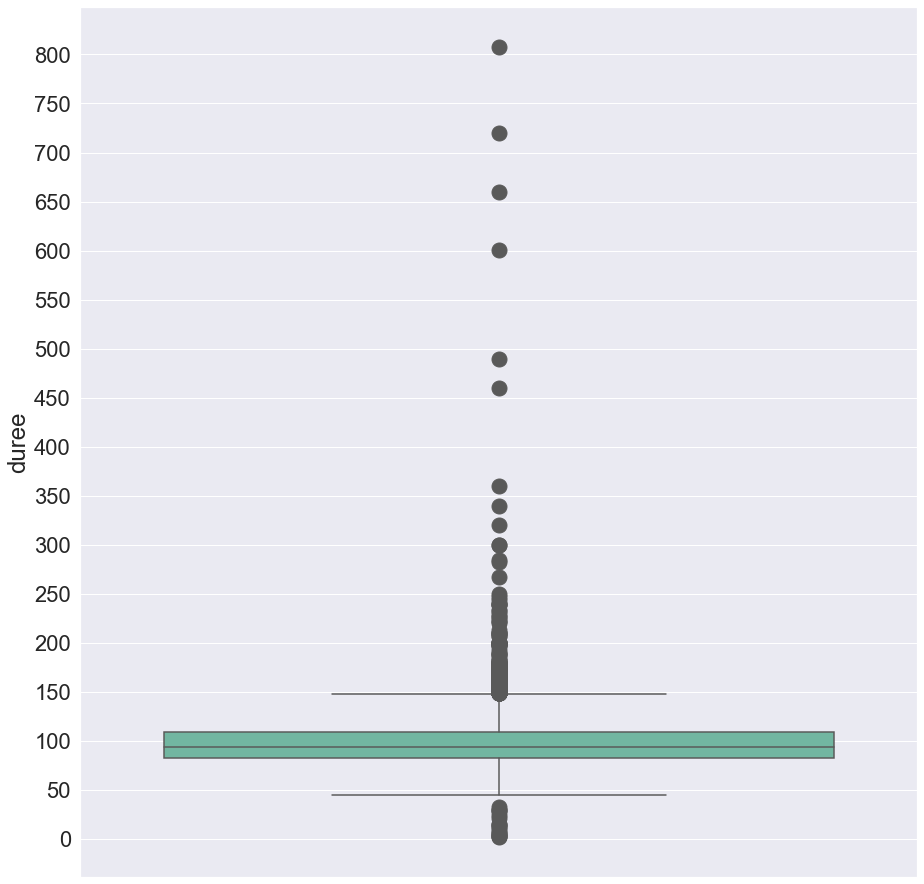

In [1264]:
sns.set_style('darkgrid') #boite à moustache pour détetcter les valeurs aberrantes de la colonne duree
sns.set_palette('Set2')

plt.figure(figsize=(15,16)) 
plt. locator_params(nbins = 20)

sns.boxplot(y = 'duree', data = dfilms,flierprops=dict(marker='o', markersize=15, color = 'b'))


In [1265]:
percentile25 = dfilms['duree'].quantile(0.25)

percentile75 = dfilms['duree'].quantile(0.75)
iqr= percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
upper_limit

148.0

In [1266]:
dfilms.shape

(9534, 12)

In [1267]:
dfilms.drop(dfilms.loc[dfilms['duree']>148].index, inplace=True) #suppression des valeurs aberrantes


In [1268]:
dfilms.shape

(9223, 12)

<AxesSubplot:ylabel='nbre_utilisateur_note'>

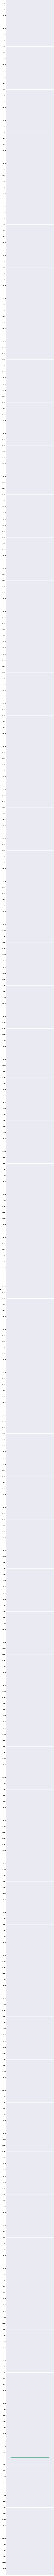

In [1269]:
sns.set_style('darkgrid') #boite à moustache pour détetcter les valeurs aberrantes de la colonne nbre_utilisateur_note
sns.set_palette('Set2')

plt.figure(figsize=(16,900)) 
plt. locator_params(nbins = 600)

sns.boxplot(y = 'nbre_utilisateur_note', data = dfilms,flierprops=dict(marker='v', markersize=10, color = 'b'))

In [1270]:
dfilms.describe()

duree  utilisateur_note  nbre_utilisateur_note       Action  \
count  9223.000000       9223.000000            9223.000000  9223.000000   
mean     94.355307          4.534100            2944.998374     0.103979   
std      21.098186          2.427046           23554.136427     0.305250   
min       2.000000          1.000000               1.000000     0.000000   
25%      82.000000          1.000000               1.000000     0.000000   
50%      93.000000          5.300000              50.000000     0.000000   
75%     106.000000          6.400000             348.500000     0.000000   
max     148.000000         10.000000          762887.000000     1.000000   

            Comedy        Drama       Horror     Thriller  autres_genres  
count  9223.000000  9223.000000  9223.000000  9223.000000    9223.000000  
mean      0.267483     0.529871     0.117532     0.131736       0.443673  
std       0.442671     0.499134     0.322071     0.338222       0.496844  
min       0.000000     0.000000     0.000000     0.000000       0.000000  
25%       0.000000     0.000000     0.000000     0.000000       0.000000  
50%       0.000000     1.000000     0.000000     0.000000       0.000000  
75%       1.000000     1.000000     0.000000     0.000000       1.000000  
max       1.000000     1.000000     1.000000     1.000000       1.000000

In [1271]:
percentile25 = dfilms['nbre_utilisateur_note'].quantile(0.25)

percentile75 = dfilms['nbre_utilisateur_note'].quantile(0.75)
iqr= percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
upper_limit

869.75

In [1272]:
dfilms.drop(dfilms.loc[dfilms['nbre_utilisateur_note']>869].index, inplace=True) #suppression des valeurs aberrantes


In [1273]:
dfilms.shape

(7766, 12)

# 2. Creer 2 nouvelles colonnes duree minutes log, nbre utilisateur note log.


In [1274]:
dfilms["duree_minutes_log"]=np.log(dfilms["duree"]) #création de la colonne duree_minutes_log


In [1275]:
dfilms["nbre_utilisateur_note_log"]=np.log(dfilms["nbre_utilisateur_note"]) #création de la colonne nbre_utilisateur_note


In [1276]:
dfilms.head()

id_film                titre_film  duree date_sortie  utilisateur_note  \
219  4299774  Strangeways Here We Come     86  2018-01-01               5.1   
234  5658672                Peripheral     89  2018-01-01               4.8   
263  5218736                   Leviano    102  2018-01-01               4.6   
282  7243754                Dirty Work     73  2018-01-01               3.3   
329  7141148            Can't Have You     90  2018-01-01               3.7   

     nbre_utilisateur_note  Action  Comedy  Drama  Horror  Thriller  \
219                    351       0       1      0       0         0   
234                    228       0       0      0       1         0   
263                    315       0       0      1       0         0   
282                    380       0       0      1       0         1   
329                    146       0       1      1       0         0   

     autres_genres  duree_minutes_log  nbre_utilisateur_note_log  
219              1           4.454347                   5.860786  
234              1           4.488636                   5.429346  
263              1           4.624973                   5.752573  
282              1           4.290459                   5.940171  
329              1           4.499810                   4.983607

# 3. Realiser une analyse univariee compl`ete avec les visualisations adequates et interpreter les resultats.


## analyse univariee

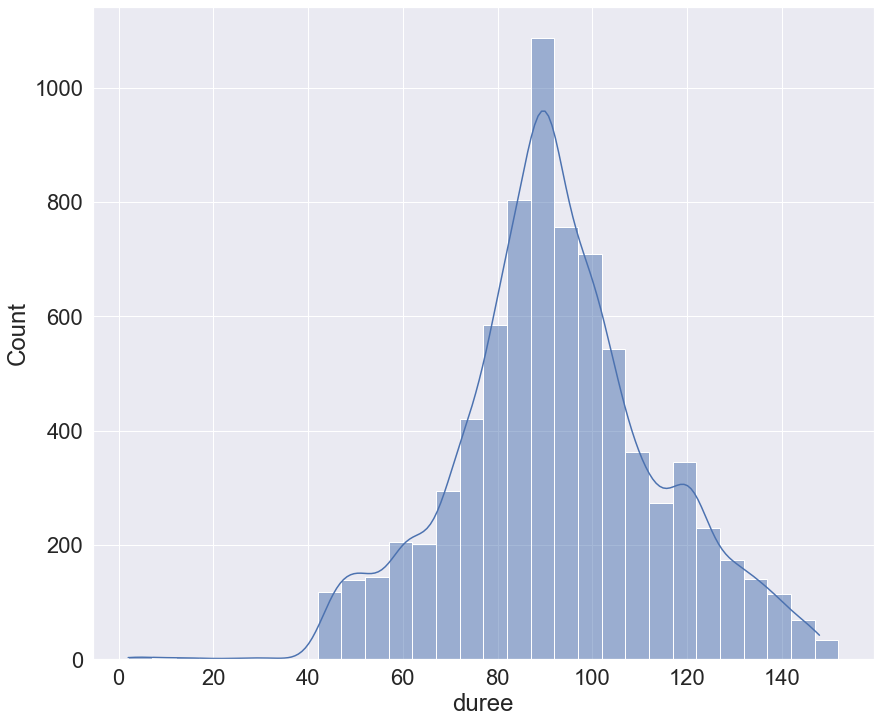

In [1277]:
sns.set(font_scale=2)

plt.figure(figsize=(14,12)) 

sns.histplot(x='duree', data=dfilms, binwidth=5,kde=True);


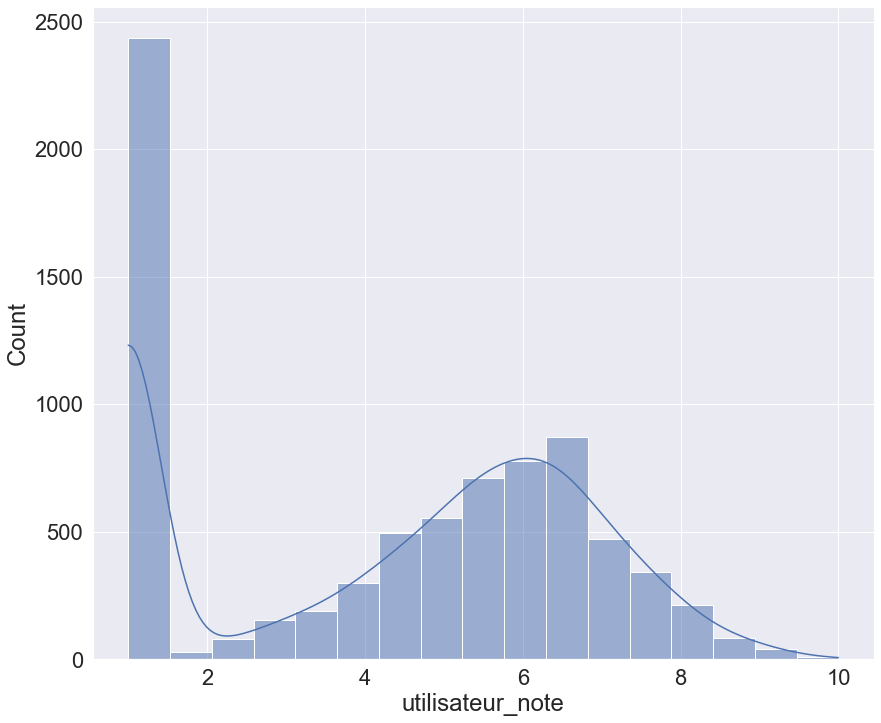

In [1278]:
plt.figure(figsize=(14,12)) 

sns.histplot(x='utilisateur_note', data=dfilms,kde=True);
plt.show()

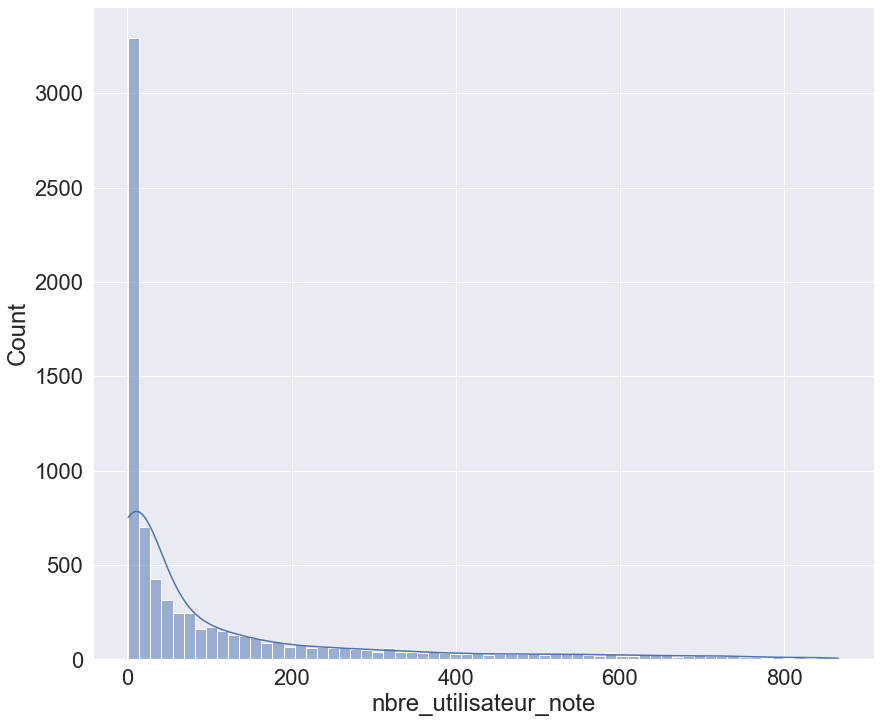

In [1279]:
plt.figure(figsize=(14,12)) 

sns.histplot(x='nbre_utilisateur_note', data=dfilms,kde=True);


<AxesSubplot:xlabel='duree'>

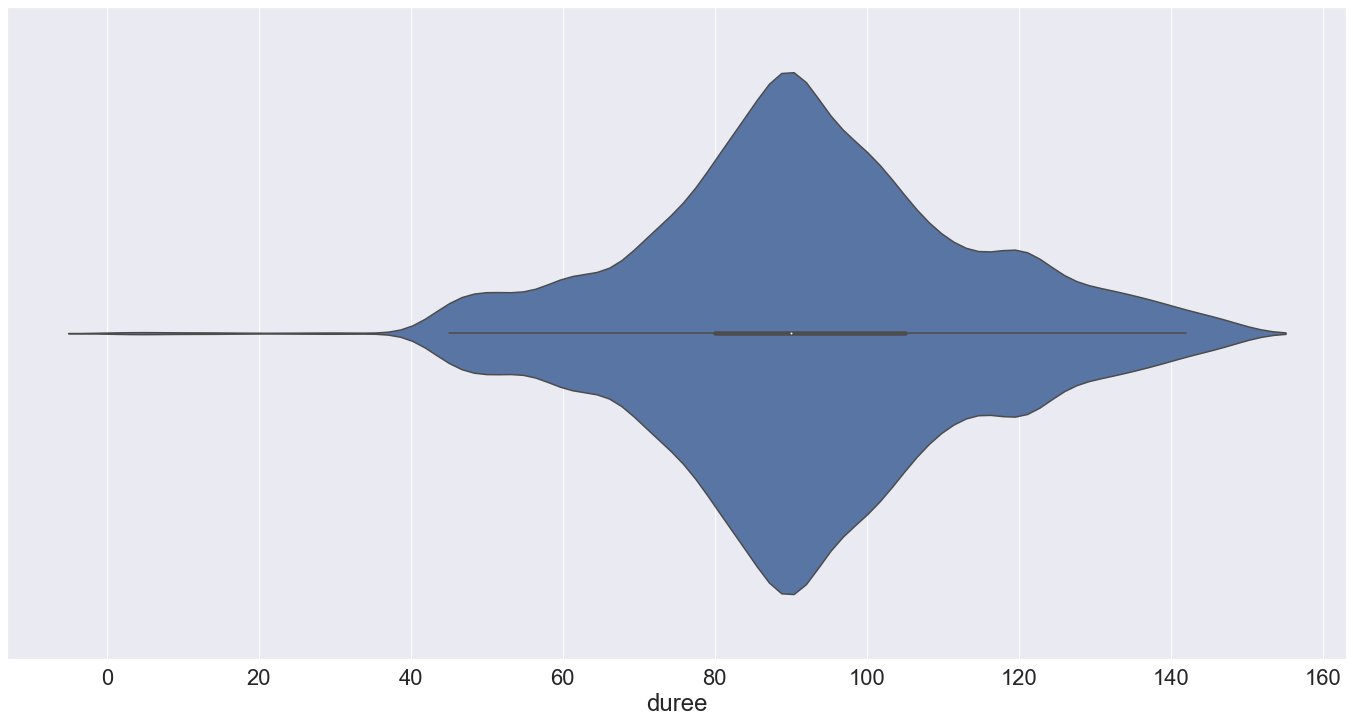

In [1280]:
plt.figure(figsize=(24,12)) 
sns.violinplot(x ='duree', data = dfilms)


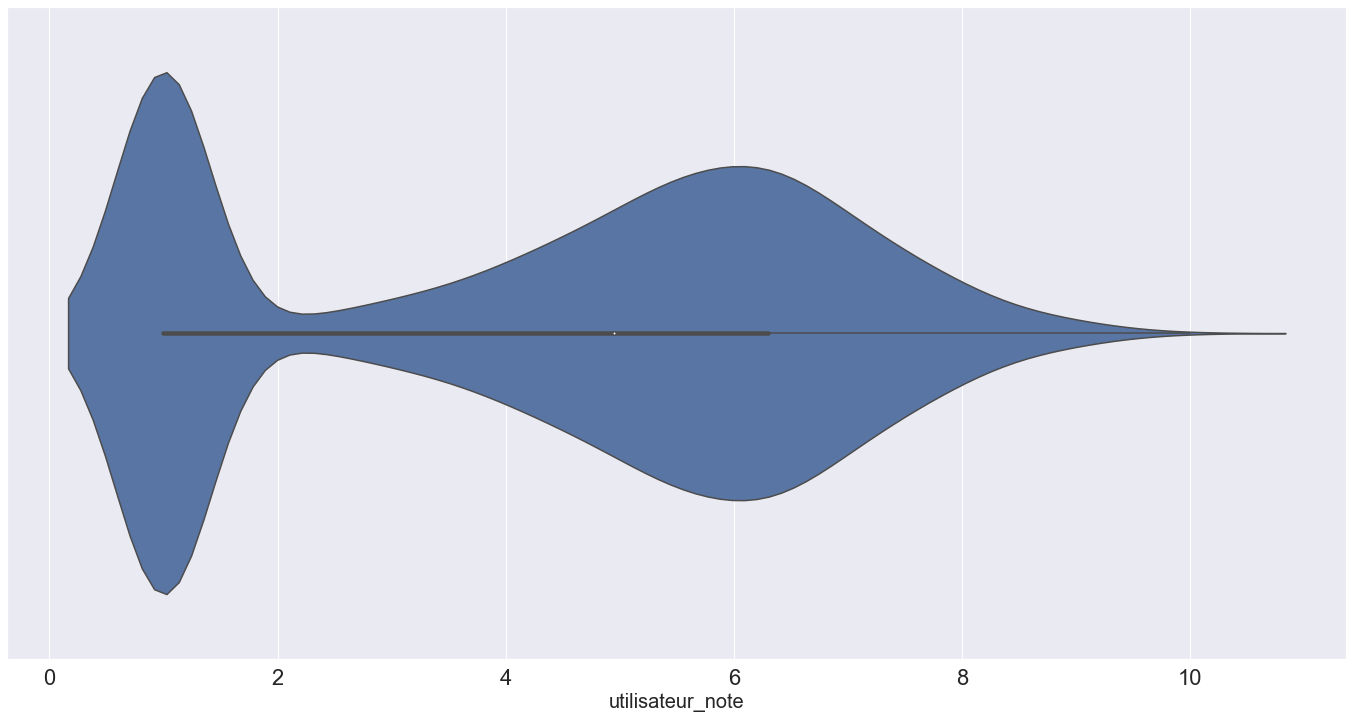

In [1281]:
plt.figure(figsize=(24,12)) 

sns.violinplot(x ='utilisateur_note', data = dfilms)
plt.xlabel('utilisateur_note',fontsize=20)
plt.show()

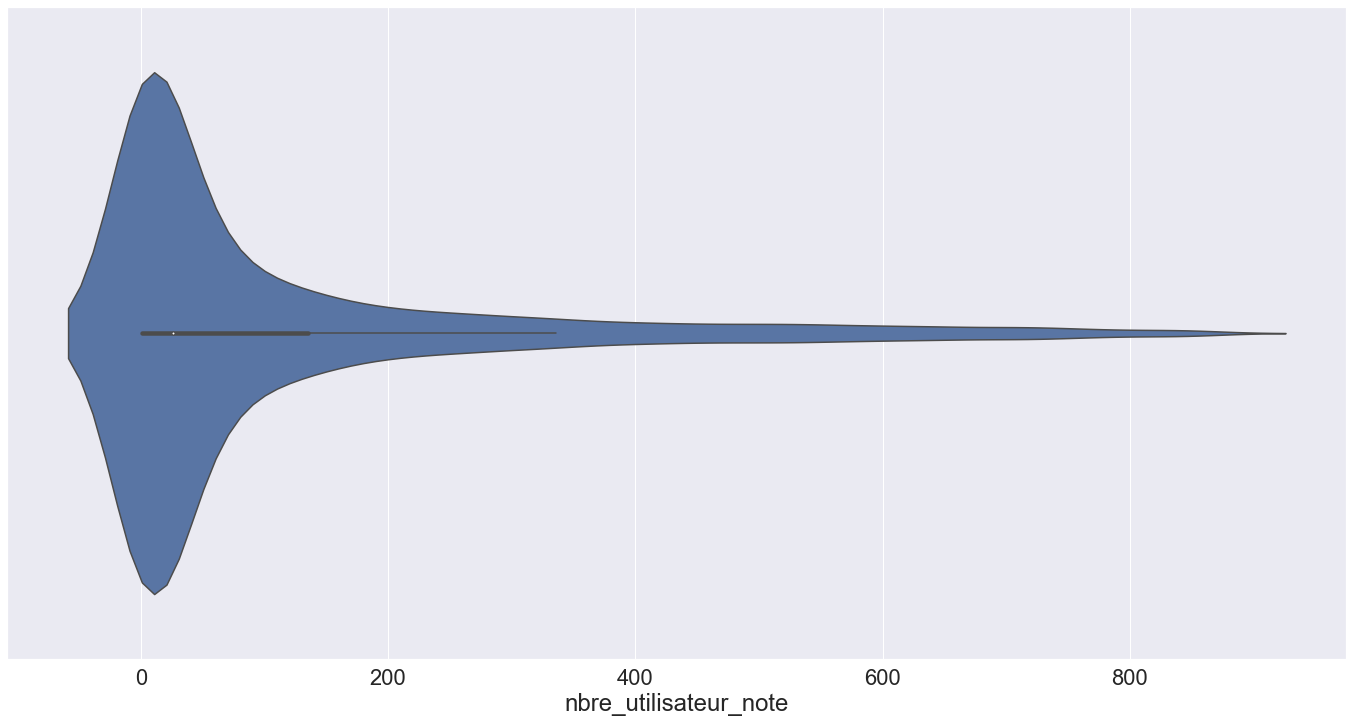

In [1282]:
plt.figure(figsize=(24,12)) 

sns.violinplot(x ='nbre_utilisateur_note', data = dfilms)
plt.show()

<AxesSubplot:xlabel='Thriller', ylabel='count'>

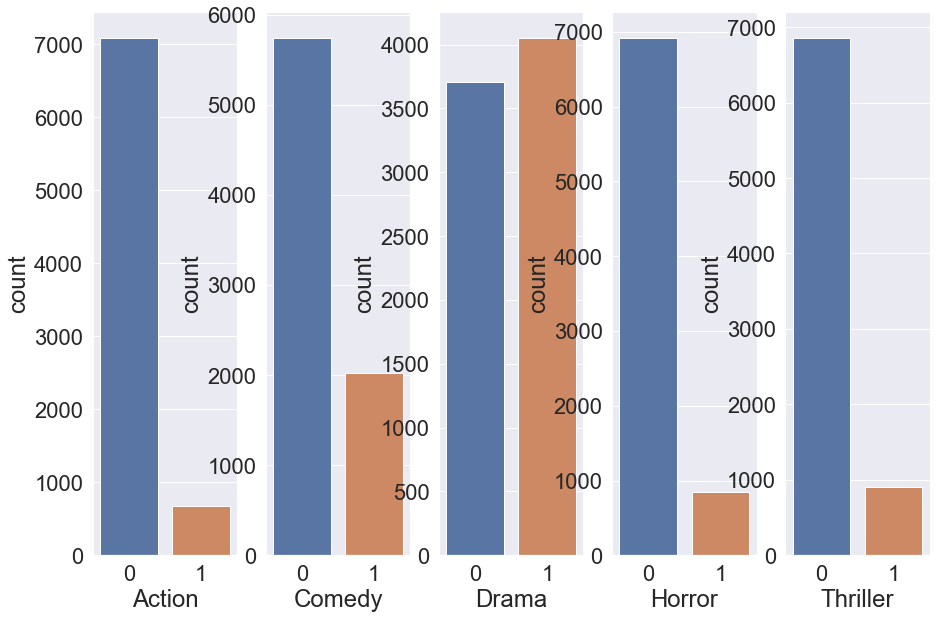

In [1283]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 10))

sns.countplot(x ='Action', data = dfilms, ax=axs[0])
sns.countplot(x ='Comedy', data = dfilms, ax=axs[1])
sns.countplot(x ='Drama', data = dfilms, ax=axs[2])
sns.countplot(x ='Horror', data = dfilms, ax=axs[3])
sns.countplot(x ='Thriller', data = dfilms, ax=axs[4])


# 4. Realiser une analyse bivariee complete avec les visualisations adequates et interpreter les resultats.


<AxesSubplot:xlabel='nbre_utilisateur_note', ylabel='utilisateur_note'>

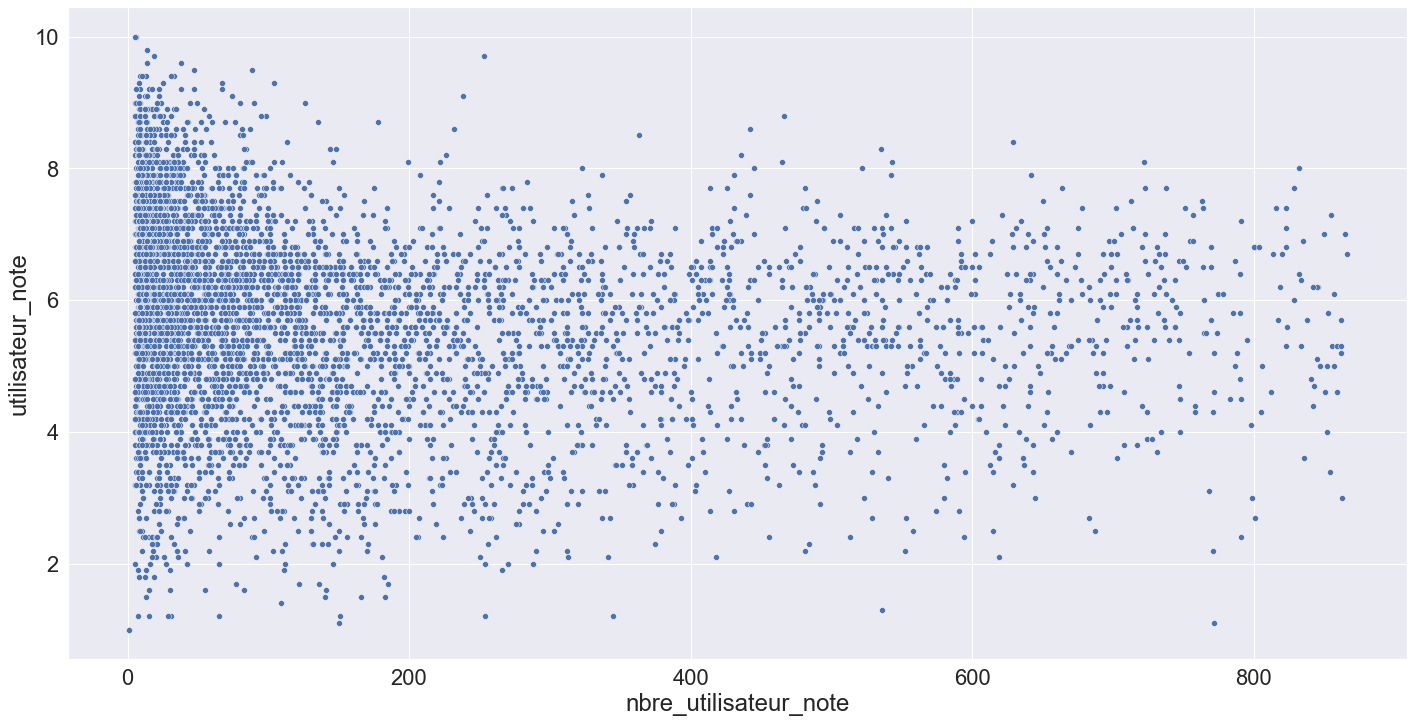

In [1284]:
plt.figure(figsize=(24,12)) 

sns.scatterplot(y="utilisateur_note",
                    x="nbre_utilisateur_note",
                    
                    data=dfilms)

<AxesSubplot:xlabel='nbre_utilisateur_note_log', ylabel='utilisateur_note'>

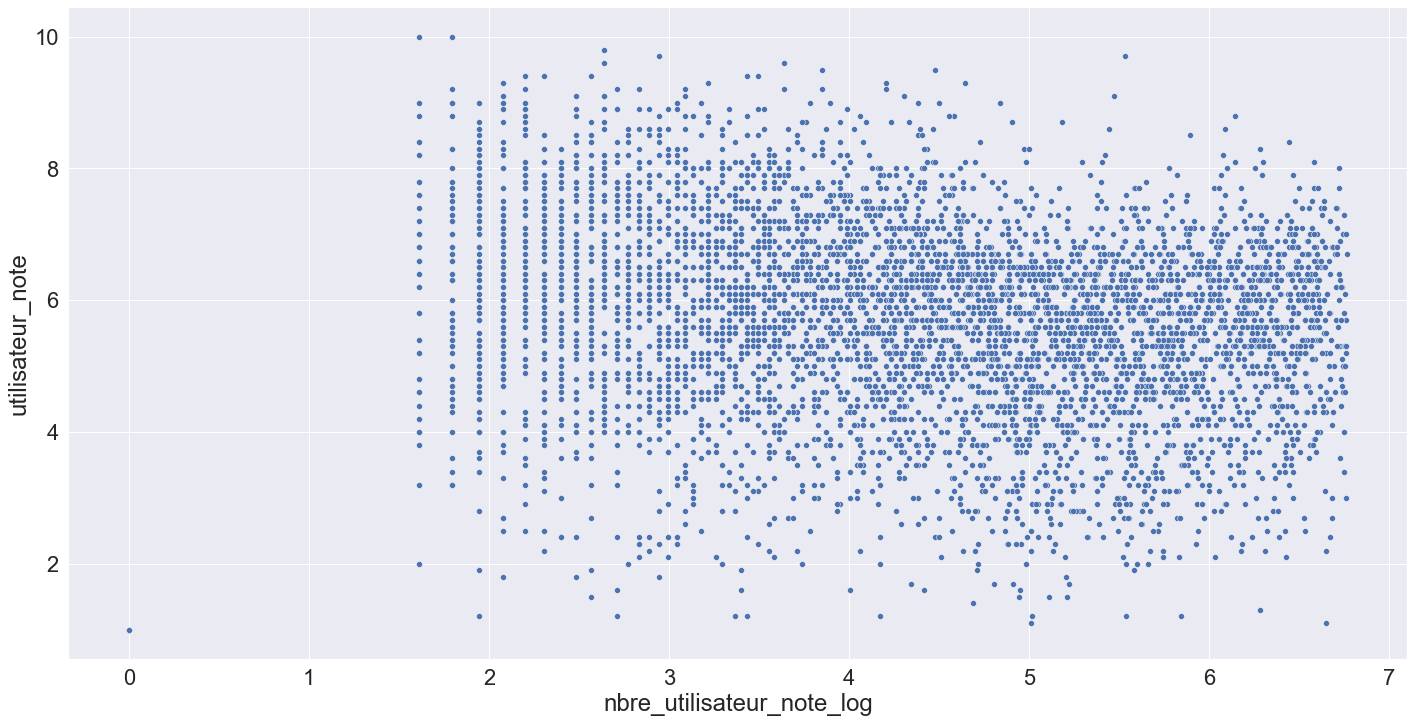

In [1285]:
plt.figure(figsize=(24,12)) 

sns.scatterplot(y="utilisateur_note",
                    x="nbre_utilisateur_note_log",
                    
                    data=dfilms)

<AxesSubplot:xlabel='duree', ylabel='utilisateur_note'>

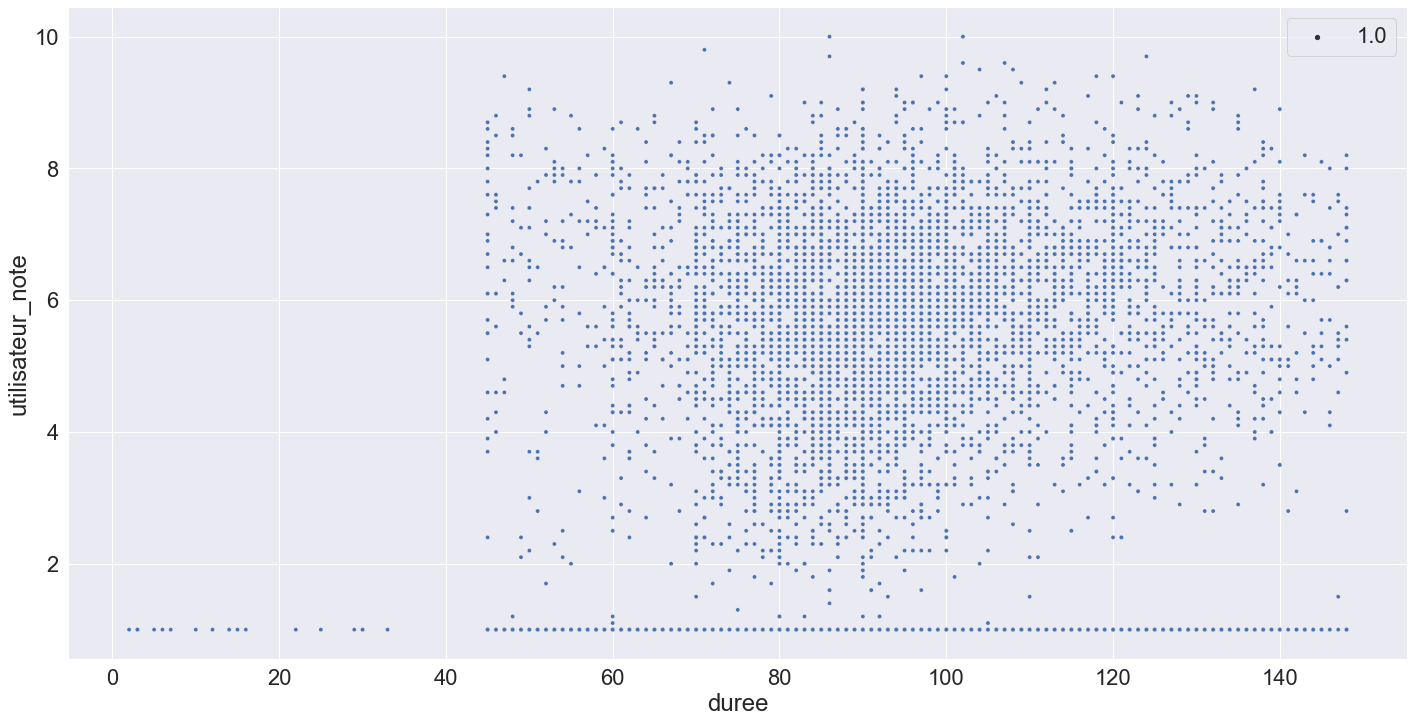

In [1286]:
plt.figure(figsize=(24,12)) 

sns.scatterplot(y="utilisateur_note",
                    x="duree",size=1.0,
                    
                    data=dfilms)

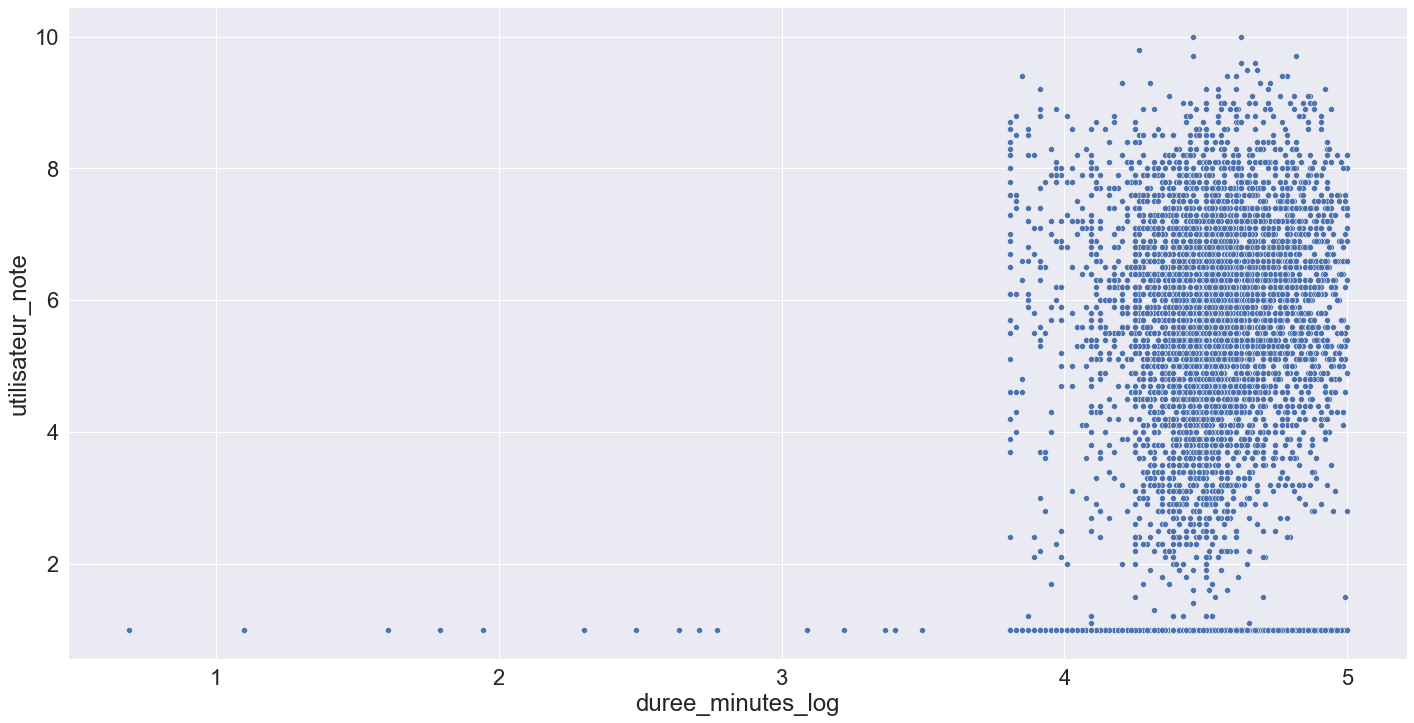

In [1287]:
plt.figure(figsize=(24,12)) 

g =sns.scatterplot(y="utilisateur_note",
                    x="duree_minutes_log",
                    
                    data=dfilms)

<Figure size 1800x1800 with 0 Axes>

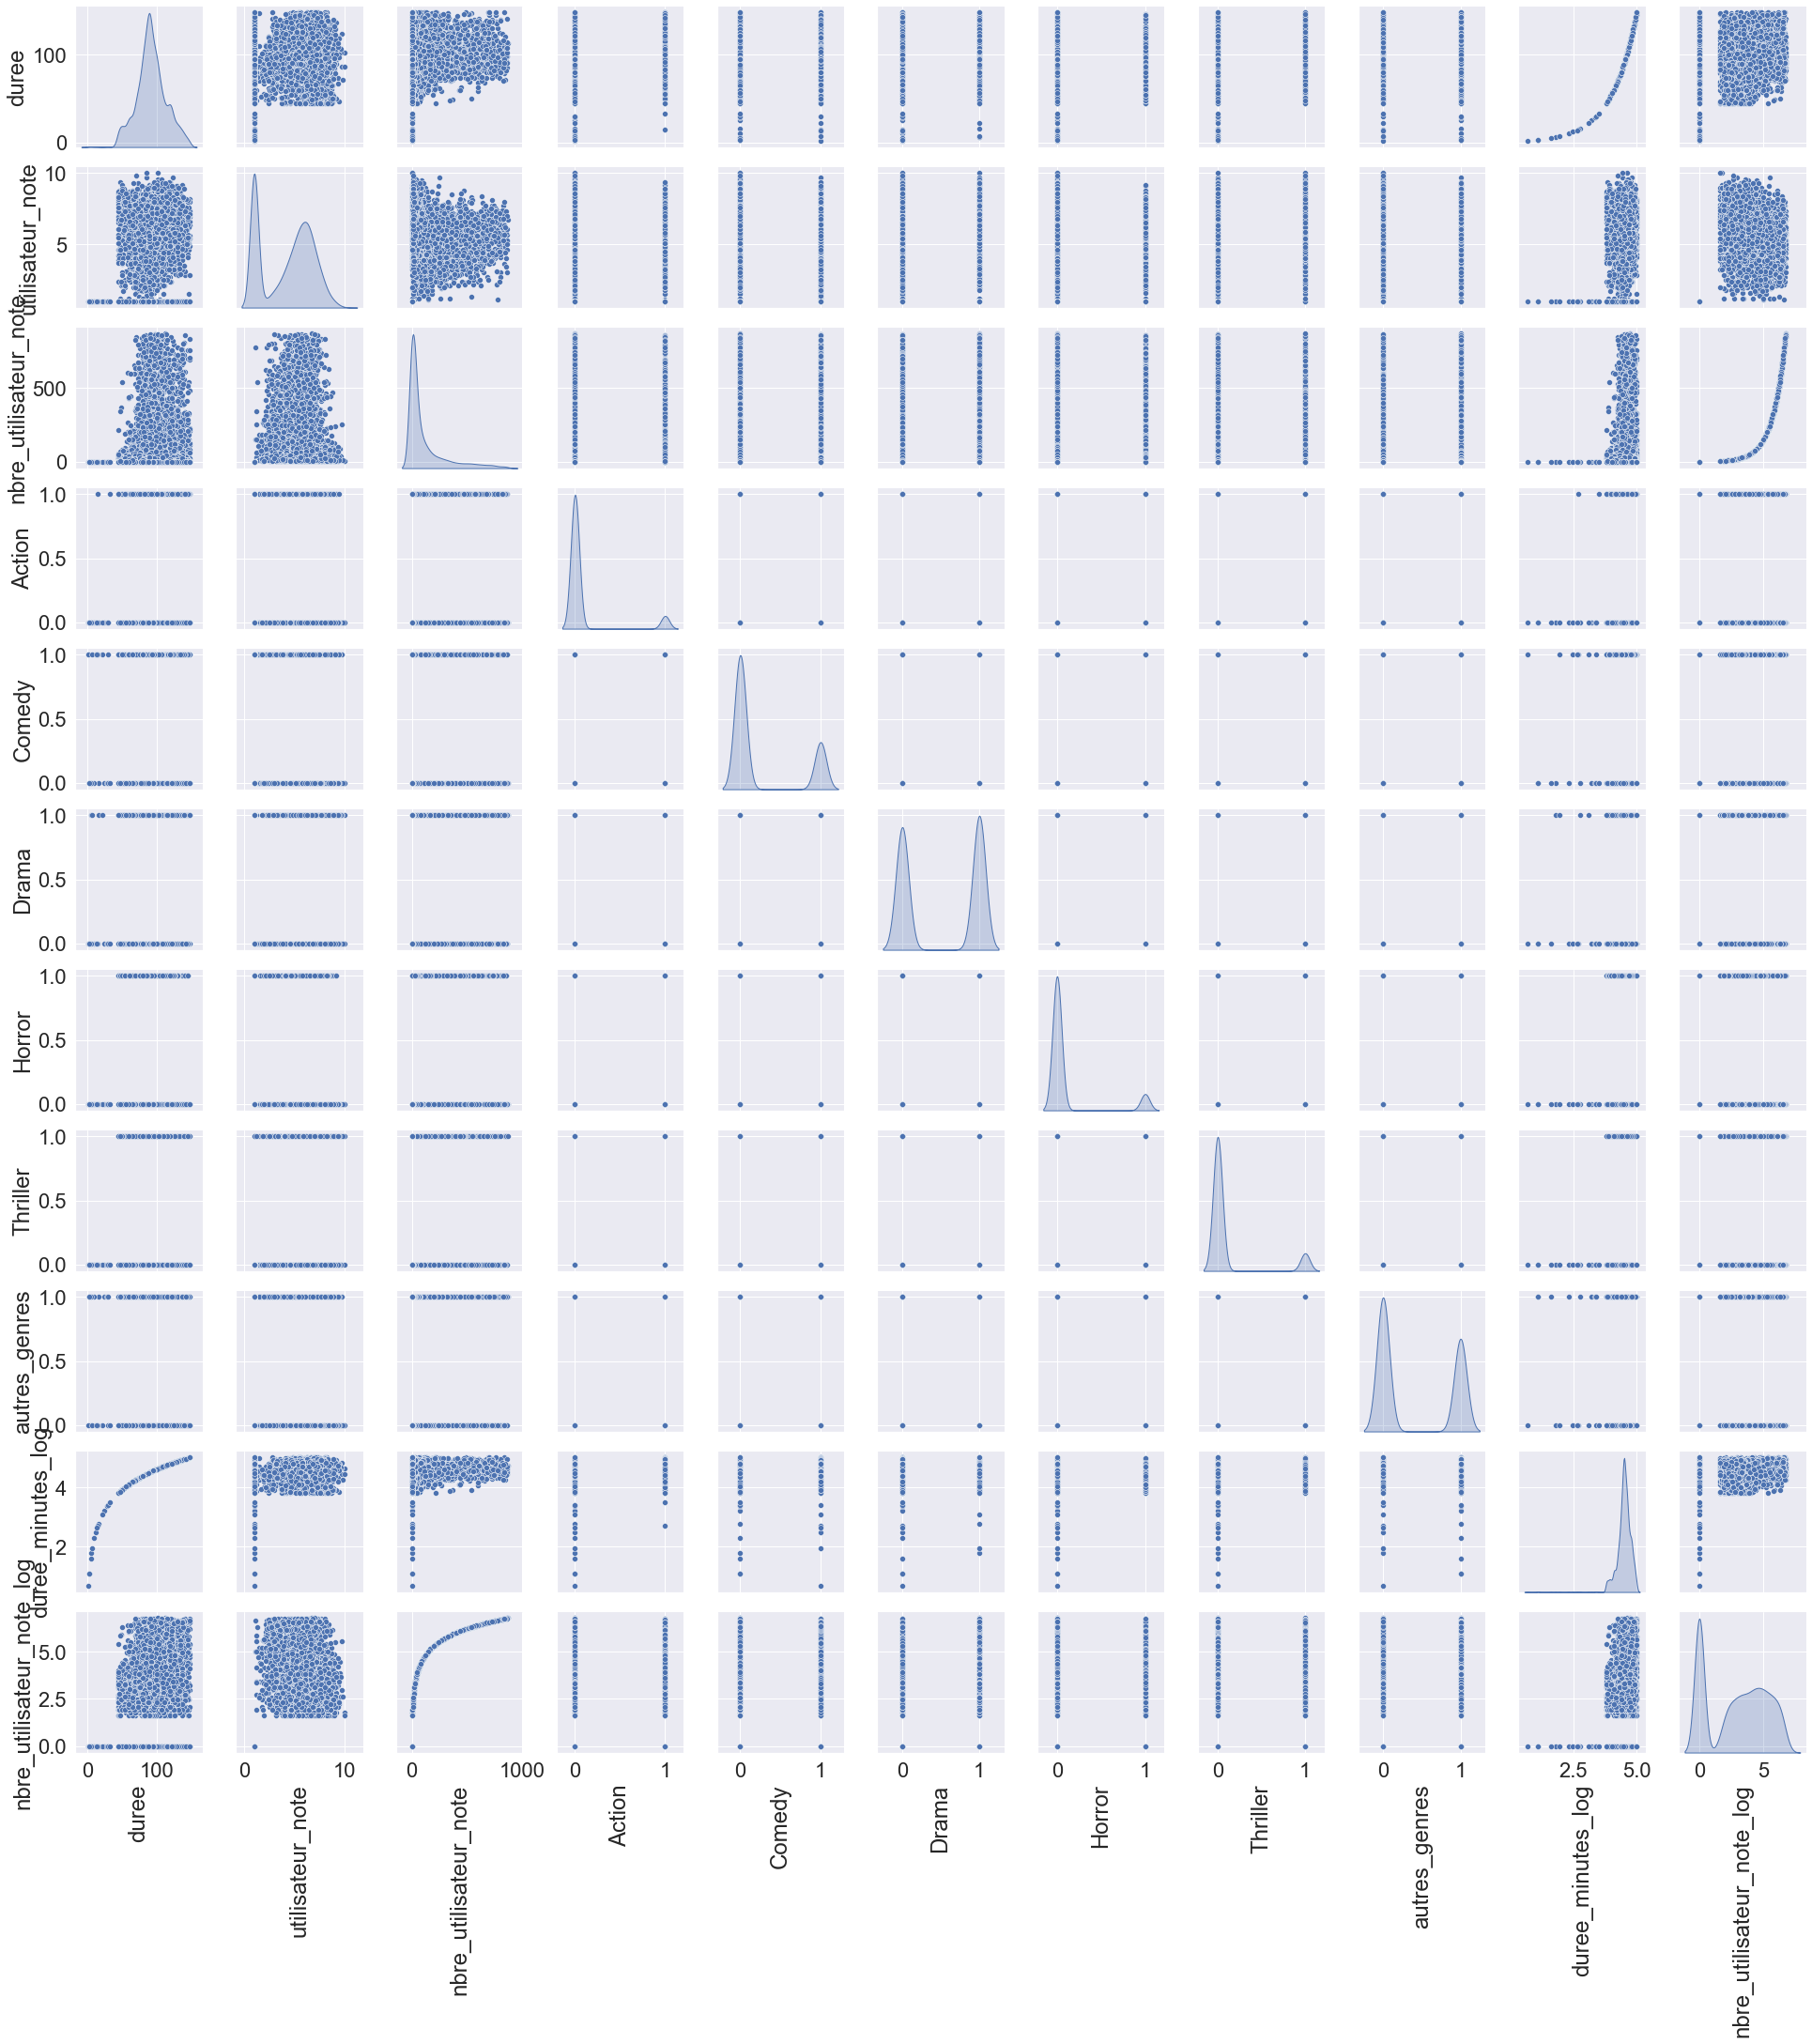

In [1288]:
plt.figure(figsize=(25,25))
# plt.rcParams["axes.labelsize"] = 25

g = sns.pairplot(dfilms , diag_kind='kde')

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 90)

plt.show()

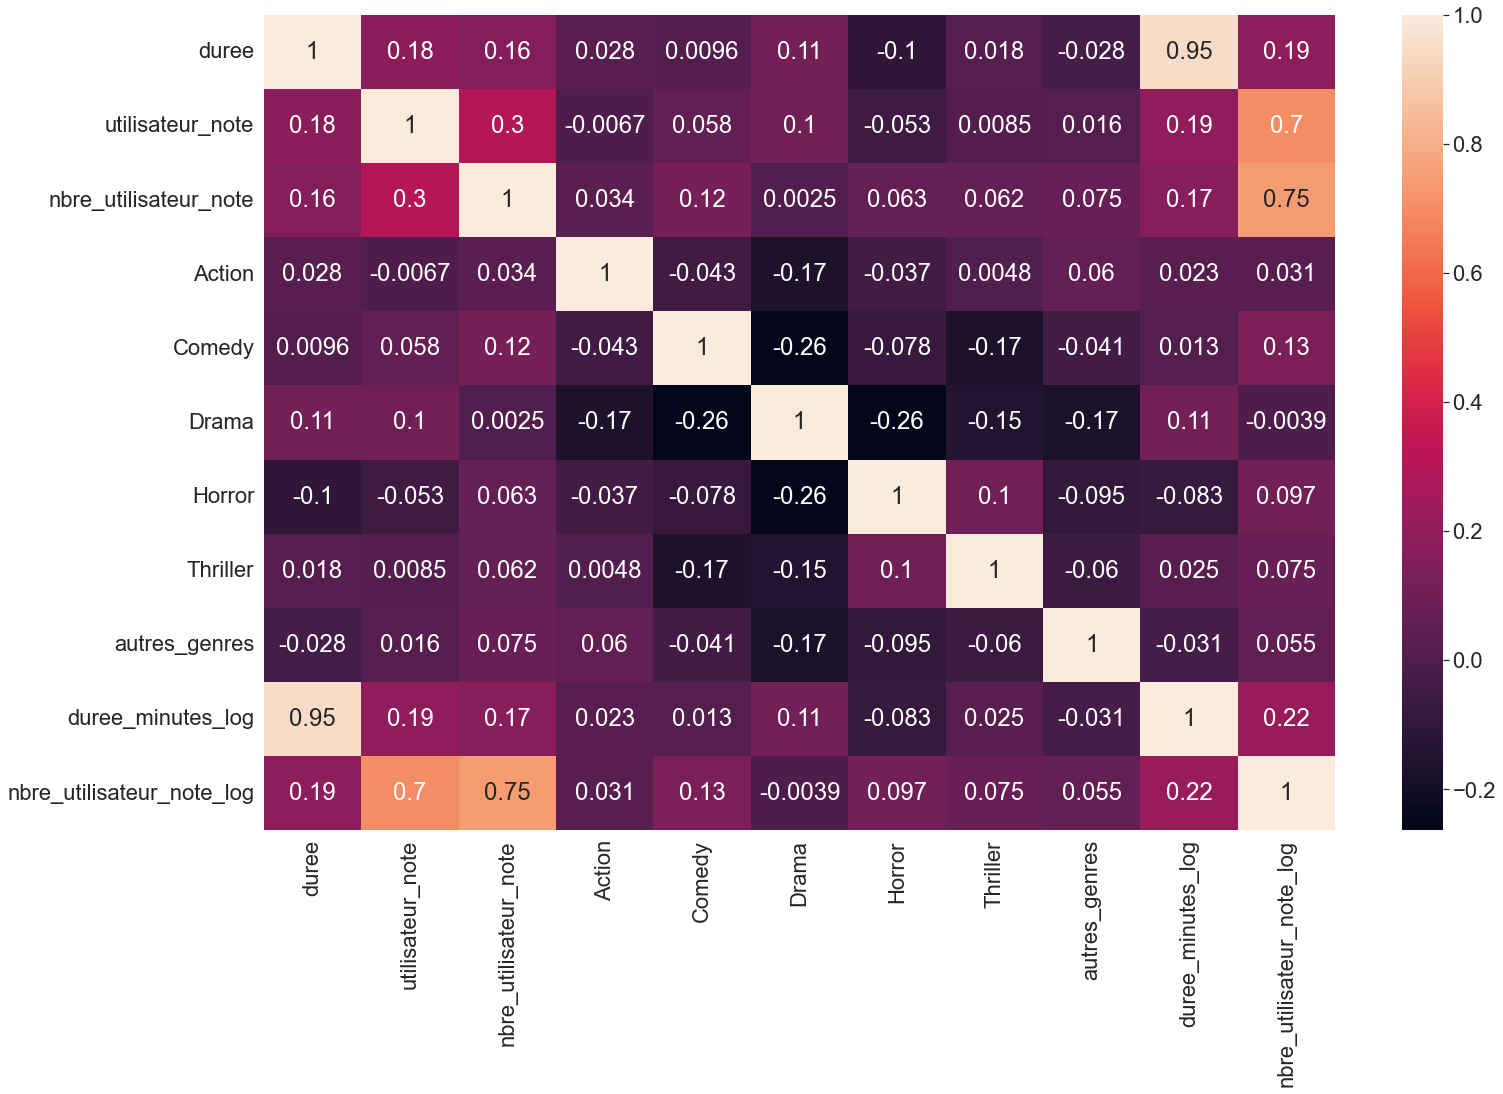

In [1289]:
plt.figure(figsize=(24,15))  #matrice de correlation
# plt.rcParams["axes.labelsize"] = 40

sns.heatmap(dfilms.corr(),annot=True)

plt.show()

# 5. Dans cette question, on s’interesse a predire la note d’un film utilisateur note en fonction de 6 colonnes nbre utilisateur note log, duree minutes log, drame, action, thriller, et horreur. Concevez un modele de r´egression lineaire qui permet de faire cette pr´ediction, v´erifier les 4 conditions n´ecessaires pour appliquer la regression lin´eaire et  evaluer votre modele.

In [1290]:
df_reg = dfilms.copy() #faire une copie de la dataframe

In [1291]:
df_reg

id_film                                         titre_film  duree  \
219     4299774                           Strangeways Here We Come     86   
234     5658672                                         Peripheral     89   
263     5218736                                            Leviano    102   
282     7243754                                         Dirty Work     73   
329     7141148                                     Can't Have You     90   
...         ...                                                ...    ...   
12905   9627170                                      Cielo de Agua     56   
12907  12750552                                        Olu Munsami    148   
12909   7679414                          The Low Key Savage Sunday     80   
12910   8514766  Üç Harflilerin Musallat Oldugu Büyülü Konakta ...     80   
12913  23724074                              Víctimas de tratantes     89   

      date_sortie  utilisateur_note  nbre_utilisateur_note  Action  Comedy  \
219    2018-01-01               5.1                    351       0       1   
234    2018-01-01               4.8                    228       0       0   
263    2018-01-01               4.6                    315       0       0   
282    2018-01-01               3.3                    380       0       0   
329    2018-01-01               3.7                    146       0       1   
...           ...               ...                    ...     ...     ...   
12905  2018-01-01               1.0                      1       0       0   
12907  2018-01-01               1.0                      1       0       0   
12909  2018-01-01               1.0                      1       0       1   
12910  2018-01-01               2.5                    121       0       1   
12913  2018-01-01               1.0                      1       0       0   

       Drama  Horror  Thriller  autres_genres  duree_minutes_log  \
219        0       0         0              1           4.454347   
234        0       1         0              1           4.488636   
263        1       0         0              1           4.624973   
282        1       0         1              1           4.290459   
329        1       0         0              1           4.499810   
...      ...     ...       ...            ...                ...   
12905      1       0         0              0           4.025352   
12907      1       0         0              0           4.997212   
12909      1       0         0              1           4.382027   
12910      0       1         1              0           4.382027   
12913      1       0         0              0           4.488636   

       nbre_utilisateur_note_log  
219                     5.860786  
234                     5.429346  
263                     5.752573  
282                     5.940171  
329                     4.983607  
...                          ...  
12905                   0.000000  
12907                   0.000000  
12909                   0.000000  
12910                   4.795791  
12913                   0.000000  

[7766 rows x 14 columns]

In [1292]:
col = ["id_film","titre_film","date_sortie","duree","date_sortie","nbre_utilisateur_note","Comedy","autres_genres"]
df_reg = df_reg.drop(columns=col) #garder juste les colonnes qu'on veut pour faire la prédiction

In [1293]:
df_reg.head()

utilisateur_note  Action  Drama  Horror  Thriller  duree_minutes_log  \
219               5.1       0      0       0         0           4.454347   
234               4.8       0      0       1         0           4.488636   
263               4.6       0      1       0         0           4.624973   
282               3.3       0      1       0         1           4.290459   
329               3.7       0      1       0         0           4.499810   

     nbre_utilisateur_note_log  
219                   5.860786  
234                   5.429346  
263                   5.752573  
282                   5.940171  
329                   4.983607

In [1294]:
# plt.figure(figsize=(24,15))  #matrice de correlation
# # plt.rcParams["axes.labelsize"] = 40

# sns.heatmap(df_reg.corr(),annot=True)

# plt.show()

## Linéarité

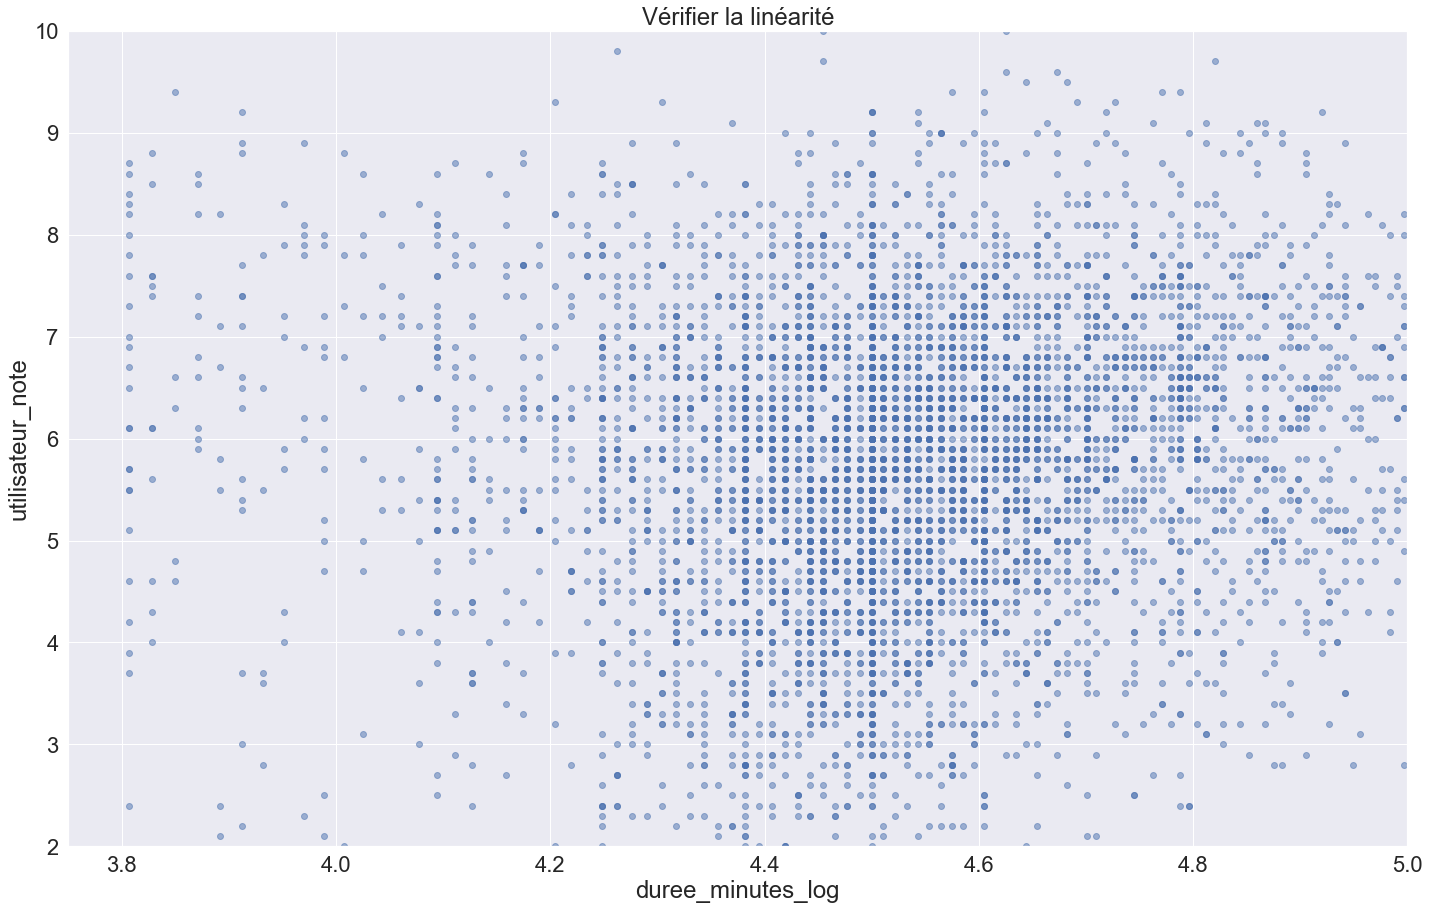

In [1295]:
plt.figure(figsize=(24,15))
a = plt.scatter(df_reg['duree_minutes_log'], df_reg['utilisateur_note'], alpha=0.5) #vérifier la linéarité
plt.title('Vérifier la linéarité')
plt.xlabel('duree_minutes_log')
plt.ylabel('utilisateur_note')
plt.ylim((2, 10))
plt.xlim((3.75, 5))

plt.show()

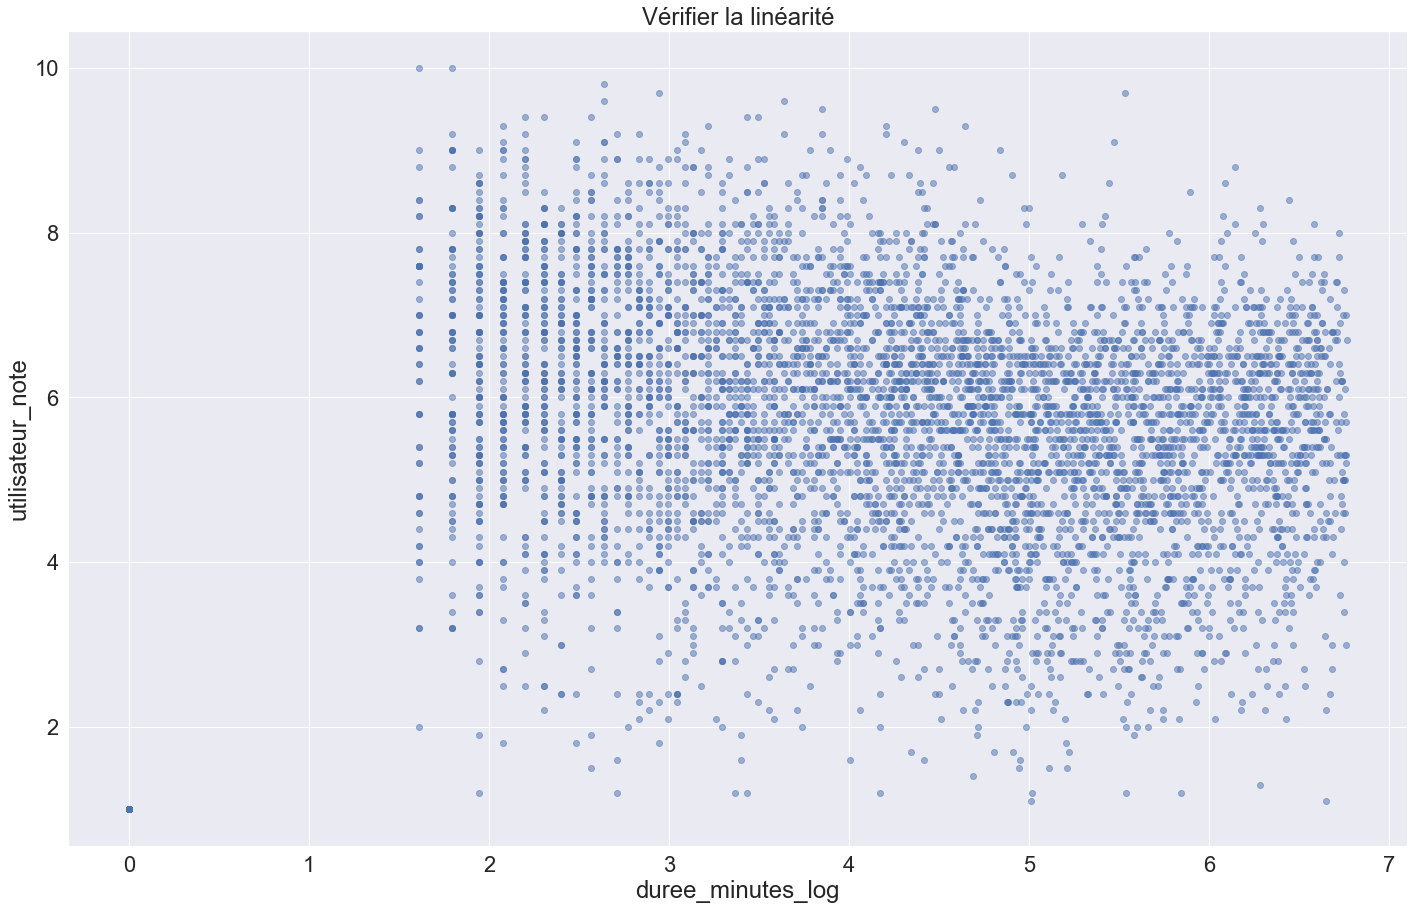

In [1296]:
plt.figure(figsize=(24,15))
plt.scatter(df_reg['nbre_utilisateur_note_log'], df_reg['utilisateur_note'], alpha=0.5)
plt.title('Vérifier la linéarité')
plt.xlabel('duree_minutes_log')
plt.ylabel('utilisateur_note')
plt.show()

In [1297]:
X = df_reg.drop('utilisateur_note',axis=1) #supprimer la colonne cible pour le X
y = df_reg["utilisateur_note"].values

In [1298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #division des données en données de test et d'entrainement

In [1299]:
X_train = sm.add_constant(X_train) #ajout de la constante
X_test = sm.add_constant(X_test)

In [1300]:
#Fit the model
model = sm.OLS(y_train,X_train).fit() #entrainer le modéle
y_pred = model.predict(X_test)

In [1301]:
residu = y_test-y_pred #calculer le residu
residu

11056   -0.842281
9977    -0.665974
11021   -0.912640
5681     2.090544
5340     3.129930
           ...   
4539     5.218123
2256     0.494298
2969     0.396994
11854   -0.996753
4392     1.596125
Length: 1554, dtype: float64

## Résidus presque normaux

<AxesSubplot:ylabel='Count'>

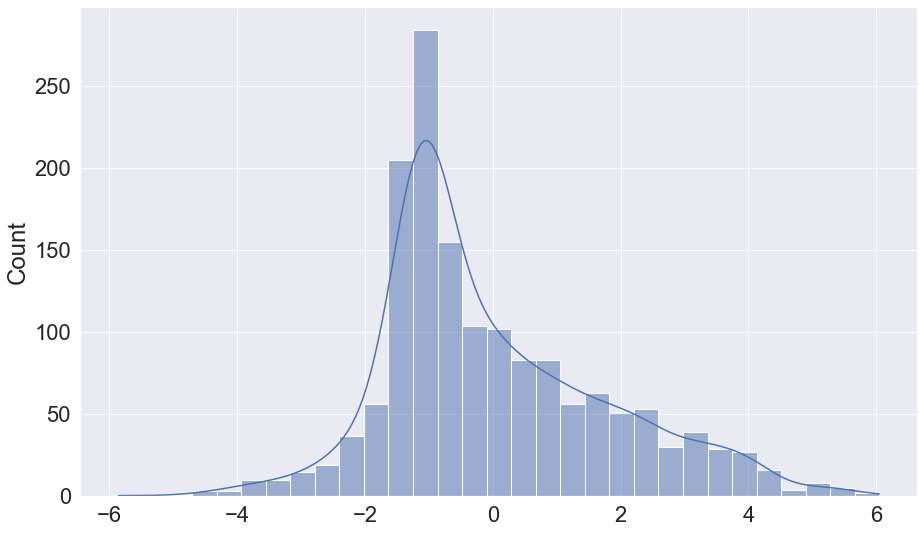

In [1302]:
plt.figure(figsize=(15,9))
sns.histplot(data = residu, kde=True)


## Variabilité constante des résidus


<AxesSubplot:>

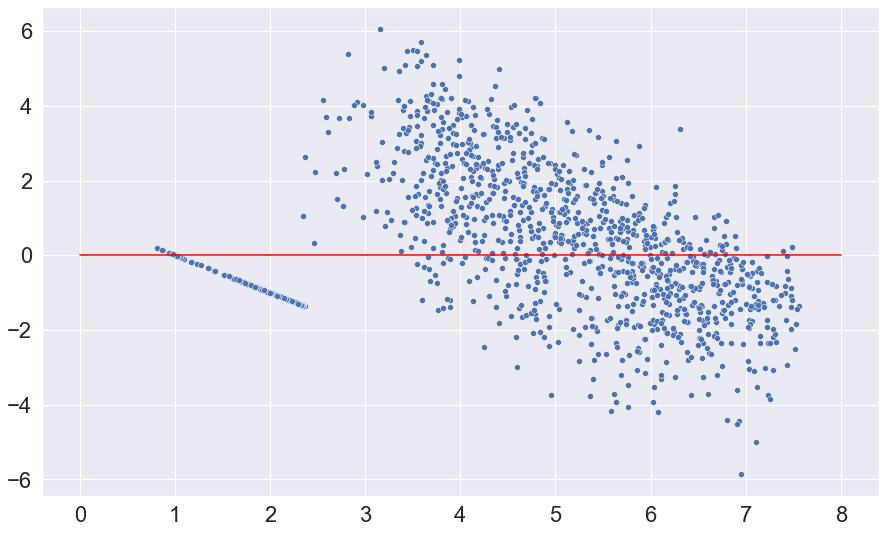

In [1303]:
plt.figure(figsize=(15,9))
sns.scatterplot(y_pred,residu)
sns.lineplot([0,8],[0,0],color='red')

## Indépendance des résidus

<AxesSubplot:>

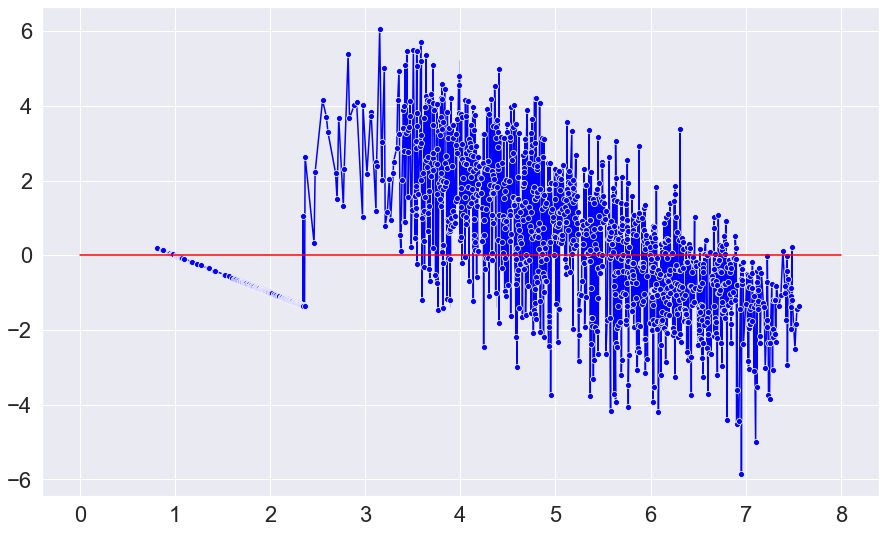

In [1304]:
plt.figure(figsize=(15,9)) #on remarque que les valeurs sont indépendantes
sns.lineplot(y_pred,residu,marker='o',color='blue')
sns.lineplot([0,8],[0,0],color='red')

## Metriques de la régression

In [1305]:
m1 = mean_absolute_error(y_test,y_pred)
m2 = mean_squared_error(y_test,y_pred)
m3 = np.sqrt(mean_squared_error(y_test,y_pred))
m4 = np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
m5 = r2_score(y_test,y_pred)
n=y_test.shape[0] #nombre des observations
k=6 #nombre des variables indépendantes
m6 = 1 - ((1-m5)*(n-1)/(n-k-1))

In [1306]:
print("Erreur absolue moyenne (Mean absolute erro) est :",m1)
print("Erreur quadratique moyenne (Mean squared error) est :",m2)
print("Écart quadratique moyen (Root-mean-square deviation) est :",m3)
print("Root Mean Squared Log Error(RMSLE)  est :",m4)
print("Le Coefficient de détermination  R2  est :",m5)
print("Le Coefficient de détermination ajusté R2 adj est :",m6)


Erreur absolue moyenne (Mean absolute erro) est : 1.4154209893182292
Erreur quadratique moyenne (Mean squared error) est : 3.13272849808588
Écart quadratique moyen (Root-mean-square deviation) est : 1.769951552468564
Root Mean Squared Log Error(RMSLE)  est : 0.5709521747244448
Le Coefficient de détermination  R2  est : 0.4986758944059234
Le Coefficient de détermination ajusté R2 adj est : 0.49673152166283063


In [1307]:
print('beta_0: ', model.params[0])
print('beta_1: ', model.params[1])
model.summary()

beta_0:  1.0276138975185918
beta_1:  -0.1947137795764661


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     1117.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:59:20   Log-Likelihood:                -12253.
No. Observations:                6212   AIC:                         2.452e+04
Df Residuals:                    6205   BIC:                         2.457e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.0276      0.381      2.696      0.007       0.280       1.775
Action                       -0.1947      0.080     -2.420      0.016      -0.352      -0.037
Drama                         0.3441      0.047      7.279      0.000       0.251       0.437
Horror                       -0.8666      0.075    -11.552      0.000      -1.014      -0.720
Thriller                     -0.2173      0.070     -3.111      0.002      -0.354      -0.080
duree_minutes_log             0.1982      0.086      2.304      0.021       0.030       0.367
nbre_utilisateur_note_log     0.7821      0.010     78.493      0.000       0.763       0.802
==============================================================================
Omnibus:                      493.523   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              616.231
Skew:                           0.759   Prob(JB):                    1.54e-134
Kurtosis:                       3.274   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6. Refaire la question préecedente aprèes avoir effectuer une normalisation adéequate. Comparer les réesutlats.

In [1308]:
df_reg1 = df_reg.copy()

In [1309]:
#normalisation Z-score
df_reg1[['duree_minutes_log_norm','nbre_utilisateur_note_log_norm','Action2','Horror2','Drama2','Thriller2']] = df_reg1[['duree_minutes_log','nbre_utilisateur_note_log','Action','Horror','Drama','Thriller']].apply(zscore)
col2 = ["duree_minutes_log","nbre_utilisateur_note_log",'Action','Horror','Drama','Thriller']
df_reg1 = df_reg1.drop(columns=col2)
df_reg1.head()

utilisateur_note  duree_minutes_log_norm  nbre_utilisateur_note_log_norm  \
219               5.1               -0.160404                        1.276128   
234               4.8               -0.030248                        1.087537   
263               4.6                0.487262                        1.228826   
282               3.3               -0.782495                        1.310829   
329               3.7                0.012164                        0.892696   

      Action2   Horror2    Drama2  Thriller2  
219 -0.308531 -0.348721 -1.045322  -0.363187  
234 -0.308531  2.867626 -1.045322  -0.363187  
263 -0.308531 -0.348721  0.956643  -0.363187  
282 -0.308531 -0.348721  0.956643   2.753401  
329 -0.308531 -0.348721  0.956643  -0.363187

In [1310]:
df_reg1

utilisateur_note  duree_minutes_log_norm  \
219                 5.1               -0.160404   
234                 4.8               -0.030248   
263                 4.6                0.487262   
282                 3.3               -0.782495   
329                 3.7                0.012164   
...                 ...                     ...   
12905               1.0               -1.788799   
12907               1.0                1.900221   
12909               1.0               -0.434921   
12910               2.5               -0.434921   
12913               1.0               -0.030248   

       nbre_utilisateur_note_log_norm   Action2   Horror2    Drama2  Thriller2  
219                          1.276128 -0.308531 -0.348721 -1.045322  -0.363187  
234                          1.087537 -0.308531  2.867626 -1.045322  -0.363187  
263                          1.228826 -0.308531 -0.348721  0.956643  -0.363187  
282                          1.310829 -0.308531 -0.348721  0.956643   2.753401  
329                          0.892696 -0.308531 -0.348721  0.956643  -0.363187  
...                               ...       ...       ...       ...        ...  
12905                       -1.285733 -0.308531 -0.348721  0.956643  -0.363187  
12907                       -1.285733 -0.308531 -0.348721  0.956643  -0.363187  
12909                       -1.285733 -0.308531 -0.348721  0.956643  -0.363187  
12910                        0.810598 -0.308531  2.867626 -1.045322   2.753401  
12913                       -1.285733 -0.308531 -0.348721  0.956643  -0.363187  

[7766 rows x 7 columns]

## Linearité

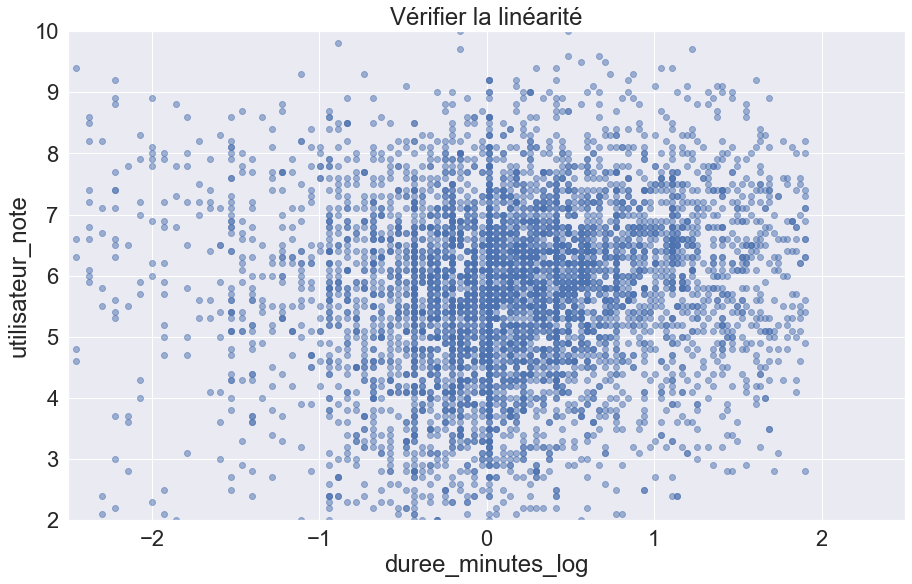

In [1311]:
plt.figure(figsize=(15,9)) #vérifier la linéarité
plt.scatter(df_reg1['duree_minutes_log_norm'], df_reg1['utilisateur_note'], alpha=0.5)
plt.title('Vérifier la linéarité')
plt.xlabel('duree_minutes_log')
plt.ylabel('utilisateur_note')
plt.ylim((2, 10))
plt.xlim((-2.5, 2.5))
plt.show()

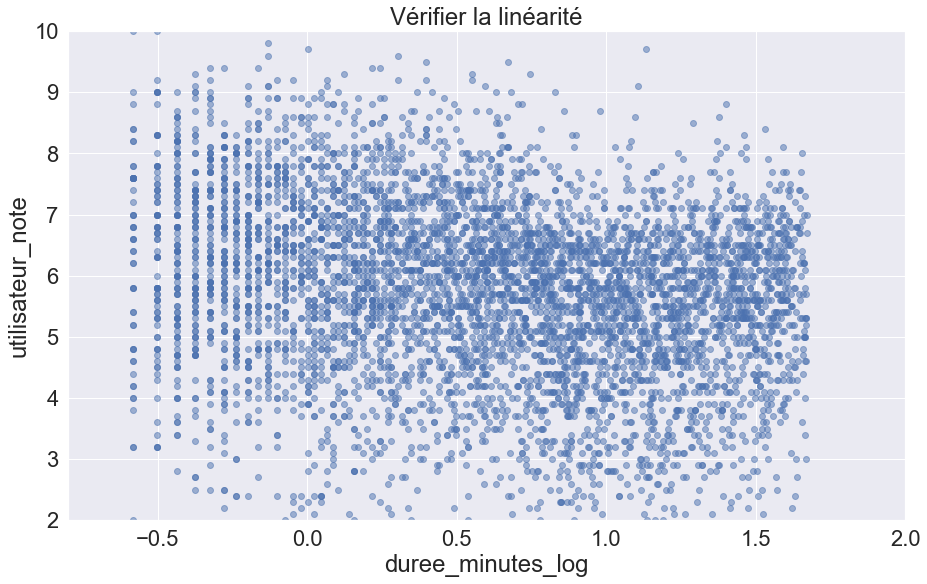

In [1312]:
plt.figure(figsize=(15,9)) #vérifier la linéarité
plt.scatter(df_reg1['nbre_utilisateur_note_log_norm'], df_reg1['utilisateur_note'], alpha=0.5)
plt.title('Vérifier la linéarité')
plt.xlabel('duree_minutes_log')
plt.ylabel('utilisateur_note')
plt.ylim((2, 10))
plt.xlim((-0.8, 2))
plt.show()

In [1313]:
X1 = df_reg1.drop('utilisateur_note',axis=1)
y1 = df_reg1["utilisateur_note"].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train1 = sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1)

In [1314]:
model1 = sm.OLS(y_train1,X_train1).fit() #entrainer le modele
y_pred1 = model1.predict(X_test1)

In [1315]:
residu1 = y_test1-y_pred1 #calculer le residu
residu1

11056   -0.842281
9977    -0.665974
11021   -0.912640
5681     2.090544
5340     3.129930
           ...   
4539     5.218123
2256     0.494298
2969     0.396994
11854   -0.996753
4392     1.596125
Length: 1554, dtype: float64

## Résidus presque normaux

<AxesSubplot:ylabel='Count'>

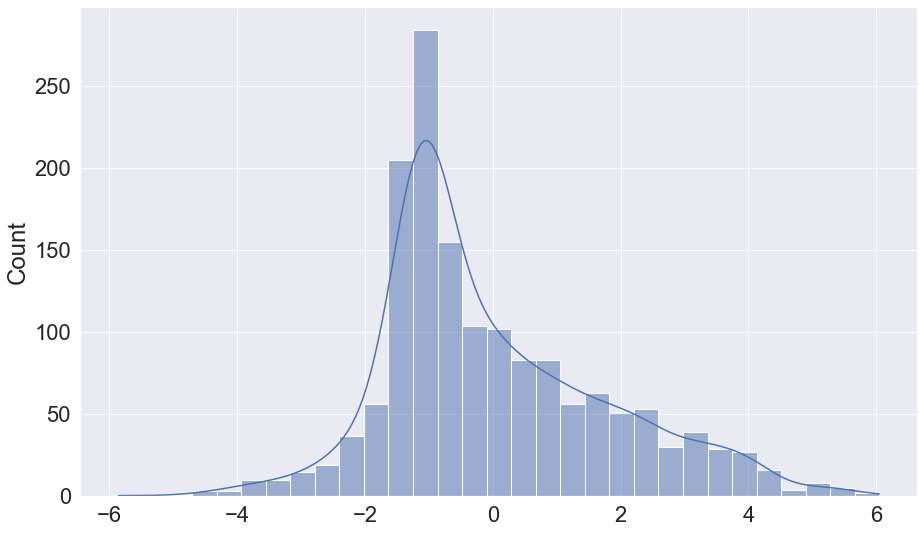

In [1316]:
plt.figure(figsize=(15,9))
sns.histplot(data = residu1, kde=True)


## Variabilité constante des résidus


<AxesSubplot:>

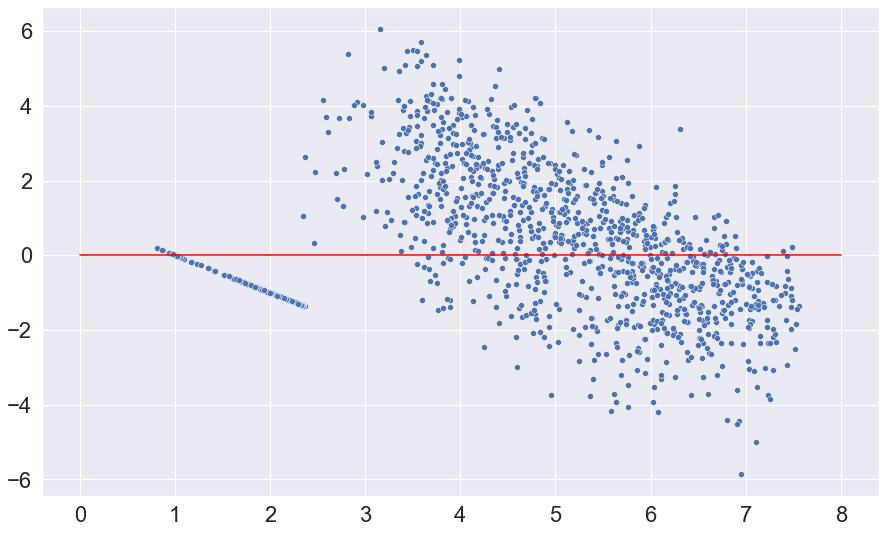

In [1317]:
plt.figure(figsize=(15,9))
sns.scatterplot(y_pred1,residu1)
sns.lineplot([0,8],[0,0],color='red')

## Indépendance des résidus

<AxesSubplot:>

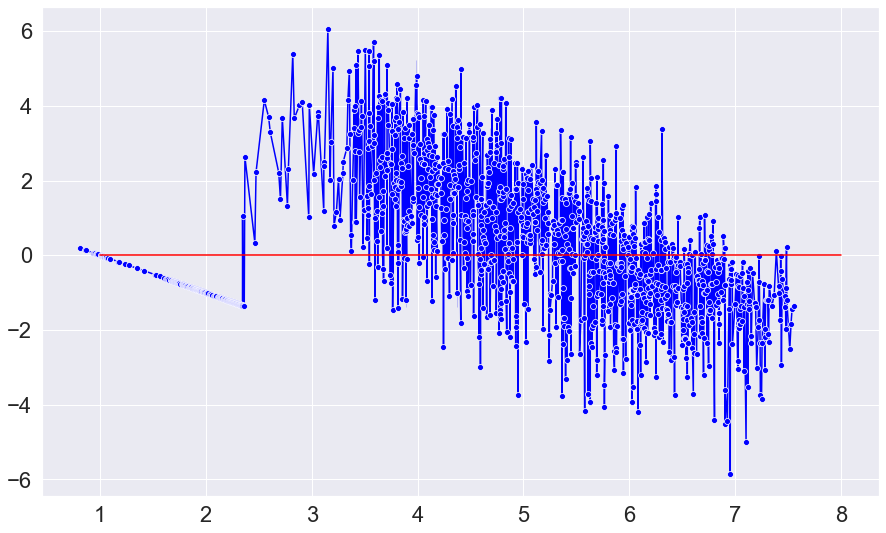

In [1318]:
plt.figure(figsize=(15,9))
sns.lineplot(y_pred1,residu1,marker='o',color='blue')
sns.lineplot([1,8],[0,0],color='red')

## Metriques de la régression

In [1319]:
a1 = mean_absolute_error(y_test1,y_pred1)
a2 = mean_squared_error(y_test1,y_pred1)
a3 = np.sqrt(mean_squared_error(y_test1,y_pred1))
a4 = np.log(np.sqrt(mean_squared_error(y_test1,y_pred1)))
a5 = r2_score(y_test1,y_pred1)
n=y_test1.shape[0] #nombre des observations
k=6 #nombre des variables indépendantes
a6 = 1 - ((1-a5)*(n-1)/(n-k-1))

In [1320]:
print("Erreur absolue moyenne (Mean absolute erro) est :",a1)
print("Erreur quadratique moyenne (Mean squared error) est :",a2)
print("Écart quadratique moyen (Root-mean-square deviation) est :",a3)
print("Root Mean Squared Log Error(RMSLE)  est :",a4)
print("Le Coefficient de détermination  R2  est :",a5)
print("Le Coefficient de détermination ajusté R2 adj est :",a6)

Erreur absolue moyenne (Mean absolute erro) est : 1.415420989318229
Erreur quadratique moyenne (Mean squared error) est : 3.1327284980858807
Écart quadratique moyen (Root-mean-square deviation) est : 1.7699515524685643
Root Mean Squared Log Error(RMSLE)  est : 0.5709521747244449
Le Coefficient de détermination  R2  est : 0.4986758944059232
Le Coefficient de détermination ajusté R2 adj est : 0.4967315216628304


In [1321]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     1117.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:59:36   Log-Likelihood:                -12253.
No. Observations:                6212   AIC:                         2.452e+04
Df Residuals:                    6205   BIC:                         2.457e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.2626      0.022    193.018      0.000       4.219       4.306
duree_minutes_log_norm             0.0522      0.023      2.304      0.021       0.008       0.097
nbre_utilisateur_note_log_norm     1.7892      0.023     78.493      0.000       1.745       1.834
Action2                           -0.0549      0.023     -2.420      0.016      -0.099      -0.010
Horror2                           -0.2694      0.023    -11.552      0.000      -0.315      -0.224
Drama2                             0.1719      0.024      7.279      0.000       0.126       0.218
Thriller2                         -0.0697      0.022     -3.111      0.002      -0.114      -0.026
==============================================================================
Omnibus:                      493.523   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              616.231
Skew:                           0.759   Prob(JB):                    1.54e-134
Kurtosis:                       3.274   Cond. No.                         1.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""